# Background and Context

You are a Data Scientist for a tourism company named "Visit with us". The Policy Maker of the company wants to enable and establish a viable business model to expand the customer base.

A viable business model is a central concept that helps you to understand the existing ways of doing the business and how to change the ways for the benefit of the tourism sector.

One of the ways to expand the customer base is to introduce a new offering of packages.

Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages.

However, the marketing cost was quite high because customers were contacted at random without looking at the available information.

The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.

However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

You as a Data Scientist at "Visit with us" travel company have to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

# Objective

The stated objective is:  
"To predict which customer is more likely to purchase the newly introduced travel package."  

Of course, the newly introduced travel package does not yet exist in the data, so we can't train a machine learning algorithm on customers who have already purchased the “Wellness Tourism Package”. Instead, we will use the assumption that the types of customers who have purchased travel packages in the past are the types of customers who will purchase travel packages in the future, including the newly introduced “Wellness Tourism package”.
In our EDA we will also break down the customer types that have purchased the different travel packages: Basic, Standard, Deluxe, Super Deluxe and King.

# Data Dictionary

### Customer details:
* CustomerID: Unique customer ID
* ProdTaken: Whether the customer has purchased a package or not (0: No, 1: Yes)
* Age: Age of customer
* TypeofContact: How customer was contacted (Company Invited or Self Inquiry)
* CityTier: City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e. Tier 1 > Tier 2 > Tier 3
* Occupation: Occupation of customer
* Gender: Gender of customer
* NumberOfPersonVisiting: Total number of persons planning to take the trip with the customer
* PreferredPropertyStar: Preferred hotel property rating by customer
* MaritalStatus: Marital status of customer
* NumberOfTrips: Average number of trips in a year by customer
* Passport: The customer has a passport or not (0: No, 1: Yes)
* OwnCar: Whether the customers own a car or not (0: No, 1: Yes)
* NumberOfChildrenVisiting: Total number of children with age less than 5 planning to take the trip with the customer
* Designation: Designation of the customer in the current organization
* MonthlyIncome: Gross monthly income of the customer

### Customer interaction data: 
* PitchSatisfactionScore: Sales pitch satisfaction score
* ProductPitched: Product pitched by the salesperson
* NumberOfFollowups: Total number of follow-ups has been done by the salesperson after the sales pitch
* DurationOfPitch: Duration of the pitch by a salesperson to the customer

In [1]:
# Library to suppress warnings or deprecation notes 
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) # I prefer when all columns are displayed

# Libraries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True) #to make things look a little prettier

# Libraries to split data, impute missing values 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Libtune to tune model, get different metric scores
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Data Read and Initial Look

In [2]:
df = pd.read_excel('Tourism.xlsx', sheet_name='Tourism')

In [3]:
df.head()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0      200000          1  41.0     Self Enquiry         3              6.0   
1      200001          0  49.0  Company Invited         1             14.0   
2      200002          1  37.0     Self Enquiry         1              8.0   
3      200003          0  33.0  Company Invited         1              9.0   
4      200004          0   NaN     Self Enquiry         1              8.0   

       Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0        Salaried  Female                       3                3.0   
1        Salaried    Male                       3                4.0   
2     Free Lancer    Male                       3                4.0   
3        Salaried  Female                       2                3.0   
4  Small Business    Male                       2                3.0   

  ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0         Deluxe                    3.0        Single            1.0   
1         Deluxe                    4.0      Divorced            2.0   
2          Basic                    3.0        Single            7.0   
3          Basic                    3.0      Divorced            2.0   
4          Basic                    4.0      Divorced            1.0   

   Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0         1                       2       1                       0.0   
1         0                       3       1                       2.0   
2         1                       3       0                       0.0   
3         1                       5       1                       1.0   
4         0                       5       1                       0.0   

  Designation  MonthlyIncome  
0     Manager        20993.0  
1     Manager        20130.0  
2   Executive        17090.0  
3   Executive        17909.0  
4   Executive        18468.0

In [4]:
df.tail()

CustomerID  ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
4883      204883          1  49.0     Self Enquiry         3              9.0   
4884      204884          1  28.0  Company Invited         1             31.0   
4885      204885          1  52.0     Self Enquiry         3             17.0   
4886      204886          1  19.0     Self Enquiry         3             16.0   
4887      204887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
4883  Small Business    Male                       3                5.0   
4884        Salaried    Male                       4                5.0   
4885        Salaried  Female                       4                4.0   
4886  Small Business    Male                       3                4.0   
4887        Salaried    Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
4883         1                       1       1                       1.0   
4884         1                       3       1                       2.0   
4885         0                       1       1                       3.0   
4886         0                       5       0                       2.0   
4887         1                       3       1                       2.0   

         Designation  MonthlyIncome  
4883         Manager        26576.0  
4884       Executive        21212.0  
4885  Senior Manager        31820.0  
4886       Executive        20289.0  
4887       Executive        24041.0

In [5]:
df.shape

(4888, 20)

There are 4888 observations and 20 columns. This matches the number of features we expect from the data dictionary.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

* There is a mix of data types: int64, float64 and object.
* It looks like there are a number of features that have missing values we will count them below:

In [7]:
df.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

* There are missing values in Age, TypeofContact, DurationofPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting and MonthlyIncome. We will look for patterns of missingness and ways to impute the data after our EDA.

In [8]:
df.describe().T

count           mean          std       min  \
CustomerID                4888.0  202443.500000  1411.188388  200000.0   
ProdTaken                 4888.0       0.188216     0.390925       0.0   
Age                       4662.0      37.622265     9.316387      18.0   
CityTier                  4888.0       1.654255     0.916583       1.0   
DurationOfPitch           4637.0      15.490835     8.519643       5.0   
NumberOfPersonVisiting    4888.0       2.905074     0.724891       1.0   
NumberOfFollowups         4843.0       3.708445     1.002509       1.0   
PreferredPropertyStar     4862.0       3.581037     0.798009       3.0   
NumberOfTrips             4748.0       3.236521     1.849019       1.0   
Passport                  4888.0       0.290917     0.454232       0.0   
PitchSatisfactionScore    4888.0       3.078151     1.365792       1.0   
OwnCar                    4888.0       0.620295     0.485363       0.0   
NumberOfChildrenVisiting  4822.0       1.187267     0.857861       0.0   
MonthlyIncome             4655.0   23619.853491  5380.698361    1000.0   

                                25%       50%        75%       max  
CustomerID                201221.75  202443.5  203665.25  204887.0  
ProdTaken                      0.00       0.0       0.00       1.0  
Age                           31.00      36.0      44.00      61.0  
CityTier                       1.00       1.0       3.00       3.0  
DurationOfPitch                9.00      13.0      20.00     127.0  
NumberOfPersonVisiting         2.00       3.0       3.00       5.0  
NumberOfFollowups              3.00       4.0       4.00       6.0  
PreferredPropertyStar          3.00       3.0       4.00       5.0  
NumberOfTrips                  2.00       3.0       4.00      22.0  
Passport                       0.00       0.0       1.00       1.0  
PitchSatisfactionScore         2.00       3.0       4.00       5.0  
OwnCar                         0.00       1.0       1.00       1.0  
NumberOfChildrenVisiting       1.00       1.0       2.00       3.0  
MonthlyIncome              20346.00   22347.0   25571.00   98678.0

* Some of the columns above are categorical variables rather than continuous variables. We may need to do some conversion later.
* CustomerID doesn't look useful to us, so we will drop it.
* It looks like there is some skewness in the Number of Trips and Monthly Income columns

In [9]:
df.describe(include=['object']).T

count unique           top  freq
TypeofContact   4863      2  Self Enquiry  3444
Occupation      4888      4      Salaried  2368
Gender          4888      3          Male  2916
ProductPitched  4888      5         Basic  1842
MaritalStatus   4888      4       Married  2340
Designation     4888      5     Executive  1842

* There are some strange values in the table above, like 3 unique genders. Let's look at the values in the dtype=object rows.

In [10]:
cols_cat= df.select_dtypes(['object'])
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts(dropna=False))
    print('*'*50)

Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
NaN                  25
Name: TypeofContact, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in De

* In the Gender column, we will need to change Fe Male to Female
* While not technically necessary, we will change the misspelling of Free Lancer to Freelancer
* I'm not sure what the difference between Single and Unmarried is. Perhaps Unmarried refers to people living with a partner who are not married, we will look at this in our EDA before deciding to merge Single and Unmarried.
* From the Designation column, we can see that we are only dealing with high-level employees in the database.

In [11]:
df['Gender'].replace({'Fe Male':'Female'}, inplace=True)
df['Occupation'].replace({'Free Lancer':'Freelancer'}, inplace=True)

In [12]:
cols_cat= df.select_dtypes(['object'])
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts(dropna=False))
    print('*'*50)

Unique values in TypeofContact are :
Self Enquiry       3444
Company Invited    1419
NaN                  25
Name: TypeofContact, dtype: int64
**************************************************
Unique values in Occupation are :
Salaried          2368
Small Business    2084
Large Business     434
Freelancer           2
Name: Occupation, dtype: int64
**************************************************
Unique values in Gender are :
Male      2916
Female    1972
Name: Gender, dtype: int64
**************************************************
Unique values in ProductPitched are :
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64
**************************************************
Unique values in MaritalStatus are :
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64
**************************************************
Unique values in Designation are :
Ex

* The Gender and Occupation columns now look good. We will drop the CustomerID column and then start our visualizations to better understand our features.

In [13]:
df.drop('CustomerID', axis=1, inplace=True)

# Univariate Analysis

### Continuous variables

In [14]:
# While doing univariate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(x=feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.histplot(x=feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

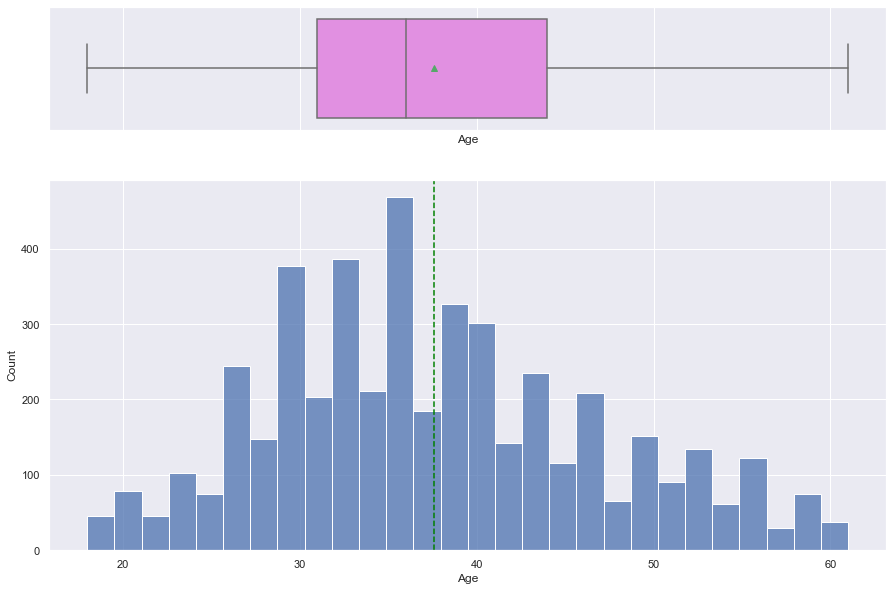

In [15]:
histogram_boxplot(df.Age)

* The age distribution looks mostly normal, with a slight right skew.

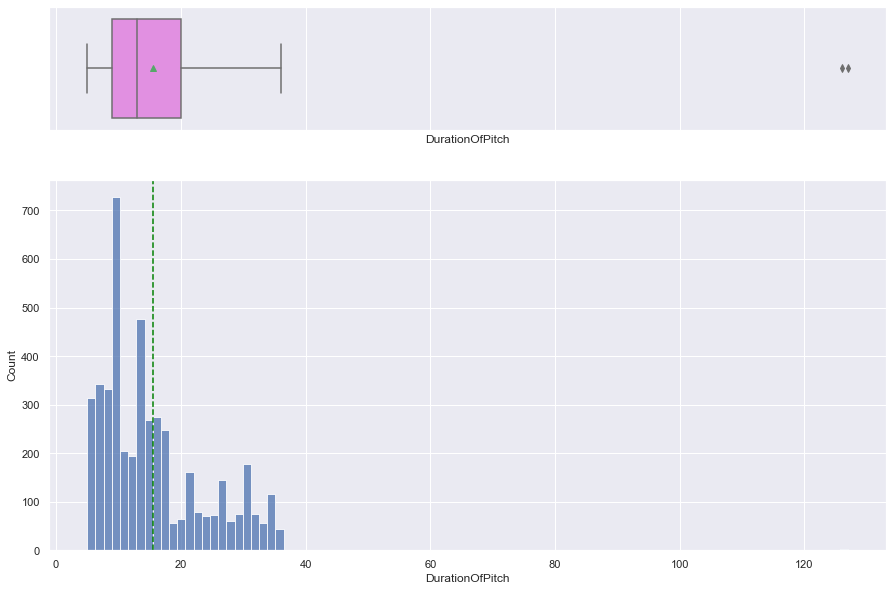

In [16]:
histogram_boxplot(df.DurationOfPitch)

* Duration of pitch has a strange distribution with a number of peaks. The bulk of the values are below 20 minutes, however there is a distribution of values from 20-40 minutes. Finally there are some outliers with very long durations.

In [17]:
df[df['DurationOfPitch']>60] #Let's take a look at the outliers here.

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch Occupation  \
1434          0   NaN  Company Invited         3            126.0   Salaried   
3878          0  53.0  Company Invited         3            127.0   Salaried   

     Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
1434   Male                       2                3.0          Basic   
3878   Male                       3                4.0          Basic   

      PreferredPropertyStar MaritalStatus  NumberOfTrips  Passport  \
1434                    3.0       Married            3.0         0   
3878                    3.0       Married            4.0         0   

      PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting Designation  \
1434                       1       1                       1.0   Executive   
3878                       1       1                       2.0   Executive   

      MonthlyIncome  
1434        18482.0  
3878        22160.0

* One of the outliers is also missing it's Age values. Other than that the outliers look normal (apart from their DurationOfPitch value)

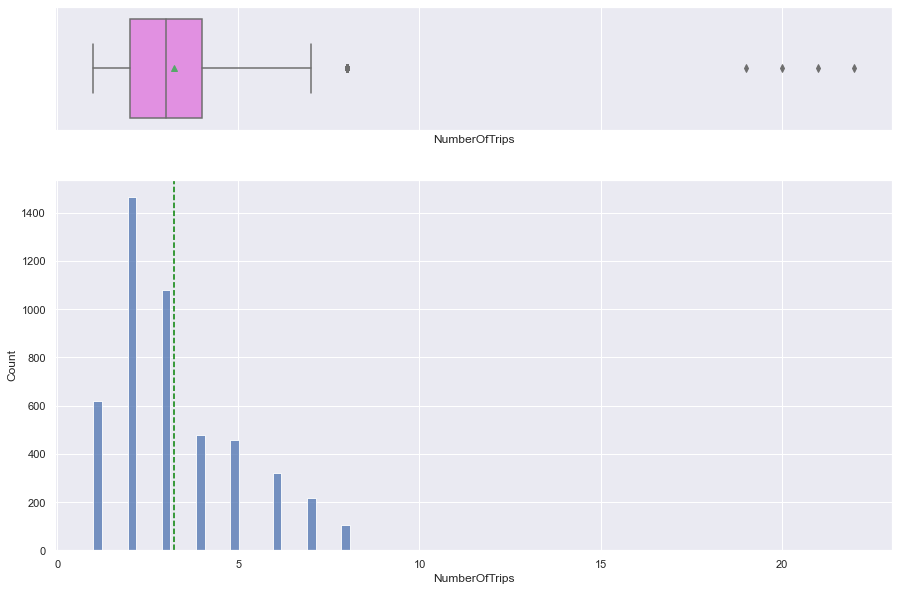

In [18]:
histogram_boxplot(df.NumberOfTrips)

* Number of trips also looks to have a number of outliers up around 20, while the bulk of values are below 10. The outliers (see table below) look to be fairly normal in the other features.

In [19]:
df[df['NumberOfTrips']>10] #Let's take a look at the outliers here.

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
385           1  30.0  Company Invited         1             10.0   
816           0  39.0  Company Invited         1             15.0   
2829          1  31.0  Company Invited         1             11.0   
3260          0  40.0  Company Invited         1             16.0   

          Occupation Gender  NumberOfPersonVisiting  NumberOfFollowups  \
385   Large Business   Male                       2                3.0   
816         Salaried   Male                       3                3.0   
2829  Large Business   Male                       3                4.0   
3260        Salaried   Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
385           Basic                    3.0        Single           19.0   
816          Deluxe                    4.0     Unmarried           21.0   
2829          Basic                    3.0        Single           20.0   
3260         Deluxe                    4.0     Unmarried           22.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
385          1                       4       1                       1.0   
816          0                       2       1                       0.0   
2829         1                       4       1                       2.0   
3260         0                       2       1                       1.0   

     Designation  MonthlyIncome  
385    Executive        17285.0  
816      Manager        21782.0  
2829   Executive        20963.0  
3260     Manager        25460.0

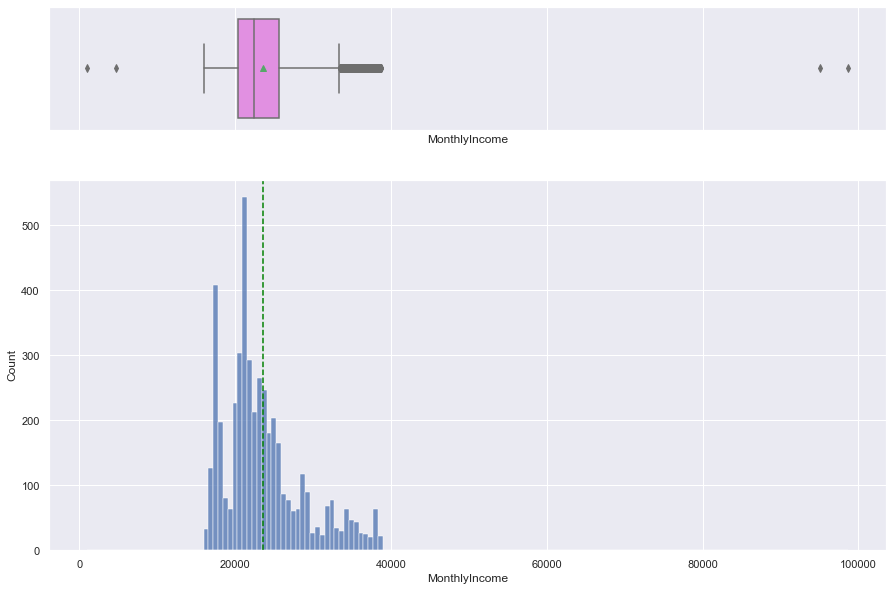

In [20]:
histogram_boxplot(df.MonthlyIncome)

In [21]:
df[df['MonthlyIncome']>60000] #Let's look at the outliers on the high side.

ProdTaken   Age TypeofContact  CityTier  DurationOfPitch Occupation  \
38            0  36.0  Self Enquiry         1             11.0   Salaried   
2482          0  37.0  Self Enquiry         1             12.0   Salaried   

      Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
38    Female                       2                4.0          Basic   
2482  Female                       3                5.0          Basic   

      PreferredPropertyStar MaritalStatus  NumberOfTrips  Passport  \
38                      NaN      Divorced            1.0         1   
2482                    5.0      Divorced            2.0         1   

      PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting Designation  \
38                         2       1                       0.0   Executive   
2482                       2       1                       1.0   Executive   

      MonthlyIncome  
38          95000.0  
2482        98678.0

In [22]:
df[df['MonthlyIncome']<10000] #Let's look at the outliers on the low side.

ProdTaken   Age TypeofContact  CityTier  DurationOfPitch  \
142           0  38.0  Self Enquiry         1              9.0   
2586          0  39.0  Self Enquiry         1             10.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
142   Large Business  Female                       2                3.0   
2586  Large Business  Female                       3                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
142          Deluxe                    3.0        Single            4.0   
2586         Deluxe                    3.0        Single            5.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
142          1                       5       0                       0.0   
2586         1                       5       0                       1.0   

     Designation  MonthlyIncome  
142      Manager         1000.0  
2586     Manager         4678.0

* The mean and median of MonthlyIncome are close, however we can see that the data are right skewed. It's likely that the outliers on both the high and low end have affected the mean value. On the high end, there is nothing obvious about the outliers (other than the very high values). However on the low end, it seems strange that customers designated "Manager" in a "Large Business" have such low salaries.
* These outliers are likely erroneous values and will need to be removed and replaced.

### Categorical Variables with Order
The following variables are categorical, but have an order to them. E.g. City Tier 1 > City Tier 2, etc.

The features plotted below could have been plotted using our histogram/barplot combination. However, given the small amount of values per feature, I felt it better to plot them on a count plot as I'm not really worried about skew in these variables, I'm more interested in the percentage of each value within each column.  

In [23]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(df[z]) # length of the column
    plt.figure(figsize=(15,5))
    plt.xticks(rotation=0)
    ax = sns.countplot(df[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 15) # annotate the percantage 
    plt.show() # show the plot

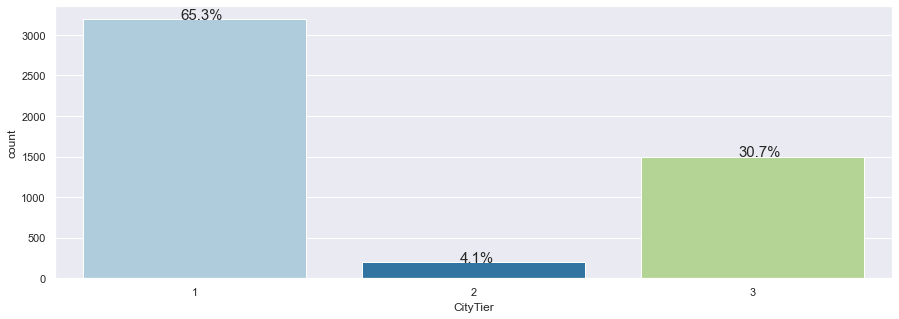

In [24]:
perc_on_bar('CityTier')

* The bulk of customers live in City Tier 1 (the heighest rank). Very few, 4.1%, live in Tier 2 cities. About a third of customers live in Tier 3 cities.

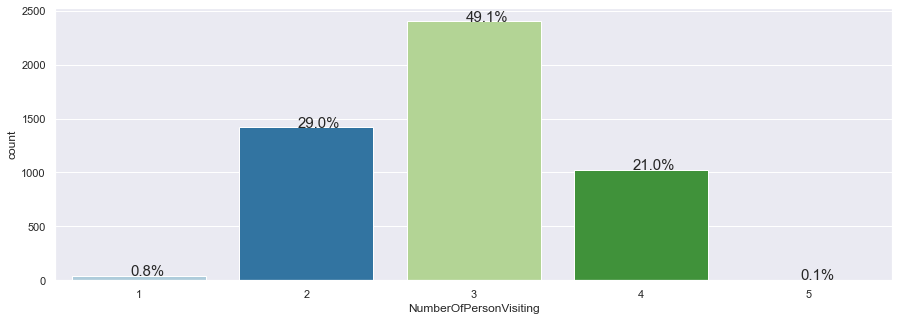

In [25]:
perc_on_bar('NumberOfPersonVisiting')

* The bulk of customers travel with 3 people. Very few travel with 1 or 5.

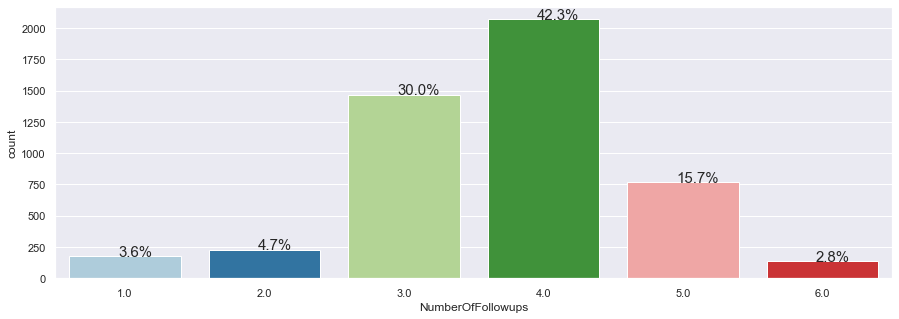

In [26]:
perc_on_bar('NumberOfFollowups')

* The most common number of follow ups is 4, followede by 3 and 5. 1, 2 and 6 are much rarer.

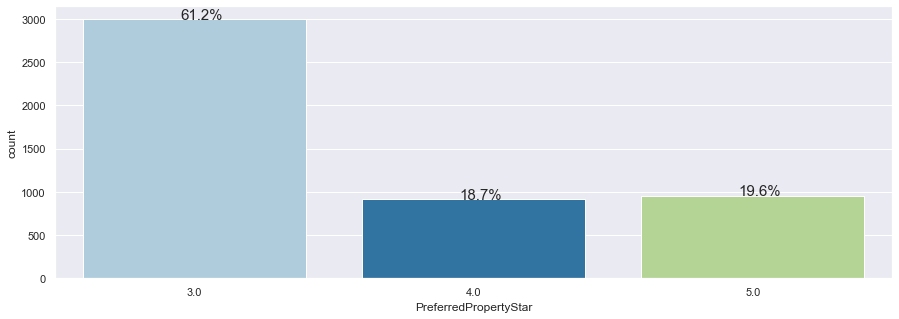

In [27]:
perc_on_bar('PreferredPropertyStar')

* The bulk of customers prefer 3 star properties when travelling. 4 and 5 star properties are about even and make up about 40% of the values.

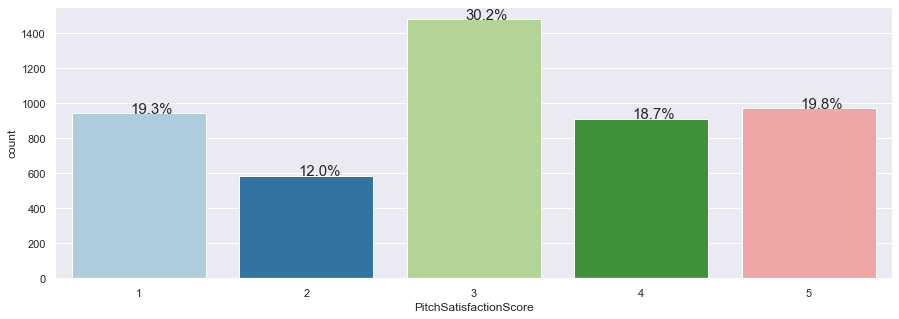

In [28]:
perc_on_bar('PitchSatisfactionScore')

* The majority of pitch satisfaction scores are 3, the middle option. The distribution is about even for 1,4 and 5. 2 is the rarest.

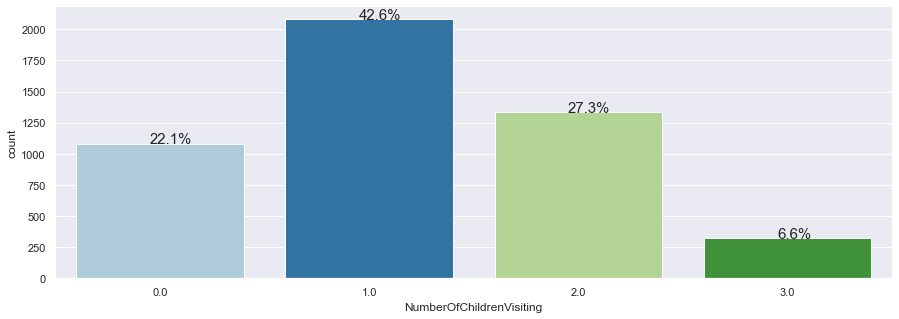

In [29]:
perc_on_bar('NumberOfChildrenVisiting')

* Most customers travel with 1 child. Only 6.6% of customers travel with 3 children.

### Categorical Variables without Order

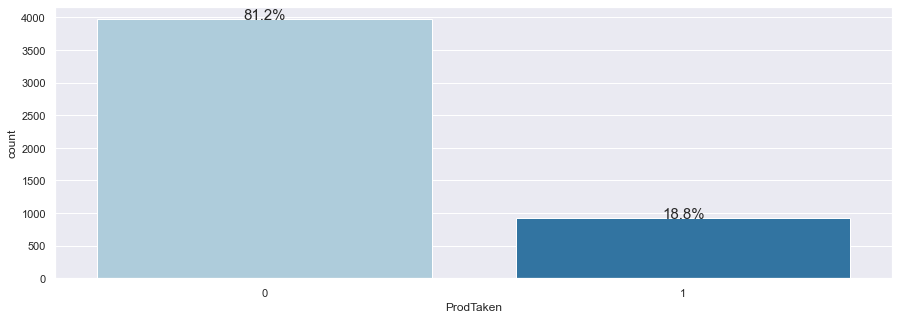

In [30]:
perc_on_bar('ProdTaken')

* 18.8% of the customers purchased a package. This is slightly higher than we saw in the Background and Context (18%).

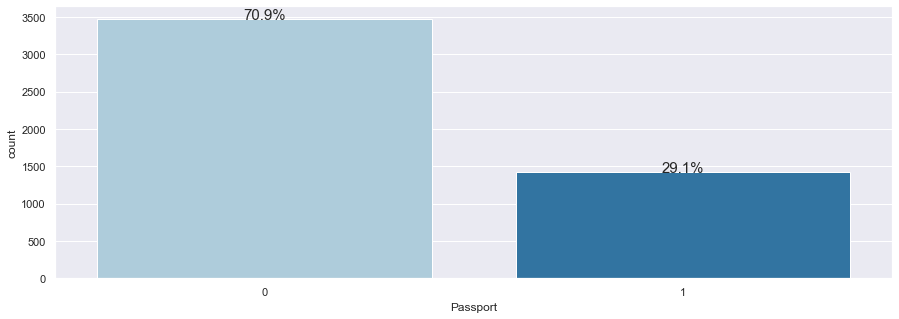

In [31]:
perc_on_bar('Passport')

* 29.1% of the customers have a passport

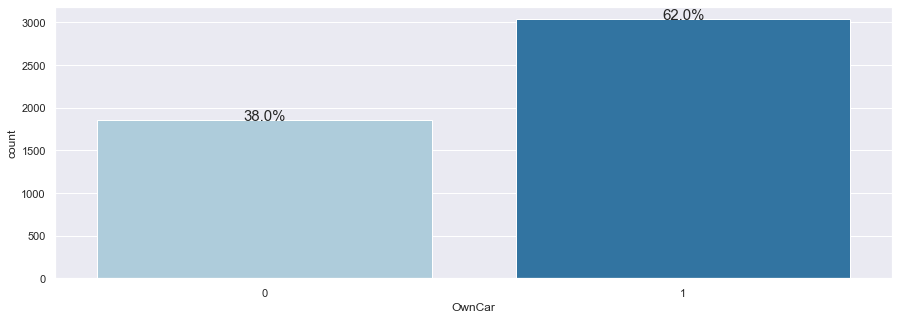

In [32]:
perc_on_bar('OwnCar')

* 62% of customers own a car

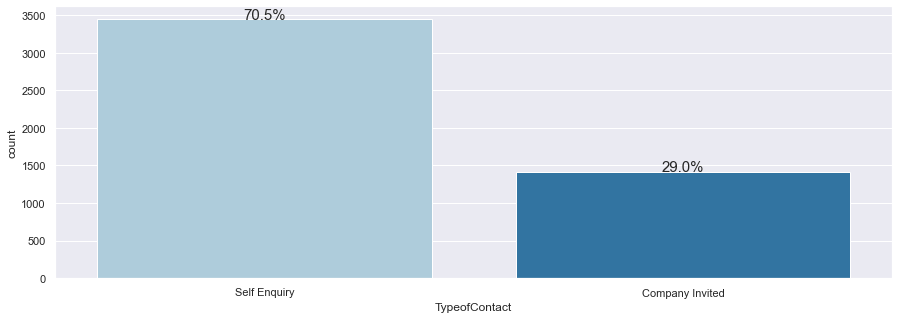

In [33]:
perc_on_bar('TypeofContact')

* 70.5% of customers are self-enquired. This shows that the marking team is doing a good job of attracting customers to the business on their own.

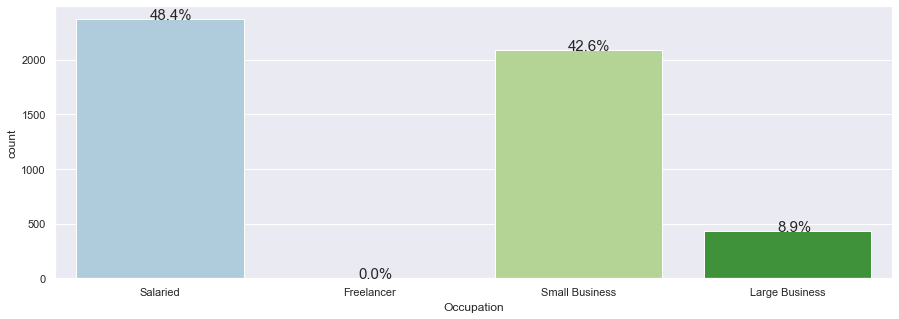

In [34]:
perc_on_bar('Occupation')

* Only a very small amount of customers are "Freelancer" (just 2 customers). Later we will merge the Freelancers with the Small Business customers.

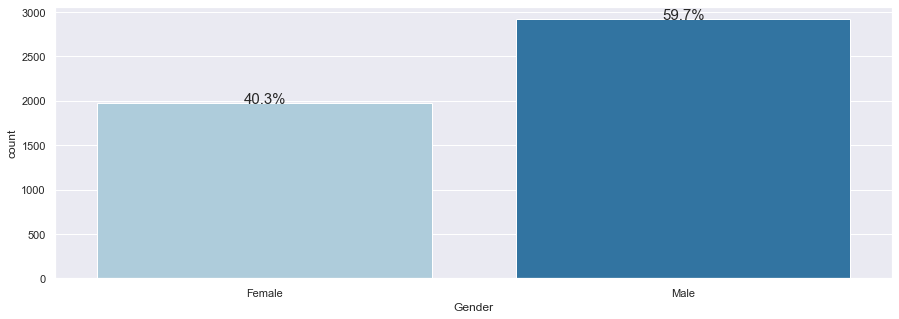

In [35]:
perc_on_bar('Gender')

* 60% of the customers are male.

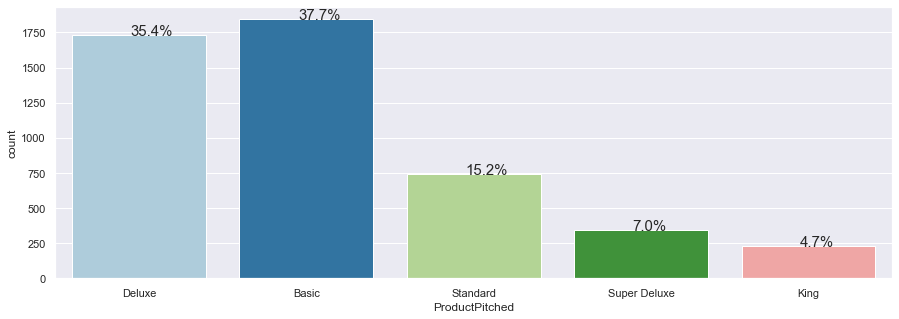

In [36]:
perc_on_bar('ProductPitched')

* Most of the customers were pitched the Basic or Deluxe product.

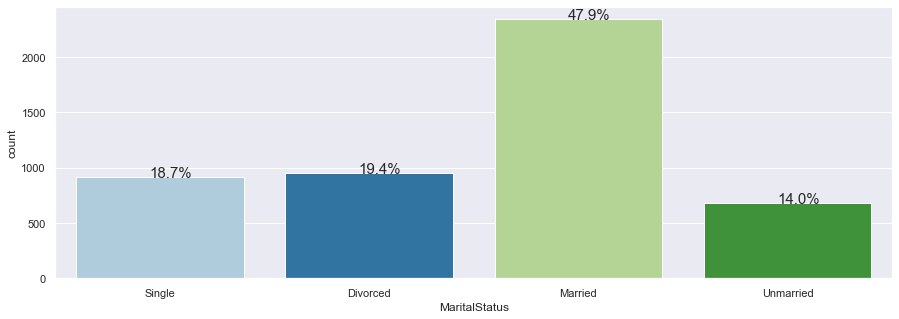

In [37]:
perc_on_bar('MaritalStatus')

* 48% of customers are married. There is about an even split between the single, unmarried and divorced. We will decide if we should merge the single and unmarried customers after the bivariate analysis.

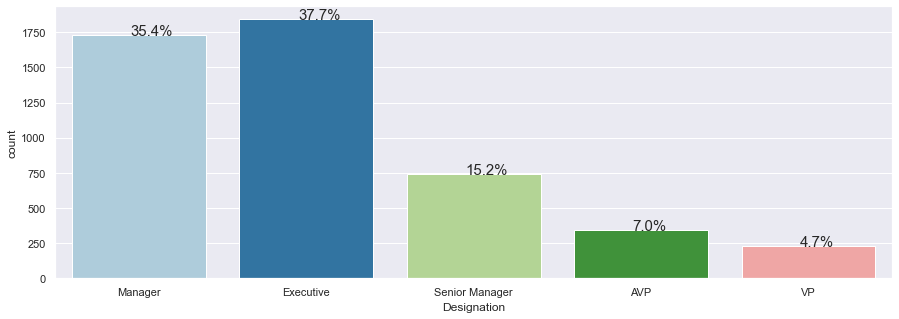

In [38]:
perc_on_bar('Designation')

* 73% of the customers are either Managers or Executives. It looks like only high level employees make up the customers in the data.

# Data Pre-Processing (Part 1) - Outlier Treatment

Now that we know the distributions of our variables, let's perform some basic outlier treatment before moving onto our Bivariate Analysis. Treatment of our outliers will make our Bivariate plots much easier to read.

We will deal with missing values after the Bivariate Analysis.

### Outliers in Monthly Income

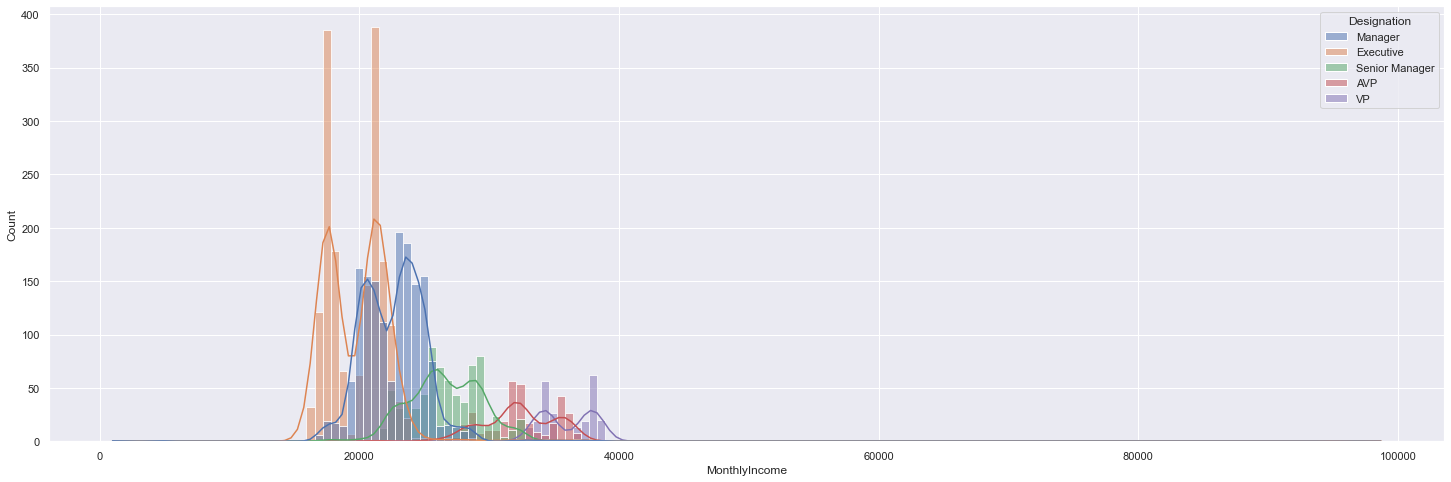

In [39]:
#Look to see if there is a relationship between designation and monthy income
fix, ax = plt.subplots(figsize=(25,8))
sns.histplot(data=df, x='MonthlyIncome', hue='Designation', kde=True);

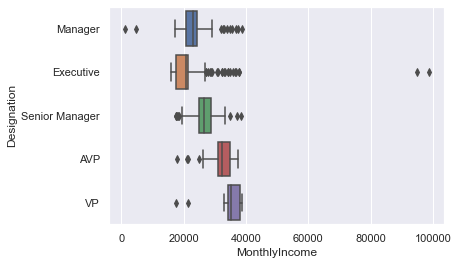

In [40]:
sns.boxplot(data=df, x='MonthlyIncome', y='Designation');

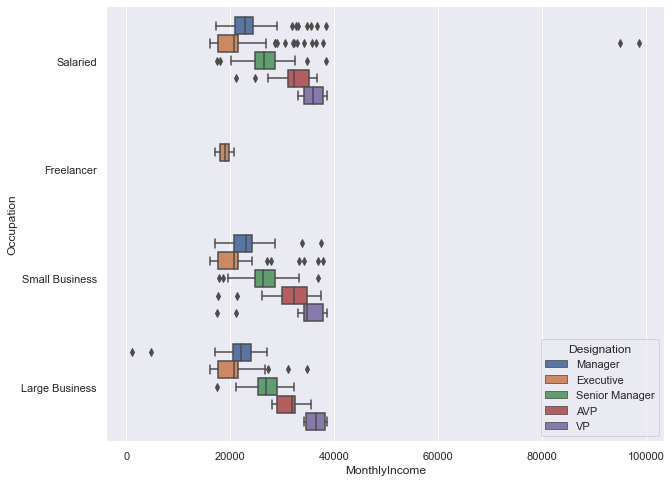

In [41]:
fix, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, y="Occupation", x="MonthlyIncome", hue="Designation");

* High ouliers: We can see above that "Executive" is our lowest level Designation, regardless of Occupation. However the two outlier points with the highest Monthly Income belong to the "Executive" Designation. While the "Executive" Designation does have the greatest range of values for any given Occupation, It is unlikely that people working salaried jobs at the lowest level of designation earn more that 2x the highest amount of the remaining customers. The V.P. at my company is definitely not paying me 2x what he earns! For this reason I am going to treat these values as erroneous values and replace them with the median value of the "Executive" designation.

* Low outliters: Again there are only two points. These points belong to Managers at Large Businesses. I believe that these points are erroneous and I will replace them with the median value of the Manager Designation.

In [42]:
df.groupby('Designation').median() #Let's look at the median income for each Designation

ProdTaken   Age  CityTier  DurationOfPitch  \
Designation                                                  
AVP                     0  49.0         1             13.0   
Executive               0  32.0         1             13.0   
Manager                 0  36.0         1             14.0   
Senior Manager          0  38.0         1             14.0   
VP                      0  49.0         1             11.0   

                NumberOfPersonVisiting  NumberOfFollowups  \
Designation                                                 
AVP                                  3                4.0   
Executive                            3                4.0   
Manager                              3                4.0   
Senior Manager                       3                4.0   
VP                                   3                4.0   

                PreferredPropertyStar  NumberOfTrips  Passport  \
Designation                                                      
AVP                               3.0            3.0         0   
Executive                         3.0            3.0         0   
Manager                           3.0            3.0         0   
Senior Manager                    3.0            3.0         0   
VP                                3.0            3.0         0   

                PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
Designation                                                                
AVP                                  3       1                       1.0   
Executive                            3       1                       1.0   
Manager                              3       1                       1.0   
Senior Manager                       3       1                       1.0   
VP                                   3       1                       1.0   

                MonthlyIncome  
Designation                    
AVP                   32181.0  
Executive             20689.0  
Manager               22922.0  
Senior Manager        26425.0  
VP                    34999.0

Replace high outliers with median Monthly Income for Executive Designation

In [43]:
df[df['MonthlyIncome']>60000] # Look at values in our outlier rows

ProdTaken   Age TypeofContact  CityTier  DurationOfPitch Occupation  \
38            0  36.0  Self Enquiry         1             11.0   Salaried   
2482          0  37.0  Self Enquiry         1             12.0   Salaried   

      Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
38    Female                       2                4.0          Basic   
2482  Female                       3                5.0          Basic   

      PreferredPropertyStar MaritalStatus  NumberOfTrips  Passport  \
38                      NaN      Divorced            1.0         1   
2482                    5.0      Divorced            2.0         1   

      PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting Designation  \
38                         2       1                       0.0   Executive   
2482                       2       1                       1.0   Executive   

      MonthlyIncome  
38          95000.0  
2482        98678.0

In [44]:
df['MonthlyIncome'].replace({95000.0:20689.0,98678.0:20689.0}, inplace=True) # Replace values with median for Executive

In [45]:
df.loc[[38,2482]] # Check the rows to make sure the replacement worked. Looks good!

ProdTaken   Age TypeofContact  CityTier  DurationOfPitch Occupation  \
38            0  36.0  Self Enquiry         1             11.0   Salaried   
2482          0  37.0  Self Enquiry         1             12.0   Salaried   

      Gender  NumberOfPersonVisiting  NumberOfFollowups ProductPitched  \
38    Female                       2                4.0          Basic   
2482  Female                       3                5.0          Basic   

      PreferredPropertyStar MaritalStatus  NumberOfTrips  Passport  \
38                      NaN      Divorced            1.0         1   
2482                    5.0      Divorced            2.0         1   

      PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting Designation  \
38                         2       1                       0.0   Executive   
2482                       2       1                       1.0   Executive   

      MonthlyIncome  
38          20689.0  
2482        20689.0

Replace low outliers with median Monthly Income for Manager Designation

In [46]:
df[df['MonthlyIncome']<10000] # Look at values in our outlier rows

ProdTaken   Age TypeofContact  CityTier  DurationOfPitch  \
142           0  38.0  Self Enquiry         1              9.0   
2586          0  39.0  Self Enquiry         1             10.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
142   Large Business  Female                       2                3.0   
2586  Large Business  Female                       3                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
142          Deluxe                    3.0        Single            4.0   
2586         Deluxe                    3.0        Single            5.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
142          1                       5       0                       0.0   
2586         1                       5       0                       1.0   

     Designation  MonthlyIncome  
142      Manager         1000.0  
2586     Manager         4678.0

In [47]:
df['MonthlyIncome'].replace({1000.0:22922.0,4678.0:22922.0}, inplace=True) # Replace values with median for Manager

In [48]:
df.loc[[142,2586]] # Check the rows to make sure the replacement worked. Looks good!

ProdTaken   Age TypeofContact  CityTier  DurationOfPitch  \
142           0  38.0  Self Enquiry         1              9.0   
2586          0  39.0  Self Enquiry         1             10.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
142   Large Business  Female                       2                3.0   
2586  Large Business  Female                       3                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
142          Deluxe                    3.0        Single            4.0   
2586         Deluxe                    3.0        Single            5.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
142          1                       5       0                       0.0   
2586         1                       5       0                       1.0   

     Designation  MonthlyIncome  
142      Manager        22922.0  
2586     Manager        22922.0

### Outliers DurationOfPitch

There are two outliers in the duration of pitch column with values much larger than the other values. The next largest value for duration of pitch (that's not an outlier) is 36.0 minutes. Let's create a bin for the outliers at 37.0 minutes and call it "37 minutes or more". This will look like clipping the two values down to 37.

In [49]:
df["DurationOfPitch"].sort_values(ascending=False)

3878    127.0
1434    126.0
3319     36.0
4055     36.0
3553     36.0
        ...  
4215      NaN
4427      NaN
4641      NaN
4678      NaN
4825      NaN
Name: DurationOfPitch, Length: 4888, dtype: float64

In [50]:
df['DurationOfPitch'].replace({127.0:37.0,126.0:37.0}, inplace=True) # Replace values with 37

In [51]:
df["DurationOfPitch"].sort_values(ascending=False) # Let's check the values again, looks good!

1434    37.0
3878    37.0
3319    36.0
4055    36.0
3553    36.0
        ... 
4215     NaN
4427     NaN
4641     NaN
4678     NaN
4825     NaN
Name: DurationOfPitch, Length: 4888, dtype: float64

### Outliers in NumberOfTrips

There are a very small number of customers who take a much larger number of trips than the other customers. We will again treat this column with binning. We will bin all values above 8 into a "9 or more trips" bin.

In [52]:
df["NumberOfTrips"].sort_values(ascending=False).head(10) # Check values greater to 9

3260    22.0
816     21.0
2829    20.0
385     19.0
4281     8.0
3638     8.0
3670     8.0
3284     8.0
4305     8.0
3643     8.0
Name: NumberOfTrips, dtype: float64

In [53]:
df['NumberOfTrips'] = df['NumberOfTrips'].apply(lambda x: 9 if x>10 else x) # Bin values greater than 9 into a 9 or more bin

In [54]:
df["NumberOfTrips"].sort_values(ascending=False).head(10) # Check the work, looks good.

2829    9.0
3260    9.0
385     9.0
816     9.0
4281    8.0
3638    8.0
3670    8.0
3284    8.0
4305    8.0
3643    8.0
Name: NumberOfTrips, dtype: float64

### Merge Freelancer Occupation with Small Business

There are only 2 customers in the data base with an Occupation of Freelancer. It makes little sense to have a category that describes 0.04% of the data.  
A Freelancer is somewhat like a Small Business of 1 person. We also saw, when treating outliers 
in the Monthly Income column above, that Freelancers are Designated as "Executives" and their Monthly Income is within the range of other Executives. So merging Freelancer into Small Business will not cause outliers in other distributions.

In [55]:
df['Occupation'].value_counts(dropna=False) # Let's look at the values before we merge

Salaried          2368
Small Business    2084
Large Business     434
Freelancer           2
Name: Occupation, dtype: int64

In [56]:
df['Occupation'].replace({'Freelancer':'Small Business'},inplace=True) # Perform the merge

In [57]:
df['Occupation'].value_counts(dropna=False) # Look at values after the merge. Small Business has increase by 2 as expected.

Salaried          2368
Small Business    2086
Large Business     434
Name: Occupation, dtype: int64

# Bivariate Analysis

## Cross Correlations

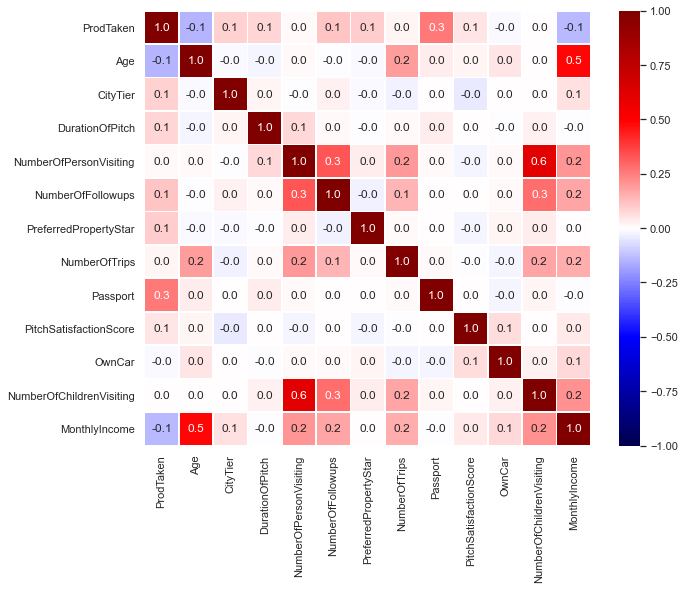

In [58]:
# Let's start by looking for correlation in the data
corr = df.corr()

sns.set(font_scale=1)
fix, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, 
            cmap='seismic', annot=True,fmt=".1f",vmin=-1, vmax=1, center= 0,
            square=False, linewidths=.7);

Observations:
* The highest correlation occurs between the NumberOFChildrenVisiting and NumberOfPersonVisiting. This makes sense, people traveling with more children are travelling with more people in general.
* There is some correlation between age and monthly income. Older people tend to earn more money.

## Pair Plots of Continuous Variables

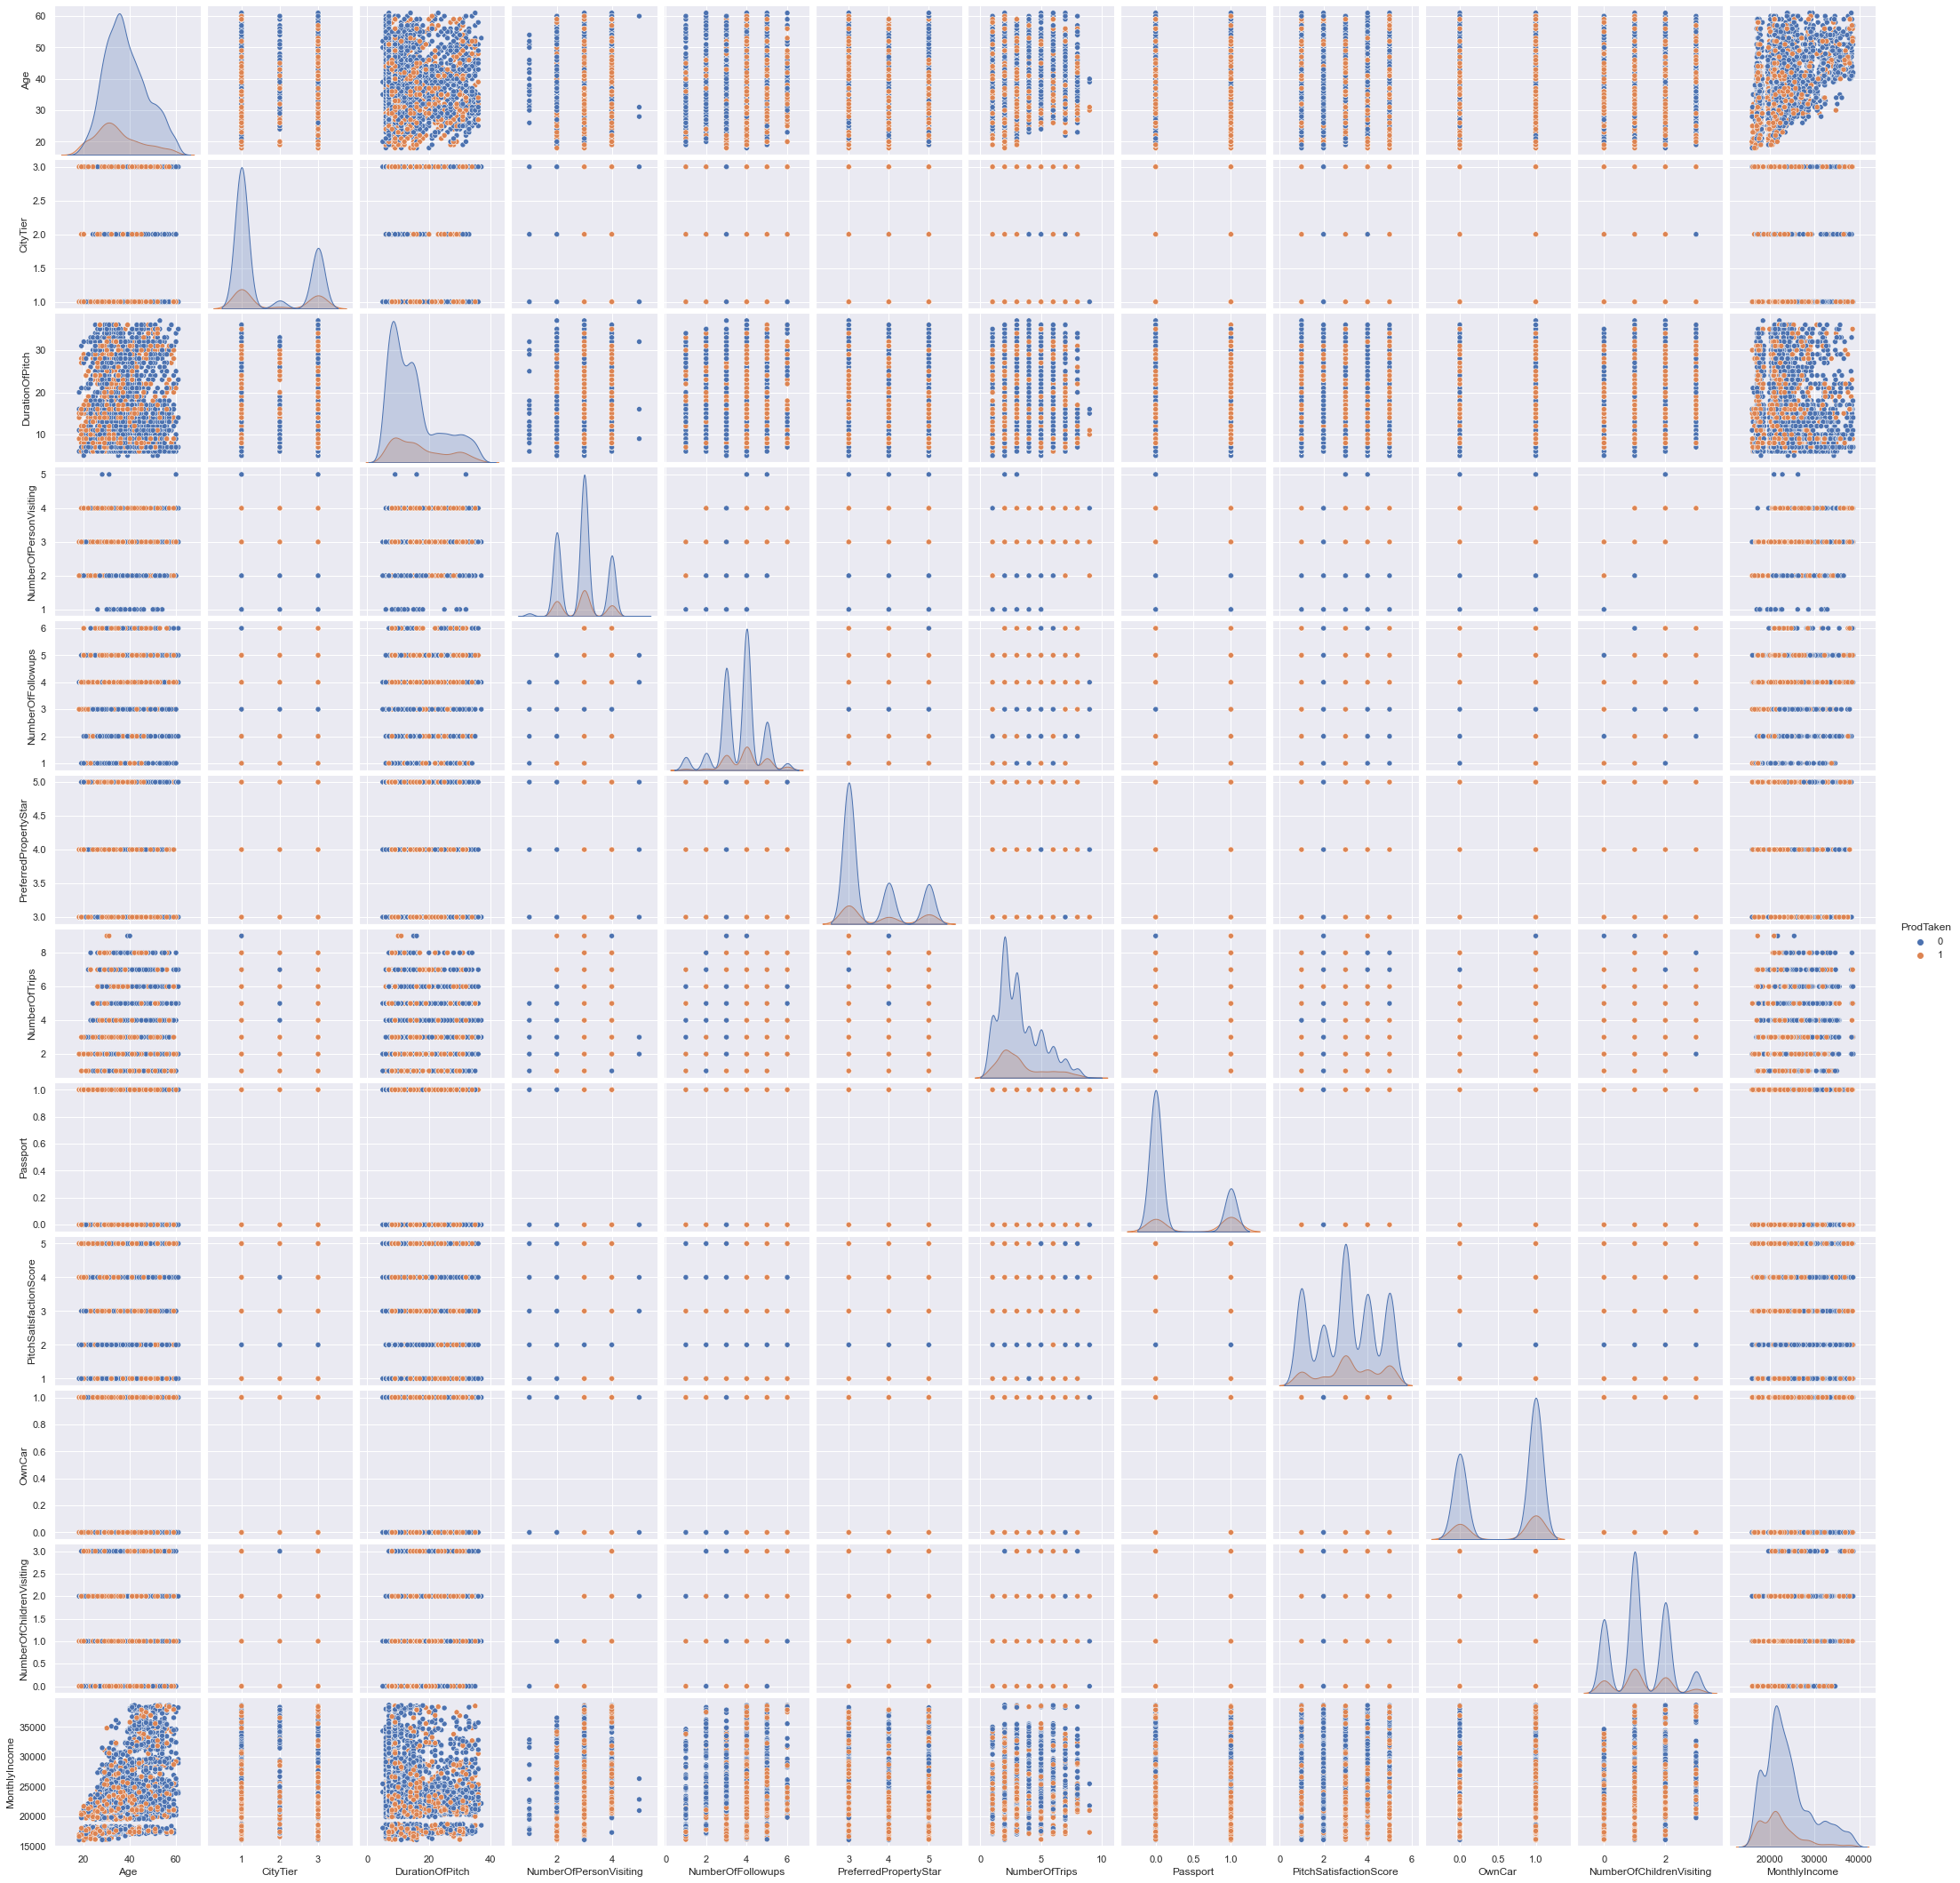

In [59]:
# Now let's look again at all the data in a pair plot. We will colour by our target variable and see what stands out.
sns.pairplot(df, hue='ProdTaken');

Observations:
* There doesn't appear to be much linearity in the data set. We can see that there is something of a linear relationship between age and monthly income, but it is not a strong relationship.
* From the plots on the diagonal we can see that  
    - It appears that younger people are more likely have purchaced a product.
    - Customers in City Tier 3 are more likely to have purchaced a product.
    - Customers who were given a longer pitch appear slightly more likely to have purchased a product.
    - Customers with Number of Persons Visiting = 1 or 5 are very unlikely to have purchased a product.
    - Number of follow ups is positively correlated with customers having purchased a product.
    - Customers who prefer 5 star properties are slightly more likely to have purchased a product.
    - Customers with a passport are more likely to have purchased a product.
    - It also appears that customers with a lower monthly income, less than 35k are more likely to have purchased a product.
* There also appears to be combinations of features that lead to "pure" areas in the plot space. One example would be customers with a high PitchSatisfactionScore and a high NumberOfFollowups. Hopefully this means decision tree models will perform well on these data.
    

There is a strange split in the monthly income values. Let's look a these data on a histogram plot with a high number of bins.

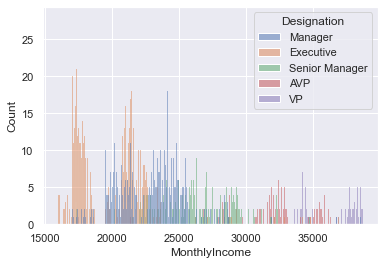

In [60]:
sns.histplot(data=df, x='MonthlyIncome', bins=1000, hue='Designation');

There does indeed appear to be a gap in the values at approximately 19k. The gap seems to be somewhat related to Designation; most of the customers on the low side of the gap are designated "Executive". However the divide is not absolute, there are some Managers on the low side of the gap too. This is interesting behaviour but I don't believe that the data need to be conditioned.

We saw above in the pair plots that there were a higher proportion of young people who had purchased a product. Let's look at this in more detail by comparing the age of a customer vs. the percentage of times a customer of that age purchased a product.

In [61]:
# First Create a data frame that has Duration of Pitch as the index and the number of times the product was taken as a column
temp = df.groupby('Age').sum()
ProdTakenCount = temp[['ProdTaken']]

# Next Create a data frame that has Duration of Pitch as the index and the number of times that pitch duration exists in the 
# data as a column

ValueCounts = pd.DataFrame(df['Age'].value_counts(ascending=False))
ValueCounts.columns = ['Count']
ValueCounts.index.name = 'Age'

# Now concat the two together using the index
Merge = pd.concat([ProdTakenCount,ValueCounts],axis=1)
Merge = Merge.reset_index() # after merging on the index (Duration of Pitch), we can move it to a column

# Finally, we can find the percentage of times a pitch duration "worked", i.e. the customer purchased a product
Merge['Percentage'] = (Merge['ProdTaken']/Merge['Count'])*100 
Merge

Age  ProdTaken  Count  Percentage
0   18.0          8     14   57.142857
1   19.0         21     32   65.625000
2   20.0         25     38   65.789474
3   21.0         23     41   56.097561
4   22.0         15     46   32.608696
5   23.0         13     46   28.260870
6   24.0         18     56   32.142857
7   25.0         20     74   27.027027
8   26.0         37    106   34.905660
9   27.0         30    138   21.739130
10  28.0         26    147   17.687075
11  29.0         57    178   32.022472
12  30.0         48    199   24.120603
13  31.0         41    203   20.197044
14  32.0         40    197   20.304569
15  33.0         40    189   21.164021
16  34.0         44    211   20.853081
17  35.0         34    237   14.345992
18  36.0         27    231   11.688312
19  37.0         24    185   12.972973
20  38.0         15    176    8.522727
21  39.0         14    150    9.333333
22  40.0         23    146   15.753425
23  41.0         24    155   15.483871
24  42.0         20    142   14.084507
25  43.0         10    130    7.692308
26  44.0         17    105   16.190476
27  45.0         18    116   15.517241
28  46.0         11    121    9.090909
29  47.0         12     88   13.636364
30  48.0         11     65   16.923077
31  49.0          9     65   13.846154
32  50.0         12     86   13.953488
33  51.0         17     90   18.888889
34  52.0         14     68   20.588235
35  53.0          8     66   12.121212
36  54.0          2     61    3.278689
37  55.0          7     64   10.937500
38  56.0         12     58   20.689655
39  57.0          5     29   17.241379
40  58.0         11     31   35.483871
41  59.0         12     44   27.272727
42  60.0          1     29    3.448276
43  61.0          0      9    0.000000

We now have a data frame with:
* A row for each age
* The number of times that age occurs in the data ("Count")
* The number of times a customer of that age actually purchased a product ("ProdTaken)
* The percentage of times a customer of a given age purchased a product.

So let's plot Age vs. Percentage of Customers who purchased a product.

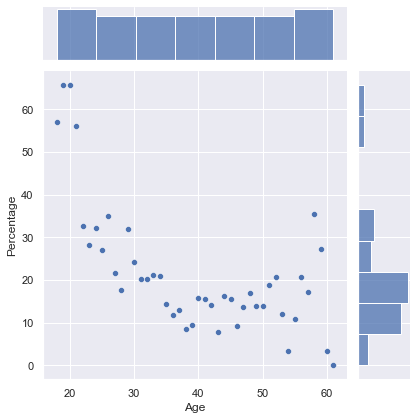

In [62]:
sns.jointplot(data=Merge, x='Age', y='Percentage');

Observations:
* Customers 21 and under are much more likely to have purchased a package, above 55%. This number declines sharply to the age of 40, where the trend appears to flatten out at about 15%. 

### Categorical Variables vs. Target Variable

Above we looked at our continuous variables vs. our target variable. We will now look at our categorical variables vs. our target variable.

In [63]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,df['ProdTaken'],margins=True)#.sort_values(by=0,ascending=False)
    ## add some columns to the crosstab to calculate percentages for us
    tab1['Percent_0'] = (tab1[0] / tab1['All'])*100
    tab1['Percent_1'] = (tab1[1] / tab1['All'])*100
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,df['ProdTaken'],normalize='index')#.sort_values(by=0,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

ProdTaken         0    1   All  Percent_0  Percent_1
NumberOfTrips                                       
1.0             508  112   620  81.935484  18.064516
2.0            1165  299  1464  79.576503  20.423497
3.0             862  217  1079  79.888786  20.111214
4.0             417   61   478  87.238494  12.761506
5.0             396   62   458  86.462882  13.537118
6.0             258   64   322  80.124224  19.875776
7.0             156   62   218  71.559633  28.440367
8.0              76   29   105  72.380952  27.619048
9.0               2    2     4  50.000000  50.000000
All            3840  908  4748  80.876158  19.123842
------------------------------------------------------------------------------------------------------------------------


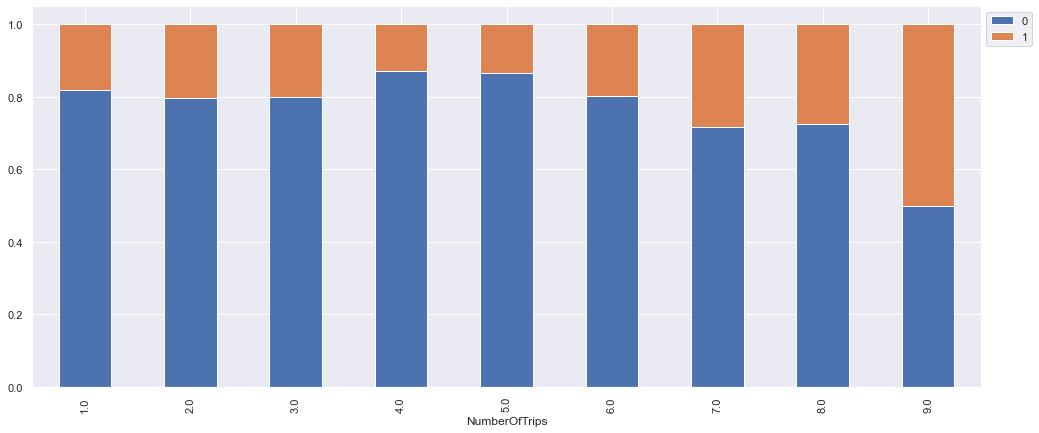

In [64]:
stacked_plot(df['NumberOfTrips'])

* Customers who take a larger number of trips are more likely to have purchased a product. 50 percent of customers who take 9 or more trips a year have purchased a product. Approx. 28% of customers who take 7 or 8 trips a year have purchased a product. Below that, the percentages start to drop: Around 20% for customers taking 1,2,3 or 6 trips, with a dip in the middle of 13% for customers taking 4 or 5 trips.

ProdTaken     0    1   All  Percent_0  Percent_1
CityTier                                        
1          2670  520  3190  83.699060  16.300940
2           152   46   198  76.767677  23.232323
3          1146  354  1500  76.400000  23.600000
All        3968  920  4888  81.178396  18.821604
------------------------------------------------------------------------------------------------------------------------


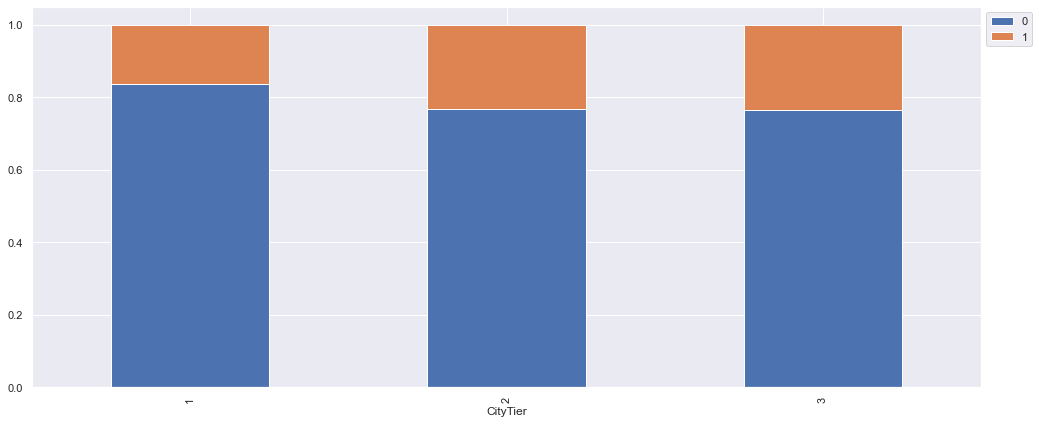

In [65]:
stacked_plot(df['CityTier'])

* Customers in City Tier 2 and 3 are more likely to have purchased a product, around 23%, compared to only 16% of Tier 1 city customers.

ProdTaken                  0    1   All   Percent_0  Percent_1
NumberOfPersonVisiting                                        
1                         39    0    39  100.000000   0.000000
2                       1151  267  1418   81.170663  18.829337
3                       1942  460  2402   80.849292  19.150708
4                        833  193  1026   81.189084  18.810916
5                          3    0     3  100.000000   0.000000
All                     3968  920  4888   81.178396  18.821604
------------------------------------------------------------------------------------------------------------------------


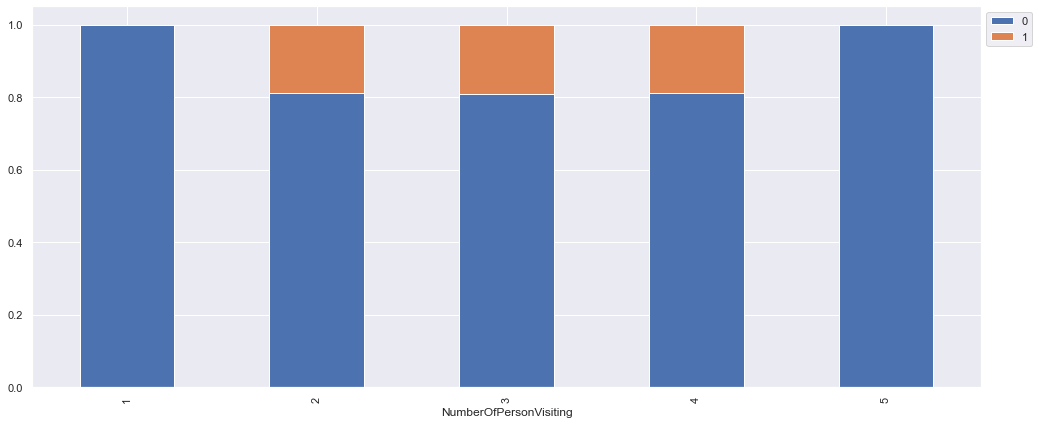

In [66]:
stacked_plot(df['NumberOfPersonVisiting'])

* No customers visiting 1 or 5 people have bought a product. Of customers visiting 2-4 people, about 19% have purchased a product.

ProdTaken             0    1   All  Percent_0  Percent_1
NumberOfFollowups                                       
1.0                 156   20   176  88.636364  11.363636
2.0                 205   24   229  89.519651  10.480349
3.0                1222  244  1466  83.356071  16.643929
4.0                1689  379  2068  81.673114  18.326886
5.0                 577  191   768  75.130208  24.869792
6.0                  82   54   136  60.294118  39.705882
All                3931  912  4843  81.168697  18.831303
------------------------------------------------------------------------------------------------------------------------


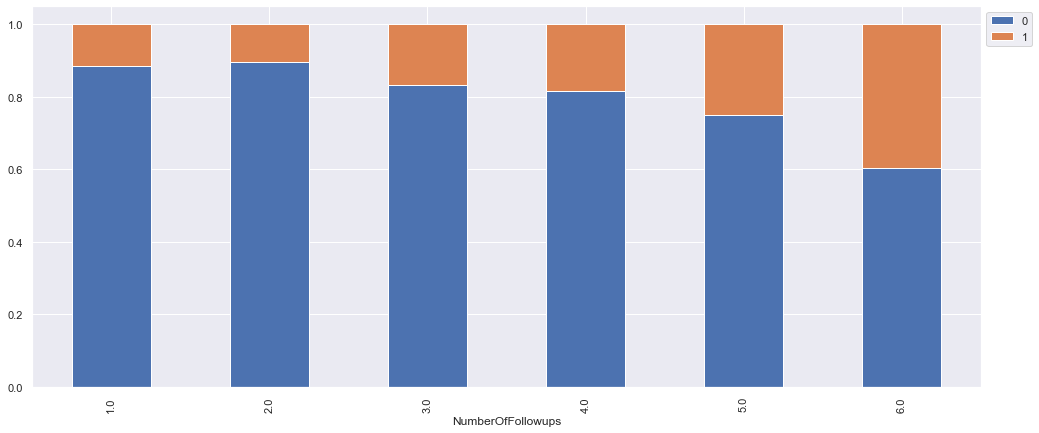

In [67]:
stacked_plot(df['NumberOfFollowups'])

* The likelihood of a customer purchasing a product goes up as the number of follow ups goes up. 11% for customers with only 1 follow up. 40% for customers with 6 follow ups.

ProdTaken                 0    1   All  Percent_0  Percent_1
PreferredPropertyStar                                       
3.0                    2511  482  2993  83.895757  16.104243
4.0                     731  182   913  80.065717  19.934283
5.0                     706  250   956  73.849372  26.150628
All                    3948  914  4862  81.201152  18.798848
------------------------------------------------------------------------------------------------------------------------


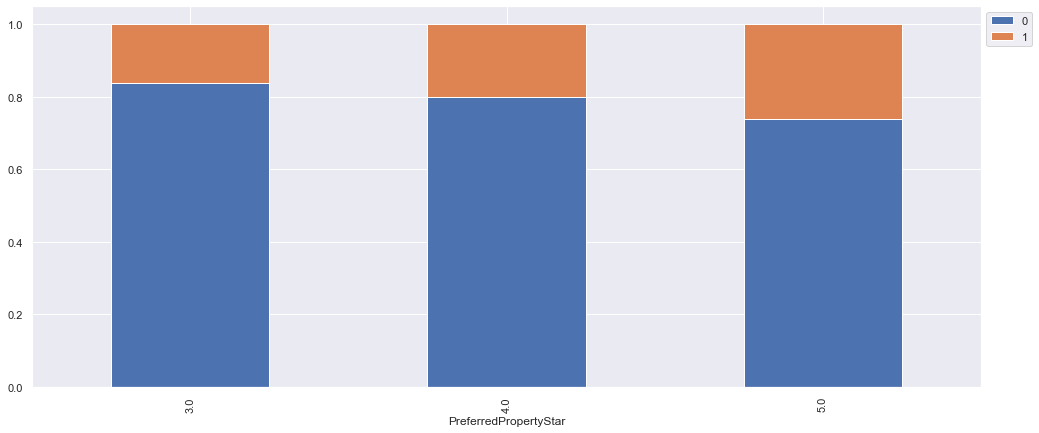

In [68]:
stacked_plot(df['PreferredPropertyStar'])

* Customers who prefer higher star properties are slightly more likely to have purchased a product. 16% for customers who prefer 3 star, 20% for customers who prefer 4 star and 26% for customers who prefer 5 star.

ProdTaken                  0    1   All  Percent_0  Percent_1
PitchSatisfactionScore                                       
1                        798  144   942  84.713376  15.286624
2                        498   88   586  84.982935  15.017065
3                       1162  316  1478  78.619756  21.380244
4                        750  162   912  82.236842  17.763158
5                        760  210   970  78.350515  21.649485
All                     3968  920  4888  81.178396  18.821604
------------------------------------------------------------------------------------------------------------------------


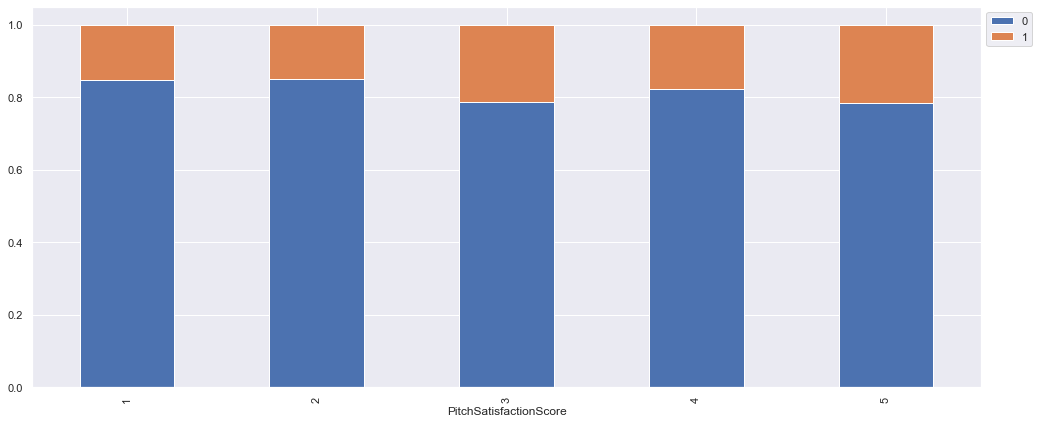

In [69]:
stacked_plot(df['PitchSatisfactionScore'])

* There is a relationship between Pitch Satisfaction Score and a customer having purchased a product. The likelihood increases slightly from 15% for customers who gave a score of 1 to 20% for customer who gave a score of 5.

ProdTaken                    0    1   All  Percent_0  Percent_1
NumberOfChildrenVisiting                                       
0.0                        880  202  1082  81.330869  18.669131
1.0                       1688  392  2080  81.153846  18.846154
2.0                       1082  253  1335  81.048689  18.951311
3.0                        259   66   325  79.692308  20.307692
All                       3909  913  4822  81.065948  18.934052
------------------------------------------------------------------------------------------------------------------------


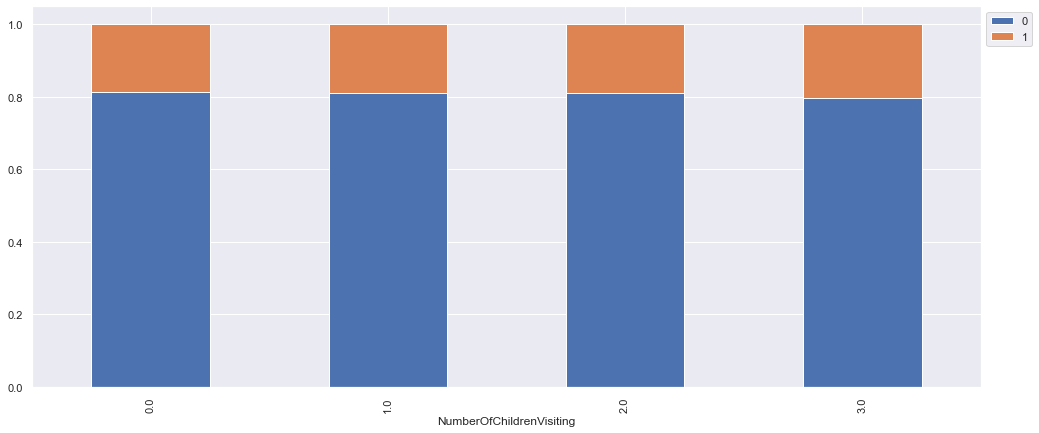

In [70]:
stacked_plot(df['NumberOfChildrenVisiting'])

* There is no relationship between the number of children visiting and a customer having purchased a product.

ProdTaken     0    1   All  Percent_0  Percent_1
Passport                                        
0          3040  426  3466  87.709175  12.290825
1           928  494  1422  65.260197  34.739803
All        3968  920  4888  81.178396  18.821604
------------------------------------------------------------------------------------------------------------------------


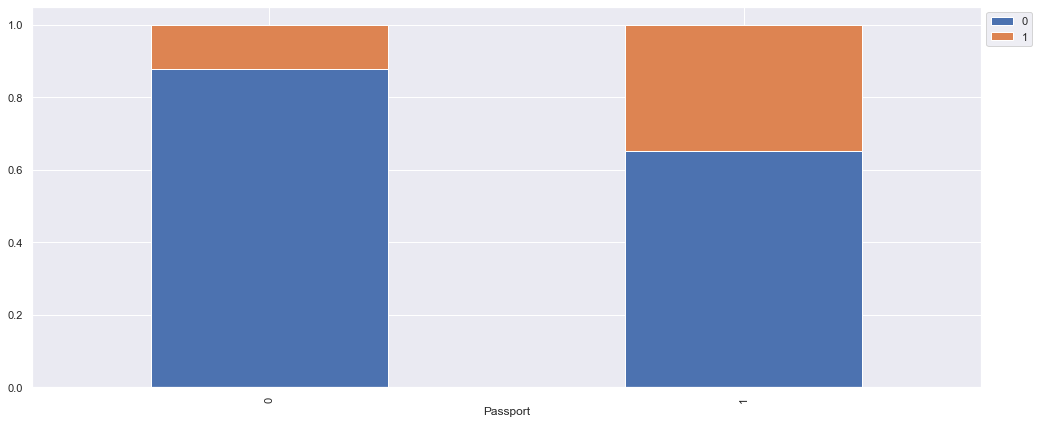

In [71]:
stacked_plot(df['Passport'])

* Customers who own a passport are almost 3x more likely to have purchased a product. 12% of customers without a passport and 35% of customers with a passport purchased a product.

ProdTaken     0    1   All  Percent_0  Percent_1
OwnCar                                          
0          1496  360  1856  80.603448  19.396552
1          2472  560  3032  81.530343  18.469657
All        3968  920  4888  81.178396  18.821604
------------------------------------------------------------------------------------------------------------------------


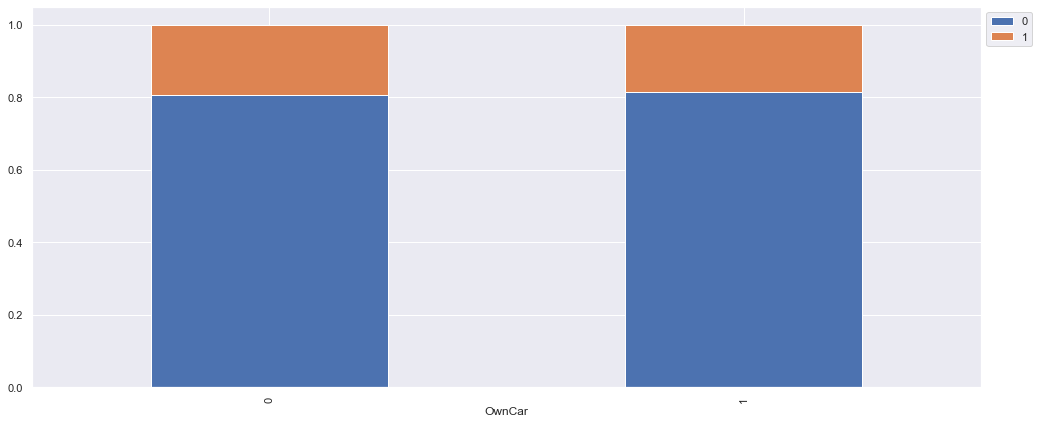

In [72]:
stacked_plot(df['OwnCar'])

* There is no relationship between a customer owning a car and having purchased a product.

ProdTaken           0    1   All  Percent_0  Percent_1
TypeofContact                                         
Company Invited  1109  310  1419  78.153629  21.846371
Self Enquiry     2837  607  3444  82.375145  17.624855
All              3946  917  4863  81.143327  18.856673
------------------------------------------------------------------------------------------------------------------------


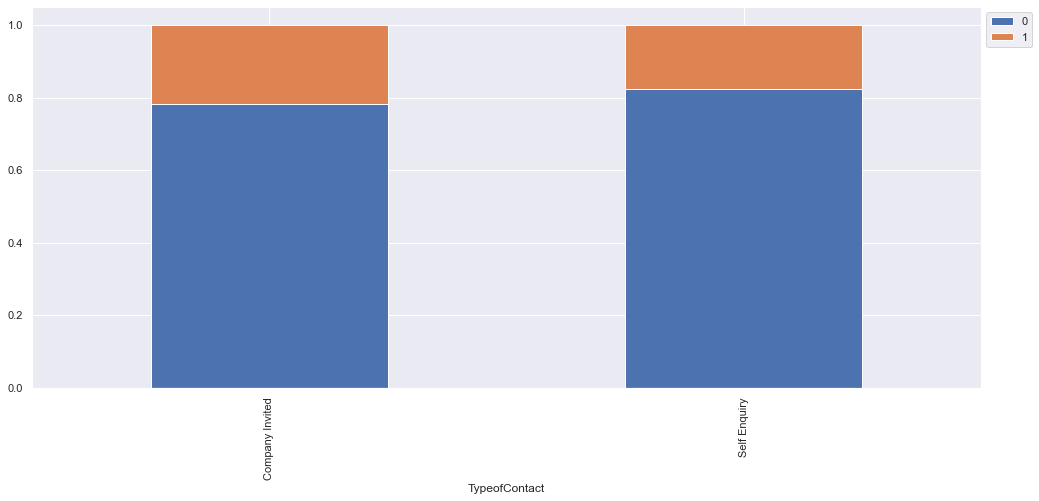

In [73]:
stacked_plot(df['TypeofContact'])

* Customers who were Company Invited are very slightly more likely to have purchased a product.

ProdTaken          0    1   All  Percent_0  Percent_1
Occupation                                           
Large Business   314  120   434  72.350230  27.649770
Salaried        1954  414  2368  82.516892  17.483108
Small Business  1700  386  2086  81.495686  18.504314
All             3968  920  4888  81.178396  18.821604
------------------------------------------------------------------------------------------------------------------------


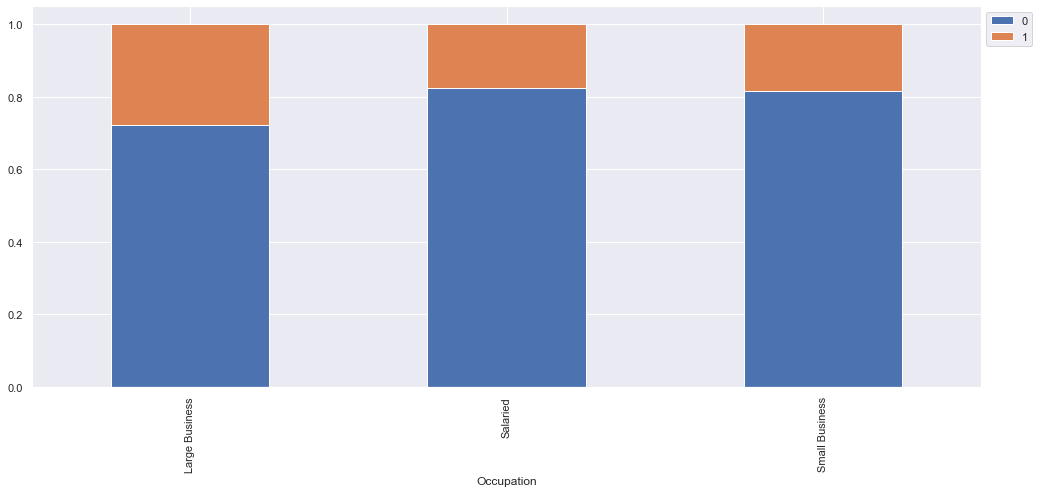

In [74]:
stacked_plot(df['Occupation'])

* Customers with Occupation “Large Business” are more likely to have purchased a product 27.5%, compared to about 18% of other customers.

ProdTaken     0    1   All  Percent_0  Percent_1
Gender                                          
Female     1630  342  1972  82.657201  17.342799
Male       2338  578  2916  80.178326  19.821674
All        3968  920  4888  81.178396  18.821604
------------------------------------------------------------------------------------------------------------------------


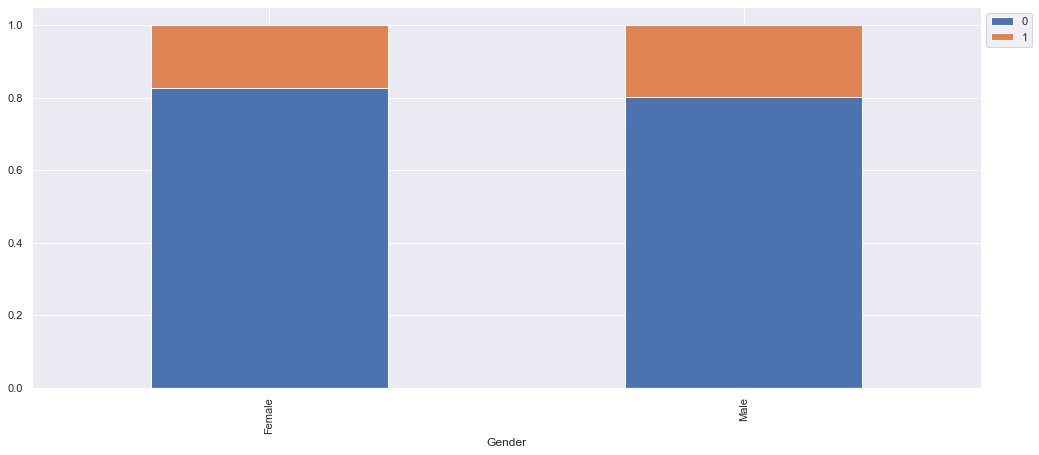

In [75]:
stacked_plot(df['Gender'])

* There is no relationship between Gender and having purchased a product.

ProdTaken          0    1   All  Percent_0  Percent_1
ProductPitched                                       
Basic           1290  552  1842  70.032573  29.967427
Deluxe          1528  204  1732  88.221709  11.778291
King             210   20   230  91.304348   8.695652
Standard         618  124   742  83.288410  16.711590
Super Deluxe     322   20   342  94.152047   5.847953
All             3968  920  4888  81.178396  18.821604
------------------------------------------------------------------------------------------------------------------------


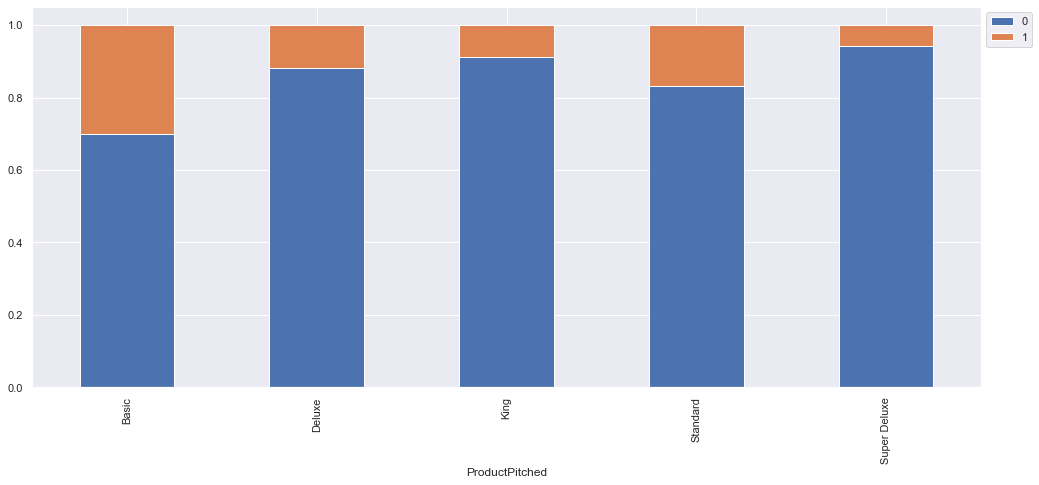

In [76]:
stacked_plot(df['ProductPitched'])

* Customers pitched the Basic product were 2-3x more likely to have purchased a product. 30% of Customers pitched the Basic product, 16% of customers pitched the Standard product, around 10% of customers pitched the Deluxe or King and 6% of customers pitched the Super Deluxe purchased a product.

ProdTaken         0    1   All  Percent_0  Percent_1
MaritalStatus                                       
Divorced        826  124   950  86.947368  13.052632
Married        2014  326  2340  86.068376  13.931624
Single          612  304   916  66.812227  33.187773
Unmarried       516  166   682  75.659824  24.340176
All            3968  920  4888  81.178396  18.821604
------------------------------------------------------------------------------------------------------------------------


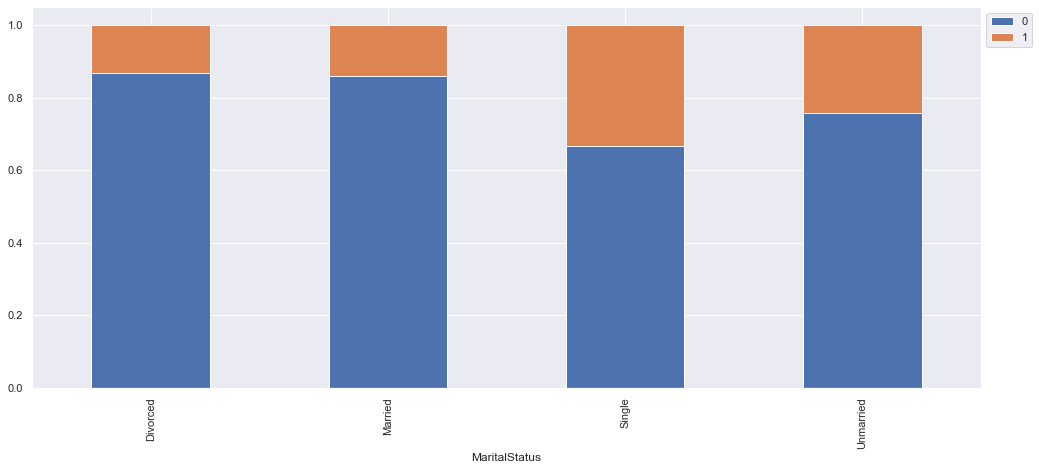

In [77]:
stacked_plot(df['MaritalStatus'])

* Customers who are single are more likely to have purchased a product (33%), customers who are unmarried the 2nd most likely (24%), followed by married and divorced customers (14 and 13% respectively). I was thinking of merging unmarried and single, but it does appear that there is a difference there that is meaningful to the target variable.

ProdTaken          0    1   All  Percent_0  Percent_1
Designation                                          
AVP              322   20   342  94.152047   5.847953
Executive       1290  552  1842  70.032573  29.967427
Manager         1528  204  1732  88.221709  11.778291
Senior Manager   618  124   742  83.288410  16.711590
VP               210   20   230  91.304348   8.695652
All             3968  920  4888  81.178396  18.821604
------------------------------------------------------------------------------------------------------------------------


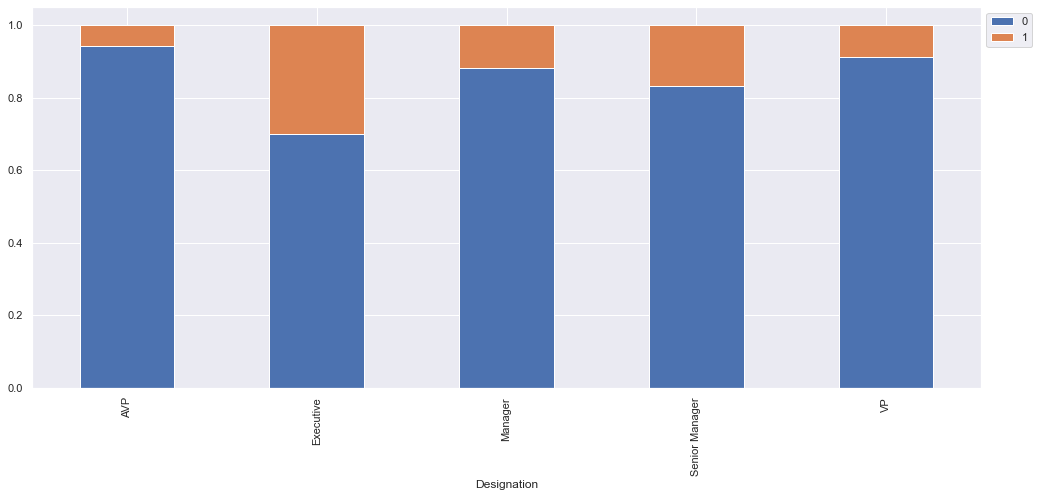

In [78]:
stacked_plot(df['Designation'])

* Customers who are executives are the most likely to have purchased a product (30%). Customers who are Senior Managers purchased a product 16% of the time, followed by Managers, VPs and AVPs.

The features where we saw the biggest difference were: Passport, product pitched, marital status, number of follow ups and number of persons visiting. We expect to see these rank highly in our feature importance’s when modelling.


## Deep Dive EDA

The following graphs are not directly related to our target variable but are an interesting dive into the data, which may be useful to "Visit with us".

### Difference between "Single" and "Unmarried"

I was thinking of merging these two classes, however there is quite a difference in their relation to the target variable. (33% Single customers purchased a product, only 24% of unmarried customers purchased a product). So what is the difference between these two classes. Perhaps, "Unmarried" refers to customers who live as part of a couple but are unmarried, while single refers to people who live alone or with their parents, without a romantic partner.

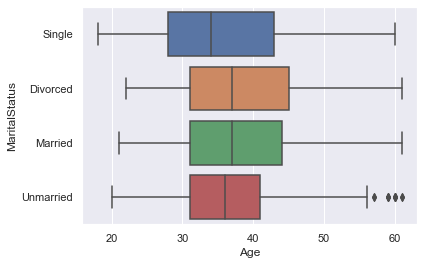

In [79]:
sns.boxplot(data=df, x='Age', y='MaritalStatus');

It appears that, in general, single people are slightly younger than unmarried people.

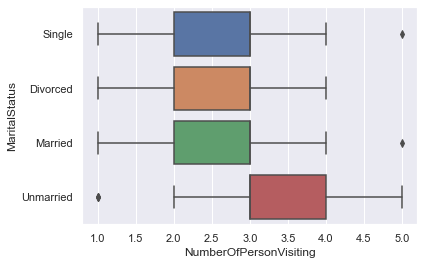

In [80]:
sns.boxplot(data=df, x='NumberOfPersonVisiting', y='MaritalStatus');

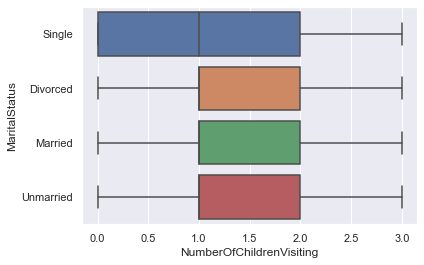

In [81]:
sns.boxplot(data=df, x='NumberOfChildrenVisiting', y='MaritalStatus');

Single people tend to travel with less people than unmarried AND travel will less children under 5. So it does seem that our suspicion is correct here. Single: Single people tend to be younger, travel with less people and travel with children less often. Unmarried people tend to be older, travel with more people and travel with more children.

### Effect of Duration of Pitch

Let's find out if sales people are wasting their time with a long pitch, perhaps a short pitch works just as well?

First lets' see if the length of pitch affects the Pitch Satisfaction Score.

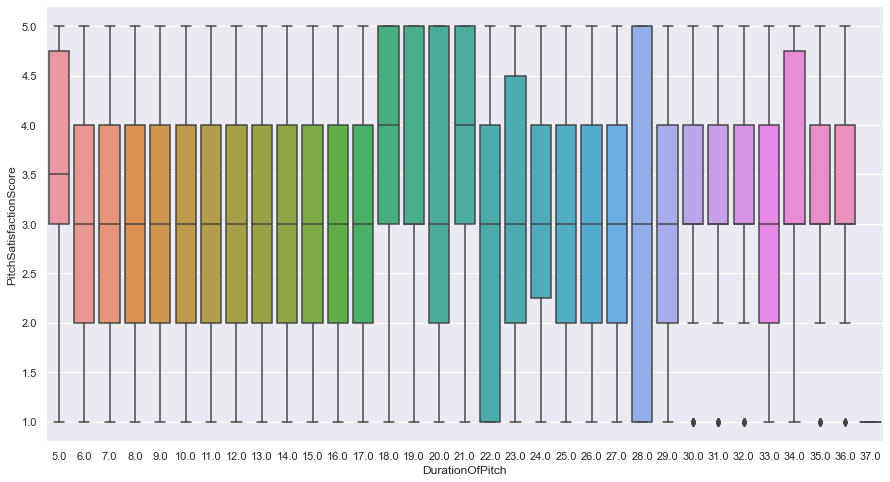

In [82]:
fix, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=df, x='DurationOfPitch', y='PitchSatisfactionScore');

It looks like customers were the most satisfied with the pitch when it was about 18-20 minutes long. When the pitch was only 5 minutes long the satisfaction score was also slightly higher than normal. There are some bumps above 21 minutes, but the plot above would indicate that there is little point in a pitch longer than 21 minutes.

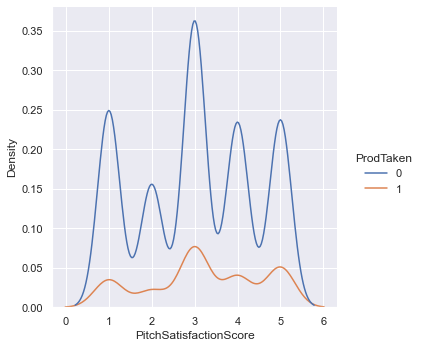

In [83]:
df['ProdTaken'] = df['ProdTaken'].astype('category')
sns.displot(data=df, x='PitchSatisfactionScore', hue='ProdTaken', kind='kde')

* We can see that the pitch satifaction score does play a role in a customer purchasing a product. A higher percentage of customers purchased a product if their PitchSatisfactionScore was 4 or 5.

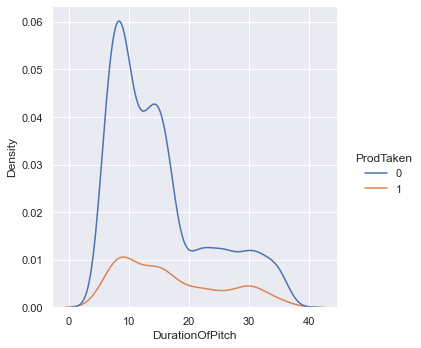

In [84]:
sns.displot(data=df, x='DurationOfPitch', hue="ProdTaken", kind='kde');

* It appears that, as duration of pitch increases, the proportion of customers who went on to purchase a product increases. Let's investigate this further and try to quantify it.

In [85]:
df['ProdTaken'] = df['ProdTaken'].astype('int64')
# First Create a data frame that has Duration of Pitch as the index and the number of times the product was taken as a column
temp = df.groupby('DurationOfPitch').sum()
ProdTakenCount = temp[['ProdTaken']]

# Next Create a data frame that has Duration of Pitch as the index and the number of times that pitch duration exists in the 
# data as a column

ValueCounts = pd.DataFrame(df['DurationOfPitch'].value_counts(ascending=False))
ValueCounts.columns = ['Count']
ValueCounts.index.name = 'DurationOfPitch'

# Now concat the two together using the index
Merge = pd.concat([ProdTakenCount,ValueCounts],axis=1)
Merge = Merge.reset_index() # after merging on the index (Duration of Pitch), we can move it to a column

# Finally, we can find the percentage of times a pitch duration "worked", i.e. the customer purchased a product
Merge['Percentage'] = (Merge['ProdTaken']/Merge['Count'])*100 
Merge

DurationOfPitch  ProdTaken  Count  Percentage
0               5.0          0      6    0.000000
1               6.0         39    307   12.703583
2               7.0         48    342   14.035088
3               8.0         60    333   18.018018
4               9.0         79    483   16.356108
5              10.0         45    244   18.442623
6              11.0         37    205   18.048780
7              12.0         33    195   16.923077
8              13.0         32    223   14.349776
9              14.0         41    253   16.205534
10             15.0         52    269   19.330855
11             16.0         56    274   20.437956
12             17.0         24    172   13.953488
13             18.0         19     75   25.333333
14             19.0         21     57   36.842105
15             20.0         19     65   29.230769
16             21.0         16     73   21.917808
17             22.0         23     89   25.842697
18             23.0         21     79   26.582278
19             24.0         16     70   22.857143
20             25.0         14     73   19.178082
21             26.0         12     72   16.666667
22             27.0         14     72   19.444444
23             28.0         17     61   27.868852
24             29.0         21     74   28.378378
25             30.0         30     95   31.578947
26             31.0         31     83   37.349398
27             32.0         15     74   20.270270
28             33.0         11     57   19.298246
29             34.0          8     50   16.000000
30             35.0         11     66   16.666667
31             36.0         10     44   22.727273
32             37.0          0      2    0.000000

We now have a data frame with:
* A row for each pitch duration
* The number of times that pitch duration was given ("Count")
* The number of times a customer actually purchased a product per pitch duration ("ProdTaken")
* The *percentage* of times a customer purchased a product per pitch duration

So let's plot Pitch Duration vs. Percentage of Customers who purchased a product.

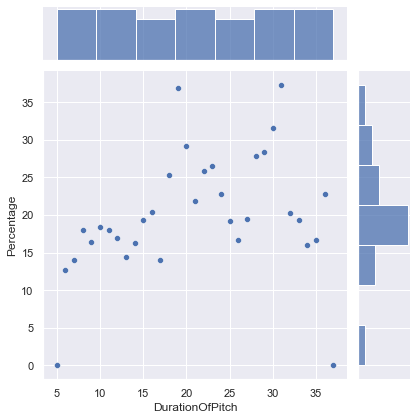

In [86]:
sns.jointplot(data=Merge, x='DurationOfPitch', y='Percentage');

Observations:
* There is a rough linear trend to the data: as Duration of Pitch increases, the percentage of customers who went on to purchase a product increases. The correlation is tighter for lower values of Duration of Pitch.
* The linear trend appears to breakdown when Duration of Pitch exceeds 31 minutes, at this point, there is a drop in the percentage of customers who purchased a product. When the duration of pitch was 36 minutes or more the percentage of customers who perchased a product is zero. So longer pitches appear to work better, up to about 30 minutes. After that, longer pitches decrease the chances a customer will purchase a product.
* There are two peaks in the percentages at 19 minutes (36.8%) and 31 minutes (37.3%)

**Recommendations**
* The pitch duration with the highest customer conversion rate is 31 minutes. However, exceeding 31 minutes leads to a sharp drop in customer conversion rates.
* The pitch duration that gives both the highest pitch satisfaction score and has a high conversion rating is 19 minutes.
* If we assume that there is some noise in the data: My final recommendation is to create a sales pitch between 18-30 minutes long, tying to hit the shorter side of that range to maximize customer conversion rate and customer satisfaction with the sales pitch.

# EDA Customer Profiles for Different Product Types

There are a number of different product types in the "ProductPitched" column: Basic, Standard, Deluxe, Super Deluxe and King. Let's see if we can create a customer profile for each product type. This will help the sales team decide which product to pitch to which prospective customer.

In [87]:
# First we will create a data base the contains only customers who purchased a product, 
# we are not interested in customers who did not purchase a product
Profile = df[df['ProdTaken']==1]
Profile

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
0             1  41.0     Self Enquiry         3              6.0   
2             1  37.0     Self Enquiry         1              8.0   
14            1  28.0     Self Enquiry         1             30.0   
21            1   NaN     Self Enquiry         3             15.0   
24            1  34.0     Self Enquiry         1             12.0   
...         ...   ...              ...       ...              ...   
4883          1  49.0     Self Enquiry         3              9.0   
4884          1  28.0  Company Invited         1             31.0   
4885          1  52.0     Self Enquiry         3             17.0   
4886          1  19.0     Self Enquiry         3             16.0   
4887          1  36.0     Self Enquiry         1             14.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
0           Salaried  Female                       3                3.0   
2     Small Business    Male                       3                4.0   
14          Salaried    Male                       2                4.0   
21          Salaried    Male                       2                4.0   
24    Small Business    Male                       2                3.0   
...              ...     ...                     ...                ...   
4883  Small Business    Male                       3                5.0   
4884        Salaried    Male                       4                5.0   
4885        Salaried  Female                       4                4.0   
4886  Small Business    Male                       3                4.0   
4887        Salaried    Male                       4                4.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
0            Deluxe                    3.0        Single            1.0   
2             Basic                    3.0        Single            7.0   
14            Basic                    3.0        Single            6.0   
21           Deluxe                    5.0        Single            1.0   
24            Basic                    5.0        Single            3.0   
...             ...                    ...           ...            ...   
4883         Deluxe                    4.0     Unmarried            2.0   
4884          Basic                    3.0        Single            3.0   
4885       Standard                    4.0       Married            7.0   
4886          Basic                    3.0        Single            3.0   
4887          Basic                    4.0     Unmarried            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
0            1                       2       1                       0.0   
2            1                       3       0                       0.0   
14           1                       2       0                       0.0   
21           0                       2       0                       0.0   
24           0                       2       1                       1.0   
...        ...                     ...     ...                       ...   
4883         1                       1       1                       1.0   
4884         1                       3       1                       2.0   
4885         0                       1       1                       3.0   
4886         0                       5       0                       2.0   
4887         1                       3       1                       2.0   

         Designation  MonthlyIncome  
0            Manager        20993.0  
2          Executive        17090.0  
14         Executive        17028.0  
21           Manager        18407.0  
24         Executive        17960.0  
...              ...            ...  
4883         Manager        26576.0  
4884       Executive        21212.0  
4885  Senior Manager        31820.0  
4886       Executive        20289.0  
4887       Executive        24041.0  

[920 

In [88]:
# Next let's drop the customer interaction data, as it has little to do with the customer profile
# Also drop ProdTaken as we already know that will = 1 for this data frame
Profile.drop(['PitchSatisfactionScore','NumberOfFollowups','DurationOfPitch','ProdTaken'], axis=1, inplace=True)

All of the information we need to make a profile on which customer types bought which packages is in the next 3 cells. We will make some observations based on the raw statistics, then we will plot some graphs for easier visualization.

In [89]:
Profile.groupby('ProductPitched').median()

Age  CityTier  NumberOfPersonVisiting  PreferredPropertyStar  \
ProductPitched                                                                  
Basic           30.0         1                       3                    3.0   
Deluxe          35.5         3                       3                    3.0   
King            52.5         1                       3                    4.0   
Standard        38.0         3                       3                    3.0   
Super Deluxe    42.0         3                       3                    3.0   

                NumberOfTrips  Passport  OwnCar  NumberOfChildrenVisiting  \
ProductPitched                                                              
Basic                     3.0         1       1                       1.0   
Deluxe                    3.0         0       1                       1.0   
King                      3.0         1       1                       1.0   
Standard                  2.0         0       1                       1.0   
Super Deluxe              2.0         1       1                       1.0   

                MonthlyIncome  
ProductPitched                 
Basic                 20582.0  
Deluxe                23186.0  
King                  34859.0  
Standard              25711.0  
Super Deluxe          29802.5

In [90]:
Profile.groupby('ProductPitched').mean()

Age  CityTier  NumberOfPersonVisiting  \
ProductPitched                                                
Basic           31.289320  1.510870                2.905797   
Deluxe          37.641414  2.411765                2.950980   
King            48.900000  1.800000                2.900000   
Standard        41.008130  2.096774                2.967742   
Super Deluxe    43.500000  2.600000                2.700000   

                PreferredPropertyStar  NumberOfTrips  Passport    OwnCar  \
ProductPitched                                                             
Basic                        3.771739       3.188300  0.583333  0.572464   
Deluxe                       3.699507       3.702970  0.490196  0.607843   
King                         3.750000       3.411765  0.600000  0.900000   
Standard                     3.731707       3.016260  0.387097  0.661290   
Super Deluxe                 3.600000       3.263158  0.600000  1.000000   

                NumberOfChildrenVisiting  MonthlyIncome  
ProductPitched                                           
Basic                           1.221416   20161.529301  
Deluxe                          1.172414   23106.215385  
King                            1.437500   34672.100000  
Standard                        1.121951   26035.419355  
Super Deluxe                    1.200000   29823.800000

In [91]:
Profile.groupby('ProductPitched').describe(include='all')

Age                                                         \
                count unique top freq       mean       std   min   25%   50%   
ProductPitched                                                                 
Basic           515.0    NaN NaN  NaN  31.289320  9.070829  18.0  25.0  30.0   
Deluxe          198.0    NaN NaN  NaN  37.641414  8.469575  21.0  32.0  35.5   
King             20.0    NaN NaN  NaN  48.900000  9.618513  27.0  42.0  52.5   
Standard        123.0    NaN NaN  NaN  41.008130  9.876695  19.0  33.0  38.0   
Super Deluxe     20.0    NaN NaN  NaN  43.500000  4.839530  39.0  40.0  42.0   

                            TypeofContact                                    \
                  75%   max         count unique              top freq mean   
ProductPitched                                                                
Basic           35.00  59.0           549      2     Self Enquiry  355  NaN   
Deluxe          44.00  59.0           204      2     Self Enquiry  136  NaN   
King            56.00  59.0            20      1     Self Enquiry   20  NaN   
Standard        49.00  60.0           124      2     Self Enquiry   92  NaN   
Super Deluxe    45.25  56.0            20      2  Company Invited   16  NaN   

                                             CityTier                  \
                std  min  25%  50%  75%  max    count unique top freq   
ProductPitched                                                          
Basic           NaN  NaN  NaN  NaN  NaN  NaN    552.0    NaN NaN  NaN   
Deluxe          NaN  NaN  NaN  NaN  NaN  NaN    204.0    NaN NaN  NaN   
King            NaN  NaN  NaN  NaN  NaN  NaN     20.0    NaN NaN  NaN   
Standard        NaN  NaN  NaN  NaN  NaN  NaN    124.0    NaN NaN  NaN   
Super Deluxe    NaN  NaN  NaN  NaN  NaN  NaN     20.0    NaN NaN  NaN   

                                                            Occupation         \
                    mean       std  min  25%  50%  75%  max      count unique   
ProductPitched                                                                  
Basic           1.510870  0.832566  1.0  1.0  1.0  2.0  3.0        552      3   
Deluxe          2.411765  0.913532  1.0  1.0  3.0  3.0  3.0        204      3   
King            1.800000  1.005249  1.0  1.0  1.0  3.0  3.0         20      3   
Standard        2.096774  0.966255  1.0  1.0  3.0  3.0  3.0        124      3   
Super Deluxe    2.600000  0.820783  1.0  3.0  3.0  3.0  3.0         20      2   

                                                                       Gender  \
                           top freq mean  std  min  25%  50%  75%  max  count   
ProductPitched                                                                  
Basic                 Salaried  260  NaN  NaN  NaN  NaN  NaN  NaN  NaN    552   
Deluxe          Small Business  108  NaN  NaN  NaN  NaN  NaN  NaN  NaN    204   
King            Small Business   12  NaN  NaN  NaN  NaN  NaN  NaN  NaN     20   
Standard        Small Business   58  NaN  NaN  NaN  NaN  NaN  NaN  NaN    124   
Super Deluxe          Salaried   16  NaN  NaN  NaN  NaN  NaN  NaN  NaN     20   

                                                                       \
               unique     top freq mean  std  min  25%  50%  75%  max   
ProductPitched                                                          
Basic               2    Male  344  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Deluxe              2    Male  134  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
King                2  Female   12  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Standard            2    Male   76  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
Super Deluxe        2    Male   16  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

               NumberOfPersonVisiting                                      \
                                count unique top freq      mean       std   
ProductPitched                                                              
Basic                           552.0    NaN 

Using the statistics above we can create customer profiles of the average customer who purchased each type of package. I will only comment on features if they varied between the package types.    

**Basic**
* Gender: Male
* Average Age: 31
* Marital Status: Single
* Average Monthly Income: 20161
* Occupation: Salaried
* Designation: Executive
* City Tier: 1
* Own Passport: Yes, 58% of Basic package buyers own a passport  

**Deluxe**
* Gender: Male
* Average Age: 37
* Marital Status: Married
* Average Monthly Income: 23106
* Occupation: Small Business
* Designation: Manager
* City Tier: 3
* Own Passport: No, however 49% of Deluxe package buyers own a passport. So, it’s about 50/50  

**Standard**
* Gender: Male
* Average Age: 41
* Marital Status: Married
* Average Monthly Income: 26035
* Occupation: Small Business
* Designation: Senior Manager
* City Tier: 3
* Own Passport: No, 39% of Standard package buyers own a passport  

**Super Deluxe**
* Gender: Male
* Average Age: 43
* Marital Status: Single
* Average Monthly Income: 29824
* Occupation: Salaried
* Designation: AVP
* City Tier: 3
* Own Passport: Yes, 60% of Super Deluxe package buyers own a passport  

**King**
* Gender: Female
* Average Age: 49
* Marital Status: Single
* Average Monthly Income: 34672
* Occupation: Small Business
* Designation: VP
* City Tier: 1
* Own Passport: Yes, 60% of Basic package buyers own a passport  

If I just interpret the words, it would appear that the packages become more extravagant, and more expensive in this order: Basic, Standard, Deluxe, Super Deluxe, King. **However** given that we have no further information about the packages, other than the name, and the trend of the packages appears to go in this order: Basic, Deluxe, Standard, Super Deluxe, King. I am going to assume that this is the order of packages. I will refer to this order as the “level” of the package.

How did I come to this conclusion: If we look at the Age, Monthly Income and Designation, they are all positively correlated. I.e. They all increase together. This reflects our experience of the real world. Older people tend to have more experience. People with more experience tend to have more senior positions in companies (or Designation in this case). People with more senior positions tend to get paid more. Following this logic, we would expect customers with higher incomes to be able to afford more expensive travel packages. If I put the travel packages in the order Basic, Deluxe, Standard, Super Deluxe, King then all my variables increase in a way that reflects my understanding of the world.

That said: The easiest trends to see here are: As age and income goes up, the level of package bought goes up. So in terms of making a customer profile for each package. We could either look at the exact points above or say: as the level of the package goes up, the age, designation and monthly income of the customer profile goes up.

Let's visualize some of the statistics we have seen above:

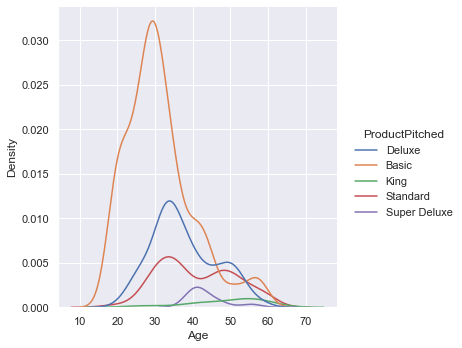

In [92]:
sns.displot(data=Profile, x='Age', hue='ProductPitched', kind='kde');

We can see here that as age increases the "level" of package purchased increases.

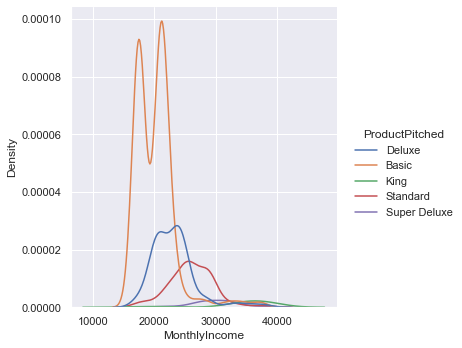

In [93]:
sns.displot(data=Profile, x='MonthlyIncome', hue='ProductPitched', kind='kde');

We can see here that as monthly income increases, the level of package purchased increases.

### Categorical Variables vs. Package Purchaced

We looked at the basic customer profiles for each package above. Let's now see if we can see more detail by plotting the product types coloured by the categorical variables in stacked bar charts.

In [94]:
## Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(Profile['ProductPitched'],x,margins=True)#.sort_values(by=0,ascending=False)
    ## add some columns to the crosstab to calculate percentages for us
    #tab1['Percent_0'] = (tab1[0] / tab1['All'])*100
    #tab1['Percent_1'] = (tab1[1] / tab1['All'])*100
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(Profile['ProductPitched'],x,normalize='index')#.sort_values(by=0,ascending=False)
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.title(x.name)
    plt.show()

NumberOfTrips   1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  All
ProductPitched                                                  
Basic            56  198  155   27   26   29   35   19    2  547
Deluxe           28   49   27   23   29   24   16    6    0  202
King              2    4    6    1    0    2    2    0    0   17
Standard         20   42   29   10    5    7    7    3    0  123
Super Deluxe      6    6    0    0    2    2    2    1    0   19
All             112  299  217   61   62   64   62   29    2  908
------------------------------------------------------------------------------------------------------------------------


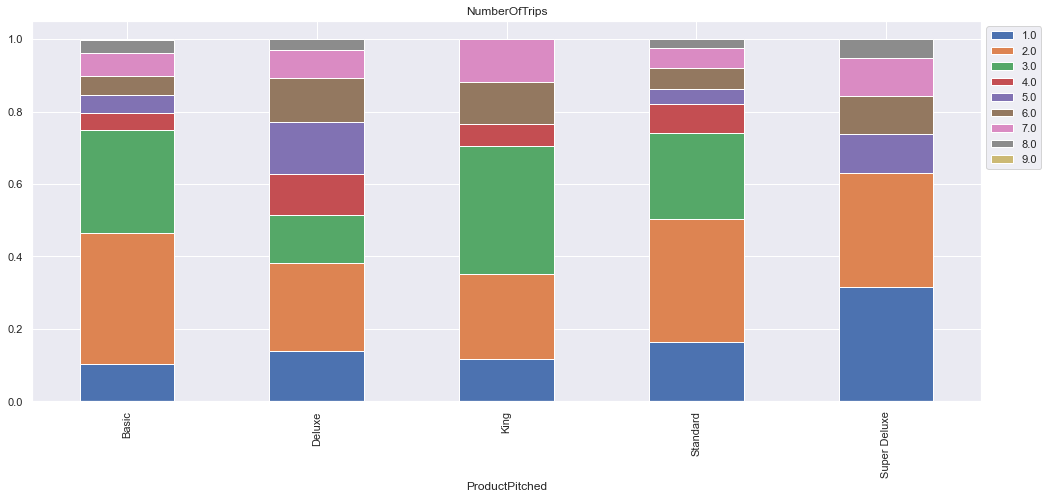

In [95]:
stacked_plot(df['NumberOfTrips'])

* We can see that all customer types take all number of trips. However customers who bought the Deluxe package appear to take more trips than the other customer types. The proportion of 4 or more trips a year is greater in the Deluxe customers.

CityTier          1   2    3  All
ProductPitched                   
Basic           392  38  122  552
Deluxe           60   0  144  204
King             12   0    8   20
Standard         52   8   64  124
Super Deluxe      4   0   16   20
All             520  46  354  920
------------------------------------------------------------------------------------------------------------------------


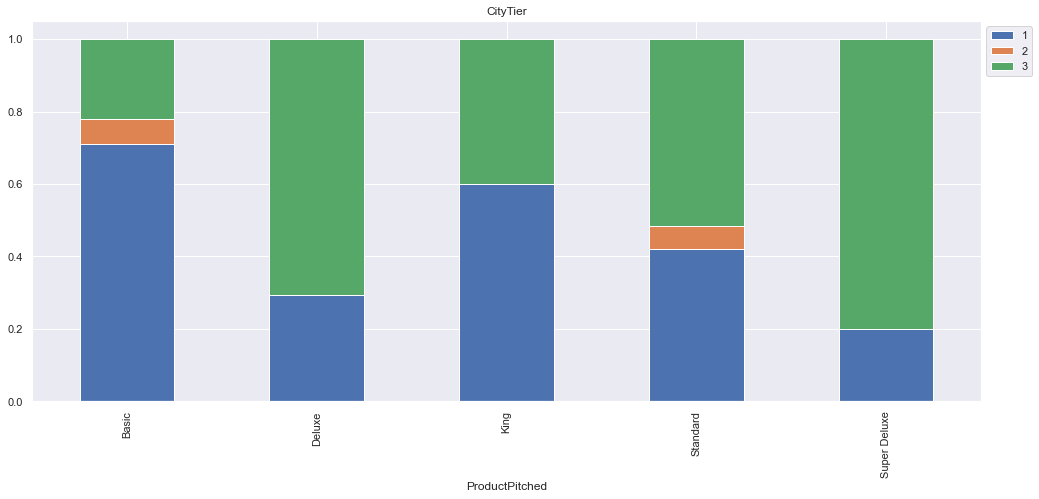

In [96]:
stacked_plot(df['CityTier'])

* Basic and King customers appear more likely to come from Tier 1 cities. The lack of tier 2 cities in the deluxe, super deluxe and king columns is likely due to the lack of tier 2 cities in the data set in general, rather that being characteristic of a customer type.

NumberOfPersonVisiting    2    3    4  All
ProductPitched                            
Basic                   164  276  112  552
Deluxe                   56  102   46  204
King                      6   10    4   20
Standard                 33   62   29  124
Super Deluxe              8   10    2   20
All                     267  460  193  920
------------------------------------------------------------------------------------------------------------------------


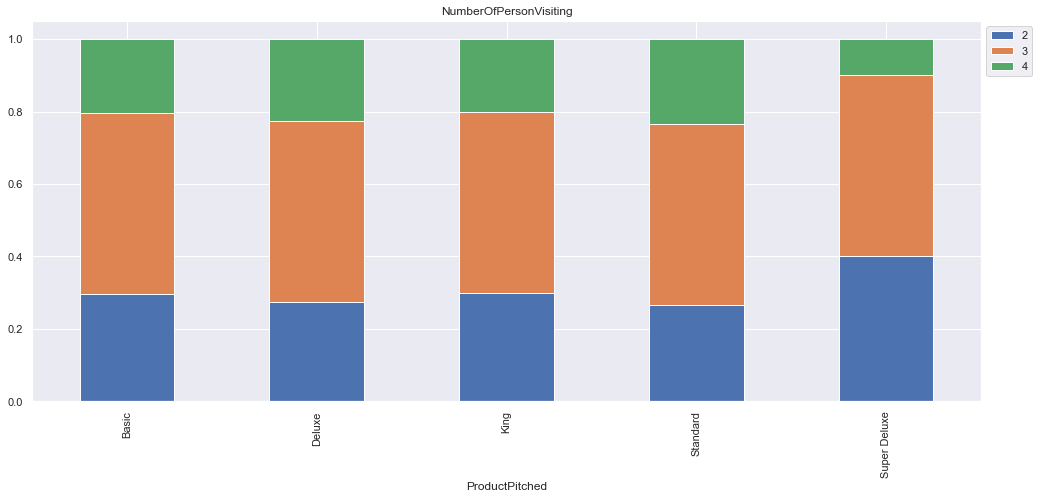

In [97]:
stacked_plot(df['NumberOfPersonVisiting'])

* No real pattern here. Perhaps customers who wish to travel with 2 people are more likely to be Super Deluxe package customers.

PreferredPropertyStar  3.0  4.0  5.0  All
ProductPitched                           
Basic                  282  114  156  552
Deluxe                 114   36   53  203
King                     6    8    2   16
Standard                68   20   35  123
Super Deluxe            12    4    4   20
All                    482  182  250  914
------------------------------------------------------------------------------------------------------------------------


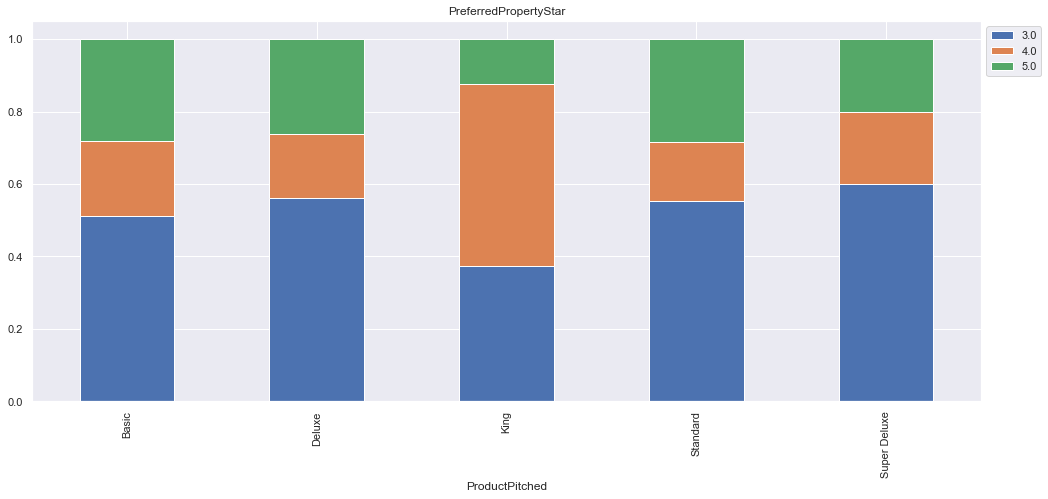

In [98]:
stacked_plot(df['PreferredPropertyStar'])

* There is a pattern here: King package customers are more likely to prefer 4 star properties and less likely to prefer 3 star properties.

NumberOfChildrenVisiting  0.0  1.0  2.0  3.0  All
ProductPitched                                   
Basic                     118  234  158   41  551
Deluxe                     45   90   56   12  203
King                        2    7    5    2   16
Standard                   33   52   28   10  123
Super Deluxe                4    9    6    1   20
All                       202  392  253   66  913
------------------------------------------------------------------------------------------------------------------------


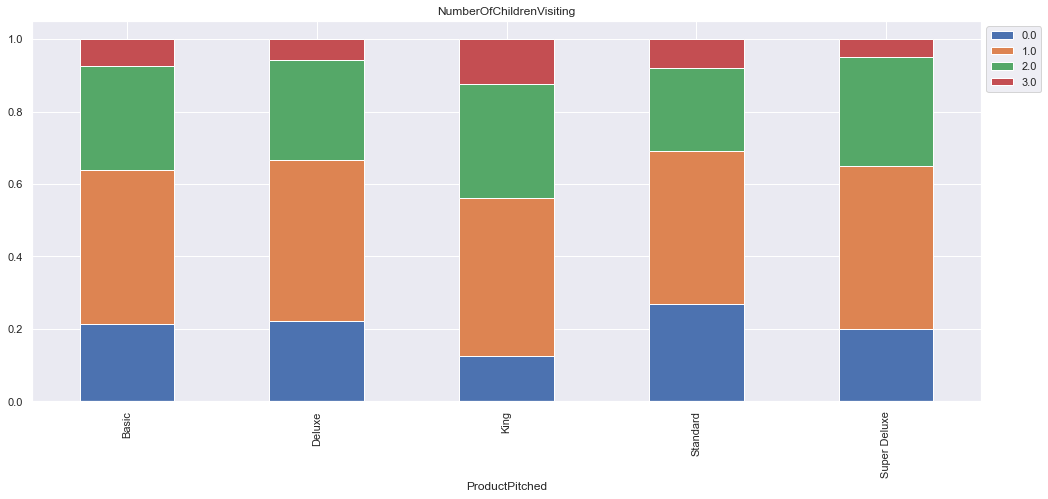

In [99]:
stacked_plot(df['NumberOfChildrenVisiting'])

* Customers who took the King package are slightly more likely to be travelling with more children.

Passport          0    1  All
ProductPitched               
Basic           230  322  552
Deluxe          104  100  204
King              8   12   20
Standard         76   48  124
Super Deluxe      8   12   20
All             426  494  920
------------------------------------------------------------------------------------------------------------------------


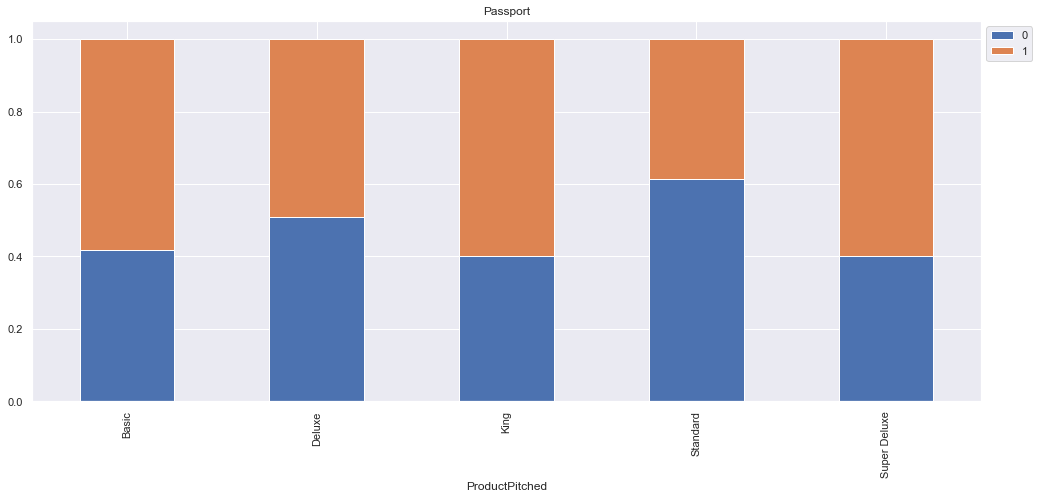

In [100]:
stacked_plot(df['Passport'])

* Customers who took the standard package are slightly less likely to own a passport.

OwnCar            0    1  All
ProductPitched               
Basic           236  316  552
Deluxe           80  124  204
King              2   18   20
Standard         42   82  124
Super Deluxe      0   20   20
All             360  560  920
------------------------------------------------------------------------------------------------------------------------


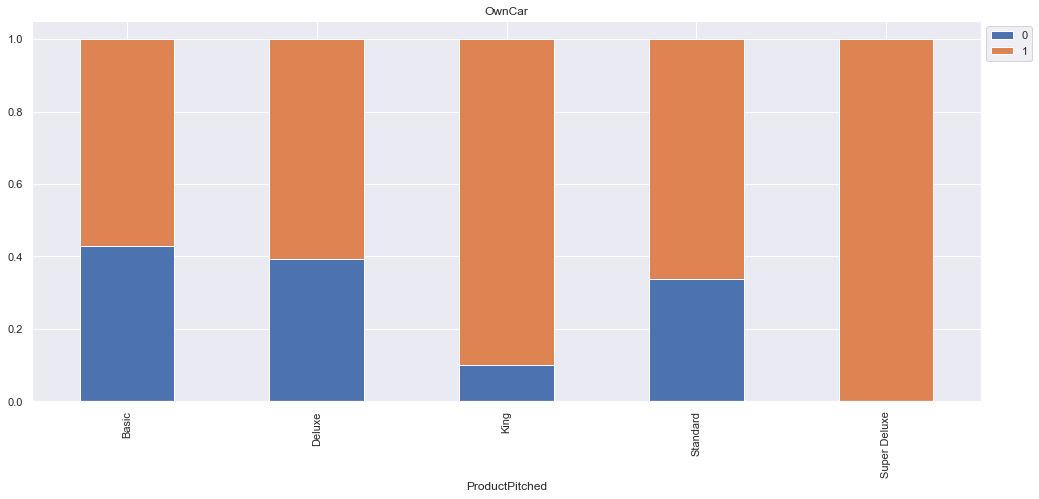

In [101]:
stacked_plot(df['OwnCar'])

* Customers who took the Super Deluxe and King packages very likely own a car. All of the Super Deluxe customers and about 90% of King customers own a car.

TypeofContact   Company Invited  Self Enquiry  All
ProductPitched                                    
Basic                       194           355  549
Deluxe                       68           136  204
King                          0            20   20
Standard                     32            92  124
Super Deluxe                 16             4   20
All                         310           607  917
------------------------------------------------------------------------------------------------------------------------


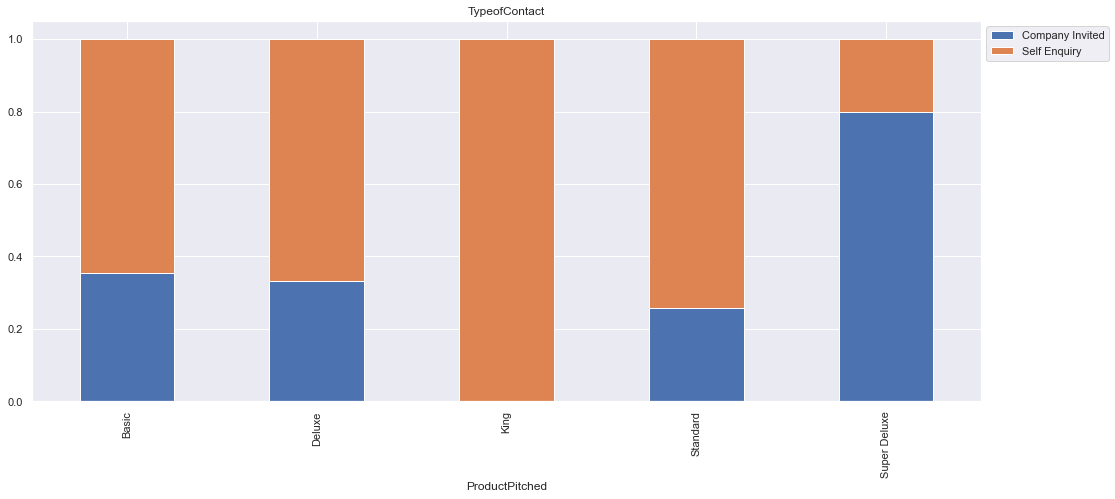

In [102]:
stacked_plot(df['TypeofContact'])

* All customers who took the King package were Self Enquiry customers. 80% of the customers who bought the Super Deluxe package were Company Invited. For the remaining customers who bought packages, about 70% of them were Self Inquiry.

Occupation      Large Business  Salaried  Small Business  All
ProductPitched                                               
Basic                       88       260             204  552
Deluxe                      16        80             108  204
King                         4         4              12   20
Standard                    12        54              58  124
Super Deluxe                 0        16               4   20
All                        120       414             386  920
------------------------------------------------------------------------------------------------------------------------


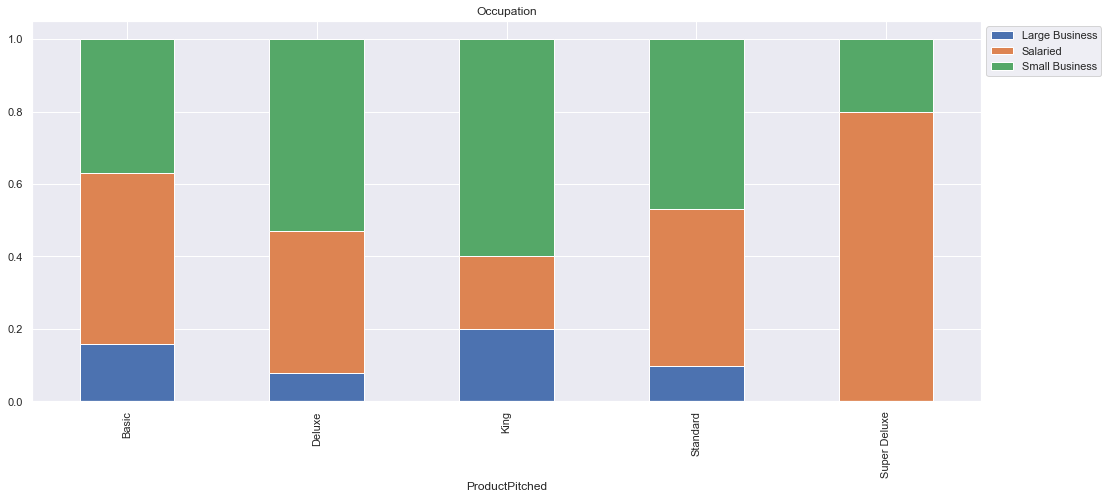

In [103]:
stacked_plot(df['Occupation'])

* Super Deluxe package owners are likely to be Salaried. King package customers are 60% likely to be from a Small Business.

Gender          Female  Male  All
ProductPitched                   
Basic              208   344  552
Deluxe              70   134  204
King                12     8   20
Standard            48    76  124
Super Deluxe         4    16   20
All                342   578  920
------------------------------------------------------------------------------------------------------------------------


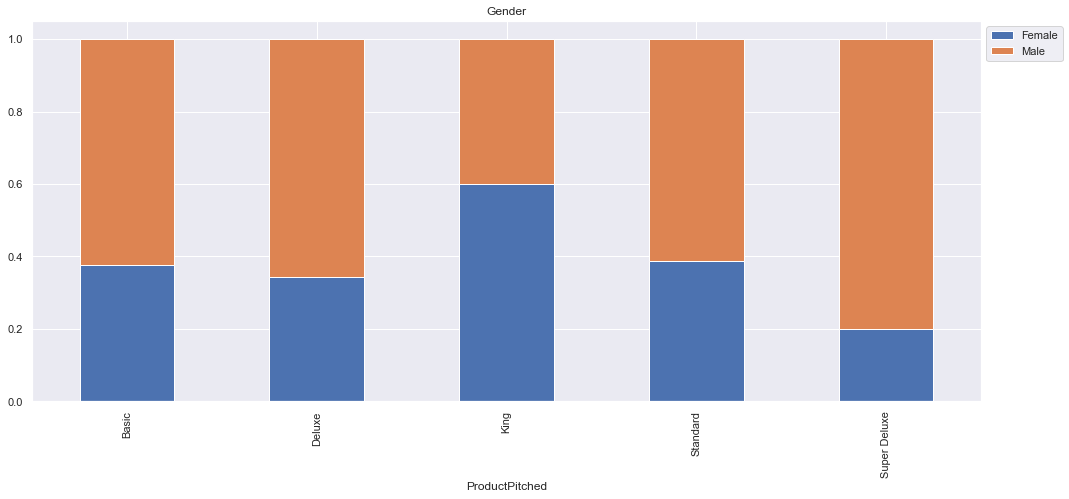

In [104]:
stacked_plot(df['Gender'])

* King customers are slightly more likely to be female (60%), Basic, Deluxe and Standard customers are slightly more likely to be male (60%). Most of the customers who purchased the Super Deluxe package are male (80%).

MaritalStatus   Divorced  Married  Single  Unmarried  All
ProductPitched                                           
Basic                 60      188     230         74  552
Deluxe                32       68      45         59  204
King                   6        6       8          0   20
Standard              26       56      11         31  124
Super Deluxe           0        8      10          2   20
All                  124      326     304        166  920
------------------------------------------------------------------------------------------------------------------------


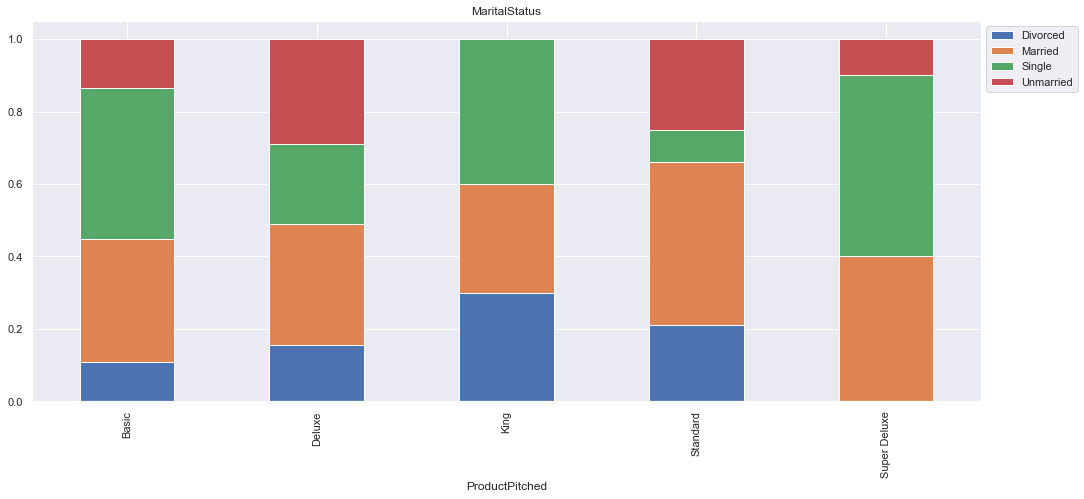

In [105]:
stacked_plot(df['MaritalStatus'])

* None of the King customers are unmarried, the king customers also have the highest proportion of customers who are divorced. Customers who are unmarried are the most likely to purchage the Deluxe or Standard package.

Designation     AVP  Executive  Manager  Senior Manager  VP  All
ProductPitched                                                  
Basic             0        552        0               0   0  552
Deluxe            0          0      204               0   0  204
King              0          0        0               0  20   20
Standard          0          0        0             124   0  124
Super Deluxe     20          0        0               0   0   20
All              20        552      204             124  20  920
------------------------------------------------------------------------------------------------------------------------


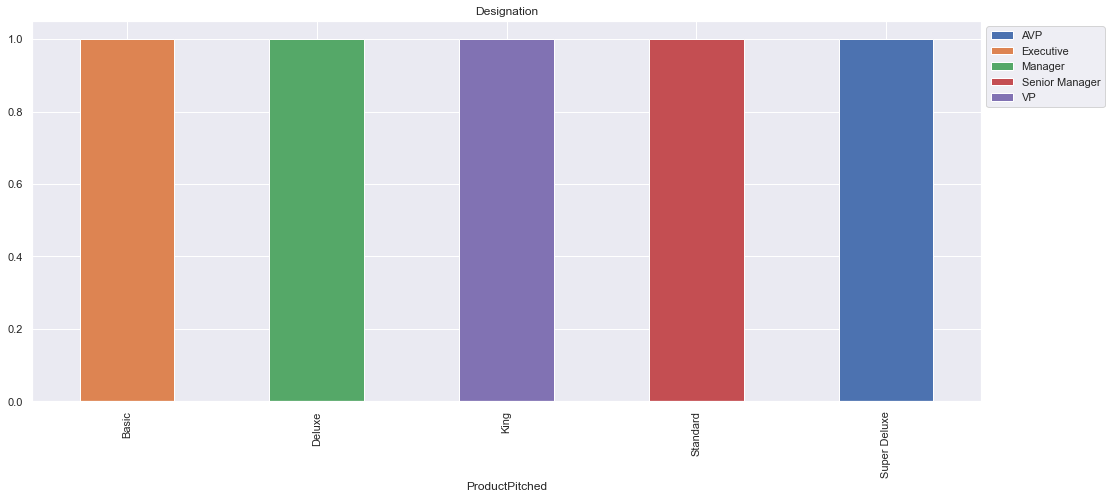

In [106]:
stacked_plot(df['Designation'])

This plot looks a little strange. It says that ALL customers who bought the King package are VPs, ALL customers who bought the Super Deluxe package are AVPs and so on.  
This, to me, indicates that the data are synthetic. Or it could be the case that the sales people at "Visit with us" decided to pitch packages to customers completely based on their Designation. Let's take a look at this:

In [107]:
df.groupby(['Designation','ProductPitched'])['ProdTaken'].value_counts()

Designation     ProductPitched  ProdTaken
AVP             Super Deluxe    0             322
                                1              20
Executive       Basic           0            1290
                                1             552
Manager         Deluxe          0            1528
                                1             204
Senior Manager  Standard        0             618
                                1             124
VP              King            0             210
                                1              20
Name: ProdTaken, dtype: int64

In the table above we are again looking at the entire data set, not just the customers who actually purchased a product. In the first column is the customer Designation, in the second column are the products pitched to each customer. We can see that for each designation, only one product type was pitched per designation. 

On one hand, we could say that the strongest characteristic that decides which customer type purchased which package is Designation. There is 100% agreement between Designation and package purchased. 
On the other hand, given that the sales team only pitched one product type per designation, we could say that it's a rather weak predictor, we don't know if a VP might have bought a Basic package because no VPs in the data set were actually pitched the Basic package.

### Summary Customer Profiles per Package Type

In summary, we could say that Designation is the fastest way to find a customer type. Executives bought the Basic package, Managers bought the Deluxe package, Senior Managers bought the Standard, AVPs bought the Super Deluxe and VPs bought the King package.

However, it is likely that these data are not reliable because no other products were pitched to customers for each designation. With this being the case, we can say as a general rule: As a customers age and montly income increase they are more likley to purchase the packages in this order Basic, Deluxe, Standard, Super Deluxe, King.

For a more detailed breakdown of the customer profiles per package, we can refer to the summary at the beginning of this section and the comments under the various plots above.

# Illustrate the insights based on EDA

We have now performed a detailed EDA relating all the variables to the target variable (ProdTaken). We have looked at the optimum duration for the sales pitch to maximize customer satisfaction and, more importantly, customer conversion rates. Finally, we have done a deep dive into the characteristics of the customers who actually purchased the different product types. Below are the key take aways:
### Customers who purchased a Package
**Of all the customers 18.8% purchased a product, we are looking for features (or feature classes) were the percentage of customers who purchased a product are much higher, or much lower, than this.**
Key variables in deciding if a customer will purchase a product:
* Age: For each age we plotted the percentage of customers who purchased a product. For customers 21 and under the ProdTaken rate was above 55%. The ProdTaken trend then dropped sharply to the age of 40 and then flattened out at about 15%.
* Passport: Only 12% of Customers without a passport purchased a product, whereas 35% of customers with a passport did.
* NumberOfTrips: 50% of customers taking 9 or more trips a year purchased a product. However only 4 customers fall into this category. For customers taking 7 or 8 trips a year the ProdTaken rate was 30%.
* NumberOfPersonVisiting: Of customers visiting 1 or 5, 0% bought a package. However customers who visit with 1 or 5 people only make up about 1% of the data (combined). The vast majority of people (99% of the data) travel with 2,3 or 4 people.
* NumberOfFollowups: As the number of follow ups increased from 1 to 6, the ProdTaken rate increased from 10% to 40%
* MaritalStatus: Single people have a ProdTaken Rate of 33%, Unmarried have a Prodtaken rate of 24%. Both are above average. Compare this to married or divorced customers who purchased a product only 13-14% of the time.
* ProductPitched/Designation: Given that there is an exact correlation between these two features (see note below), they are really the same thing. We will drop Product Pitched in our models. Customers designated Executives are the most likely to have purchased a package at 30%, all other designations are below 16%. 

We expect to see the above variables rate highly in the feature importances of our models.
### Customer Profile Per Package
It appears that the order of the packages is Basic, Deluxe, Standard, Super Deluxe and King, we will refer to this as the “level” of the package. As a general rule, as a customer’s age and monthly income goes up, so does the level of package they purchased.
We also found a perfect correlation between Designation and Package type bought: Executives bought the Basic package, Managers bought the Deluxe package, Senior Managers bought the Standard, AVPs bought the Super Deluxe and VPs bought the King package. However, we also found that per Designation, only one type of package was pitched, so the results are suspect.
For the most detailed breakdown of customer profiles per package type. Refer to the write up in that section.
### Optimal Pitch Length.
We found that the optimal pitch length was 18-21 minutes long. This pitch length gave both the highest CustomerSatisfactionScores of the pitch and lead to the highest percentage of customers going on to purchase a package. Pitches should not be longer than 30 mintues.



# Data Pre-Processing (Part 2) Missing Value Treatment

We have already done some data pre-processing. After looking at the distributions of our variables in our univariate analysis, we were able to deal wtih the most egregeous outliers. Now that we have a better understanding of the relationships between our variables we can deal with missing values.

In [108]:
df.isnull().sum().sort_values(ascending=False) # Let's look at where we have null values again.

DurationOfPitch             251
MonthlyIncome               233
Age                         226
NumberOfTrips               140
NumberOfChildrenVisiting     66
NumberOfFollowups            45
PreferredPropertyStar        26
TypeofContact                25
Gender                        0
CityTier                      0
Occupation                    0
ProductPitched                0
NumberOfPersonVisiting        0
Designation                   0
MaritalStatus                 0
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
ProdTaken                     0
dtype: int64

There are 8 columns that contain missing values. The number of missing values in each column seems to vary. Let's see if missing values tend to cluster on the same row (observation).

In [109]:
# most rows don't have missing values now
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()

0    4128
1     533
2     202
3      25
dtype: int64

Most of the rows have no missing values (4128), or they are just missing 1 value (533). However for the remaining rows, they are either missing 2 or three values. Let's take a closer look at these rows.

In [110]:
# these are missing `Joined` and `Joined year`
df[num_missing == 2].sample(n=5)

ProdTaken   Age    TypeofContact  CityTier  DurationOfPitch  \
373           0   NaN     Self Enquiry         1              6.0   
802           0  33.0  Company Invited         3              NaN   
2189          0   NaN     Self Enquiry         3             10.0   
1120          0   NaN     Self Enquiry         3             22.0   
2136          1   NaN     Self Enquiry         1              9.0   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
373   Small Business    Male                       2                3.0   
802         Salaried  Female                       1                3.0   
2189        Salaried  Female                       2                3.0   
1120        Salaried  Female                       2                3.0   
2136        Salaried  Female                       2                3.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
373           Basic                    4.0       Married            2.0   
802          Deluxe                    4.0      Divorced            1.0   
2189         Deluxe                    3.0        Single            2.0   
1120         Deluxe                    4.0        Single            3.0   
2136         Deluxe                    3.0       Married            1.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
373          0                       3       0                       0.0   
802          0                       4       1                       0.0   
2189         1                       3       1                       1.0   
1120         0                       1       0                       0.0   
2136         1                       5       1                       1.0   

     Designation  MonthlyIncome  
373    Executive            NaN  
802      Manager            NaN  
2189     Manager            NaN  
1120     Manager            NaN  
2136     Manager            NaN

In [111]:
# these are missing `Joined` and `Joined year`
df[num_missing == 3].sample(n=5)

ProdTaken   Age TypeofContact  CityTier  DurationOfPitch  \
1182          0  36.0           NaN         1              NaN   
2194          0  24.0           NaN         1              NaN   
598           1  28.0           NaN         1              NaN   
572           0  29.0           NaN         1              NaN   
622           0  32.0           NaN         3              NaN   

          Occupation  Gender  NumberOfPersonVisiting  NumberOfFollowups  \
1182  Small Business  Female                       2                4.0   
2194  Small Business  Female                       2                4.0   
598   Small Business    Male                       2                3.0   
572   Small Business  Female                       3                3.0   
622         Salaried    Male                       3                3.0   

     ProductPitched  PreferredPropertyStar MaritalStatus  NumberOfTrips  \
1182         Deluxe                    3.0       Married            1.0   
2194         Deluxe                    3.0       Married            2.0   
598           Basic                    3.0        Single            7.0   
572          Deluxe                    3.0      Divorced            5.0   
622          Deluxe                    3.0       Married            3.0   

      Passport  PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  \
1182         0                       5       1                       1.0   
2194         0                       3       0                       0.0   
598          0                       3       0                       0.0   
572          0                       2       1                       0.0   
622          0                       2       0                       0.0   

     Designation  MonthlyIncome  
1182     Manager            NaN  
2194     Manager            NaN  
598    Executive            NaN  
572      Manager            NaN  
622      Manager            NaN

When a row is missing 2 values, the missing values are in MonthlyIncome and EITHER Age or DurationOfPitch.  
When a row is missing 3 values the missing values are always in TypeorContact, DurationOfPitch and Monthly Income.

### Fill Missing Values in PreferredPropertyStar and TypeofContact 

Looking at our correlation heat map, we can see that PreferredPropertyStar and TypeofContact have absolutely no relationship with any of the other variables, so our best course of action is to fill these values with their mode/median values.  

My assuption was that Preferred Property Star might be correlated with age, designation or monthly income. As people get older or have a higher income, they might like to visit fancier hotels. However, this is not supported by the data. For this reason we will fill missing values in the PreferredPropertyStar column with the mode value i.e. 3. 61.2% of customers prefer this property star, so our best assumption is that the missing values also fall into this category. 

TypeofContact is not correlated with any other variable. For this reason we will fill missing values with the mode, "Self Inquiry". 70.5% of customers fall into this class so our best assumption is that the missing values will also fall into this class.

In [112]:
df['PreferredPropertyStar'].fillna(3, inplace=True)
df['TypeofContact'].fillna('Self Enquiry', inplace=True)

### Fill Missing Values in Number of Follow ups

The correlation heat map says that number of follow ups has a 0.3 correlation with Number of Person Visiting. Let's check this out and see if we can use the relationship to help fill values.

<AxesSubplot:xlabel='NumberOfPersonVisiting', ylabel='NumberOfFollowups'>

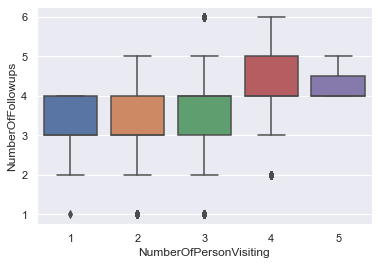

In [113]:
sns.boxplot(data=df, y='NumberOfFollowups', x="NumberOfPersonVisiting")

In [114]:
df.groupby('NumberOfPersonVisiting')['NumberOfFollowups'].median()

NumberOfPersonVisiting
1    3.0
2    3.0
3    4.0
4    4.0
5    4.0
Name: NumberOfFollowups, dtype: float64

It looks like there is some relationship. As the NumberOfPersonVisiting goes up, the median NumberOfFollowups also goes up. So we, **could** use the relationship in the table above to fill our missing NumberOfFollowups values, but **should** we? Our real world experience tells us that there is no reason to believe that the number of people a customer wants to travel with should have any effect on the number of times a sales person follows up on them. It's likely that any correlation between these two variables is just pure chance, and strengthening this relationship would not make out data better. So, in this case, we will be filling missing values in NumberOfFollowups with it's mode value of 4.

In [115]:
df['NumberOfFollowups'].fillna(4, inplace=True)

### Fill Missing Values in NumberOfChildrenVisiting

We know from our correlation heatmap that there is a 0.6 correlation between NumberOfChildrenVisiting and NumberOfPersonVisiting. Unlike the relationship between NumberOfFollowups and NumberOfPersonVisiting, which I believe to be pure chance, we do expect there to be a relationship between NumberOfChildrenVisiting and NumberOfPersonVisiting: Given that children are people, if someone is travelling with more children, they are travelling wtih more people. Let's use this relationship to fill missing values in the NumberOfChildrenVisiting column.

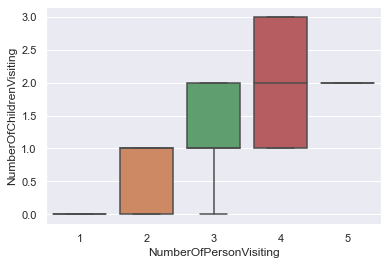

In [116]:
sns.boxplot(data=df, y='NumberOfChildrenVisiting', x="NumberOfPersonVisiting");

As the number of person visiting goes up, so does the median number of children visiting

In [117]:
df.groupby('NumberOfPersonVisiting')['NumberOfChildrenVisiting'].median()

NumberOfPersonVisiting
1    0.0
2    1.0
3    1.0
4    2.0
5    2.0
Name: NumberOfChildrenVisiting, dtype: float64

We can see that as the number of person visiting values goes up, so does the median number of children visiting. Let's use this relationship to fill our missing values.

In [118]:
# Impute missing NumberOfChildrenVisiting using relationship with NumberOfPersonVisiting
df["NumberOfChildrenVisiting"] = df.groupby(["NumberOfPersonVisiting"])["NumberOfChildrenVisiting"].transform(
    lambda x: x.fillna(x.median()))

### Fill Missing Values in NumberOfTrips

Our correlation heatmap shows that there is a 0.5 correlation between NumberOfTrips and Age. It is reasonable to think that as a person gets older that they will travel more, either because they can afford to travel more or they will need to travel more for work. So let's use the relationship between NumberOfTrips and Age to fill missing values in NumberOfTrips

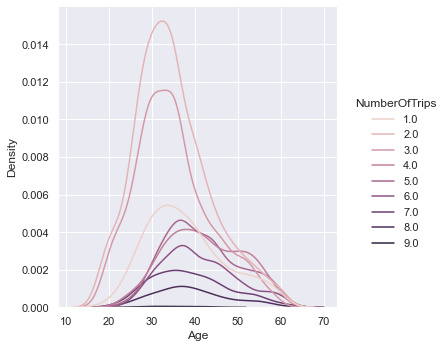

In [119]:
sns.displot(data=df, x='Age', hue='NumberOfTrips', kind='kde')

We can see that as Age increases, the Number of Trips also tends to increase. So let's fill missing values in NumberOfTrips using the median number of trips for a given age.

In [120]:
# Let's create a data frame with Age as the index and median number of trips a column
trips_per_age = pd.DataFrame(df.groupby('Age')['NumberOfTrips'].median())
trips_per_age

NumberOfTrips
Age                
18.0            2.0
19.0            2.0
20.0            2.0
21.0            2.0
22.0            3.0
23.0            3.0
24.0            2.0
25.0            2.0
26.0            2.0
27.0            2.0
28.0            2.0
29.0            3.0
30.0            3.0
31.0            2.0
32.0            3.0
33.0            3.0
34.0            2.0
35.0            3.0
36.0            3.0
37.0            3.0
38.0            3.0
39.0            3.0
40.0            2.0
41.0            3.0
42.0            3.0
43.0            4.0
44.0            4.0
45.0            4.0
46.0            3.0
47.0            4.0
48.0            3.0
49.0            3.0
50.0            4.0
51.0            4.0
52.0            3.0
53.0            3.5
54.0            4.0
55.0            4.0
56.0            5.0
57.0            4.0
58.0            3.0
59.0            4.0
60.0            5.0
61.0            5.0

In [121]:
# Now to replace the missing values in NumberOfTrips.

# The for loop will go through every line of the data frame and look in column 12 (NumberOfTrips)
# If the NumberOfTrips is null then it will look in column 1 and get the Age
# The Age is the index of our trips_per_year data frame so the loop looks for the Age in the index
# Then takes the value from column zero, which is the median trips per year for each Age

for i in range(0,4888):
    if pd.isnull(df.iloc[i,12]):
        df.iloc[i,12] = trips_per_age.loc[df.iloc[i,1]][0]


In [122]:
df[df['NumberOfTrips'].isna()] # There are no missing values remaining in NumberOfTrips.

Empty DataFrame
Columns: [ProdTaken, Age, TypeofContact, CityTier, DurationOfPitch, Occupation, Gender, NumberOfPersonVisiting, NumberOfFollowups, ProductPitched, PreferredPropertyStar, MaritalStatus, NumberOfTrips, Passport, PitchSatisfactionScore, OwnCar, NumberOfChildrenVisiting, Designation, MonthlyIncome]
Index: []

### Fill Missing Values in Duration Of Pitch

We know that there is some relationship between the Duration Of Pitch and the PitchSatisfactionScore. So let's replace missing values in Duration of Pitch based on this relationship.

In [123]:
df.groupby('PitchSatisfactionScore')['DurationOfPitch'].median()

PitchSatisfactionScore
1    13.5
2    12.0
3    14.0
4    13.0
5    13.0
Name: DurationOfPitch, dtype: float64

In [124]:
# Impute missing DurationOfPitch using relationship with PitchSatisfactionScore
df["DurationOfPitch"] = df.groupby(["PitchSatisfactionScore"])["DurationOfPitch"].transform(
    lambda x: x.fillna(x.median()))

#This is to replace the 13.5 values from the median score with 13 to maintain consistency
df["DurationOfPitch"] = df["DurationOfPitch"].replace(13.5,13) 

### Replace Missing Values in Age

We know from our correlation heat plot that Age is correlated with MonthlyIncome. However, from our look at patterns of missingness above, we know that there are rows were both the MonthlyIncome and the Age are null. So we can't fully fill our Age column using predictions from our MonthlyIncome column.  
Probably the best predictor of Age that we do have is Designation. As people get older, they tend to get promoted to higher positions. So we will use the median age of each Designation to fill the missing Age values.

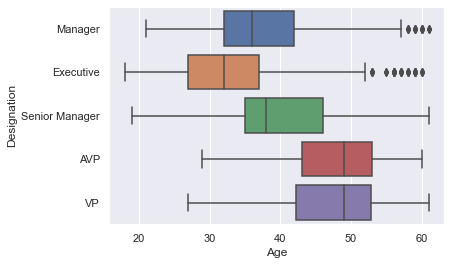

In [125]:
sns.boxplot(data=df, x='Age', y='Designation');

People with different designations have a different median age

In [126]:
df.groupby('Designation')['Age'].median()

Designation
AVP               49.0
Executive         32.0
Manager           36.0
Senior Manager    38.0
VP                49.0
Name: Age, dtype: float64

In [127]:
# Impute missing Age using relationship with Designation
df["Age"] = df.groupby(["Designation"])["Age"].transform(
    lambda x: x.fillna(x.median()))

### Replace Missing Values in Monthly Income

Again, we expect that someones Monthly Income will change as their Designation changes. Let's again use Designation to help fill our missing values, this time in Monthly Income

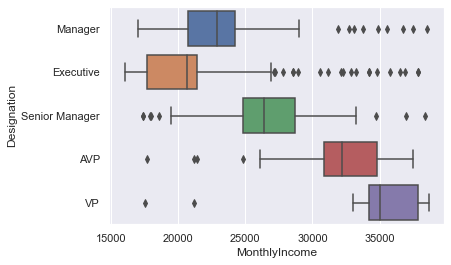

In [128]:
sns.boxplot(data=df, x='MonthlyIncome', y='Designation');

As designation increases from executive to VP, so does monthly income

In [129]:
df.groupby('Designation')['MonthlyIncome'].median()

Designation
AVP               32181.0
Executive         20689.0
Manager           22922.0
Senior Manager    26425.0
VP                34999.0
Name: MonthlyIncome, dtype: float64

In [130]:
# Impute missing MonthlyIncome using relationship with Designation
df["MonthlyIncome"] = df.groupby(["Designation"])["MonthlyIncome"].transform(
    lambda x: x.fillna(x.median()))

In [131]:
df.isna().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

There are now no missing values in our data frame.

# Data Pre-processing (Part 3) Prepare Data For Modelling

### Encoding Variables

We have dealt with outliers, imputed missing values, now we will do the final preparation of the data before to make it suitable for ML algorithms.

In [132]:
df_original = df.copy() # Make a copy of the database before we change anything

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4888 non-null   float64
 2   TypeofContact             4888 non-null   object 
 3   CityTier                  4888 non-null   int64  
 4   DurationOfPitch           4888 non-null   float64
 5   Occupation                4888 non-null   object 
 6   Gender                    4888 non-null   object 
 7   NumberOfPersonVisiting    4888 non-null   int64  
 8   NumberOfFollowups         4888 non-null   float64
 9   ProductPitched            4888 non-null   object 
 10  PreferredPropertyStar     4888 non-null   float64
 11  MaritalStatus             4888 non-null   object 
 12  NumberOfTrips             4888 non-null   float64
 13  Passport                  4888 non-null   int64  
 14  PitchSat

There are a number of non-numeric columns, type='object' that we will need to either value-encode or one-hot-encode before we can input the data into models. Let's do that now. Using the following set of rules:

#### Variables we can simply impute as 1's and 0's

* Type of Contact:
 - self enquire = 1
 - company invited = 0
 
* Gender:
 - Male = 1
 - Female = 0
 
#### Variables that we will label encode

* Product Pitched:
 - Basic = 1
 - Deluxe = 2
 - Standard = 3
 - Super Deluxe = 4
 - King = 5
 
* Designation:
 - Executive = 1
 - Manager = 2
 - Senior Manager = 3
 - AVP = 4
 - VP = 5

The product pitched and designation order is based on our observations in the EDA. Both variables increase in our label encoded versions as age and monthly income increases. **Note that after the label encoding, ProductPitched and Designation perfectly correlate. We saw this in our EDA only one product type was pitched per designation. For this reason we will drop the ProductPitched variable before we begin modelling**

#### Variables that we will One-Hot-Encode
Occupation and Marital Status will be one-hot-encoded. Note that because we will NOT be using using drop_first = True because we intend to use AdaBoosting, where the default estimator is a decision tree of depth = 1. In which case the tree will never reach the required depth to split on all classes in the encoded variable.


In [134]:
# Replace values in columns with numeric labels
df['TypeofContact'].replace({'Self Enquiry':1,'Company Invited':0}, inplace = True)
df['Gender'].replace({'Male':1,'Female':0}, inplace = True)
df['ProductPitched'].replace({'Basic':1,'Deluxe':2,'Standard':3,'Super Deluxe':4,'King':5}, inplace = True)
df['Designation'].replace({'Executive':1,'Manager':2,'Senior Manager':3,'AVP':4,'VP':5}, inplace = True)

In [135]:
# One Hot Encode the Occupation and Marital Status Columns
cols_to_encode = ['MaritalStatus','Occupation']
df = pd.get_dummies(df, columns=cols_to_encode)
df.head()

ProdTaken   Age  TypeofContact  CityTier  DurationOfPitch  Gender  \
0          1  41.0              1         3              6.0       0   
1          0  49.0              0         1             14.0       1   
2          1  37.0              1         1              8.0       1   
3          0  33.0              0         1              9.0       0   
4          0  32.0              1         1              8.0       1   

   NumberOfPersonVisiting  NumberOfFollowups  ProductPitched  \
0                       3                3.0               2   
1                       3                4.0               2   
2                       3                4.0               1   
3                       2                3.0               1   
4                       2                3.0               1   

   PreferredPropertyStar  NumberOfTrips  Passport  PitchSatisfactionScore  \
0                    3.0            1.0         1                       2   
1                    4.0            2.0         0                       3   
2                    3.0            7.0         1                       3   
3                    3.0            2.0         1                       5   
4                    4.0            1.0         0                       5   

   OwnCar  NumberOfChildrenVisiting  Designation  MonthlyIncome  \
0       1                       0.0            2        20993.0   
1       1                       2.0            2        20130.0   
2       0                       0.0            1        17090.0   
3       1                       1.0            1        17909.0   
4       1                       0.0            1        18468.0   

   MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
0                       0                      0                     1   
1                       1                      0                     0   
2                       0                      0                     1   
3                       1                      0                     0   
4                       1                      0                     0   

   MaritalStatus_Unmarried  Occupation_Large Business  Occupation_Salaried  \
0                        0                          0                    1   
1                        0                          0                    1   
2                        0                          0                    0   
3                        0                          0                    1   
4                        0                          0                    0   

   Occupation_Small Business  
0                          0  
1                          0  
2                          1  
3                          0  
4                          1

In [136]:
df.info() # All columns are now numerical

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ProdTaken                  4888 non-null   int64  
 1   Age                        4888 non-null   float64
 2   TypeofContact              4888 non-null   int64  
 3   CityTier                   4888 non-null   int64  
 4   DurationOfPitch            4888 non-null   float64
 5   Gender                     4888 non-null   int64  
 6   NumberOfPersonVisiting     4888 non-null   int64  
 7   NumberOfFollowups          4888 non-null   float64
 8   ProductPitched             4888 non-null   int64  
 9   PreferredPropertyStar      4888 non-null   float64
 10  NumberOfTrips              4888 non-null   float64
 11  Passport                   4888 non-null   int64  
 12  PitchSatisfactionScore     4888 non-null   int64  
 13  OwnCar                     4888 non-null   int64

### Scaling Variables

In [137]:
df.describe().T

count          mean          std      min  \
ProdTaken                  4888.0      0.188216     0.390925      0.0   
Age                        4888.0     37.429828     9.149822     18.0   
TypeofContact              4888.0      0.709697     0.453948      0.0   
CityTier                   4888.0      1.654255     0.916583      1.0   
DurationOfPitch            4888.0     15.338789     8.016212      5.0   
Gender                     4888.0      0.596563     0.490637      0.0   
NumberOfPersonVisiting     4888.0      2.905074     0.724891      1.0   
NumberOfFollowups          4888.0      3.711129     0.998271      1.0   
ProductPitched             4888.0      2.056056     1.108651      1.0   
PreferredPropertyStar      4888.0      3.577946     0.797005      3.0   
NumberOfTrips              4888.0      3.239566     1.767165      1.0   
Passport                   4888.0      0.290917     0.454232      0.0   
PitchSatisfactionScore     4888.0      3.078151     1.365792      1.0   
OwnCar                     4888.0      0.620295     0.485363      0.0   
NumberOfChildrenVisiting   4888.0      1.188011     0.853527      0.0   
Designation                4888.0      2.056056     1.108651      1.0   
MonthlyIncome              4888.0  23523.903232  5035.874688  16009.0   
MaritalStatus_Divorced     4888.0      0.194354     0.395743      0.0   
MaritalStatus_Married      4888.0      0.478723     0.499598      0.0   
MaritalStatus_Single       4888.0      0.187398     0.390270      0.0   
MaritalStatus_Unmarried    4888.0      0.139525     0.346529      0.0   
Occupation_Large Business  4888.0      0.088789     0.284468      0.0   
Occupation_Salaried        4888.0      0.484452     0.499809      0.0   
Occupation_Small Business  4888.0      0.426759     0.494657      0.0   

                                25%      50%       75%      max  
ProdTaken                      0.00      0.0      0.00      1.0  
Age                           31.00     36.0     43.00     61.0  
TypeofContact                  0.00      1.0      1.00      1.0  
CityTier                       1.00      1.0      3.00      3.0  
DurationOfPitch                9.00     13.0     19.00     37.0  
Gender                         0.00      1.0      1.00      1.0  
NumberOfPersonVisiting         2.00      3.0      3.00      5.0  
NumberOfFollowups              3.00      4.0      4.00      6.0  
ProductPitched                 1.00      2.0      3.00      5.0  
PreferredPropertyStar          3.00      3.0      4.00      5.0  
NumberOfTrips                  2.00      3.0      4.00      9.0  
Passport                       0.00      0.0      1.00      1.0  
PitchSatisfactionScore         2.00      3.0      4.00      5.0  
OwnCar                         0.00      1.0      1.00      1.0  
NumberOfChildrenVisiting       1.00      1.0      2.00      3.0  
Designation                    1.00      2.0      3.00      5.0  
MonthlyIncome              20486.75  22413.5  25407.75  38677.0  
MaritalStatus_Divorced         0.00      0.0      0.00      1.0  
MaritalStatus_Married          0.00      0.0      1.00      1.0  
MaritalStatus_Single           0.00      0.0      0.00      1.0  
MaritalStatus_Unmarried        0.00      0.0      0.00      1.0  
Occupation_Large Business      0.00      0.0      0.00      1.0  
Occupation_Salaried            0.00      0.0      1.00      1.0  
Occupation_Small Business      0.00      0.0      1.00      1.0

We can see from the statistics above that almost all of our variables have similar scales. However, there are a few variables which have ranges quite different to the others. Namely: Age, DurationOfPitch and Monthly Income. Let's take a look at the distributions of these variables again, now that the zeros have been filled and the most egregeous outliers have been treated.

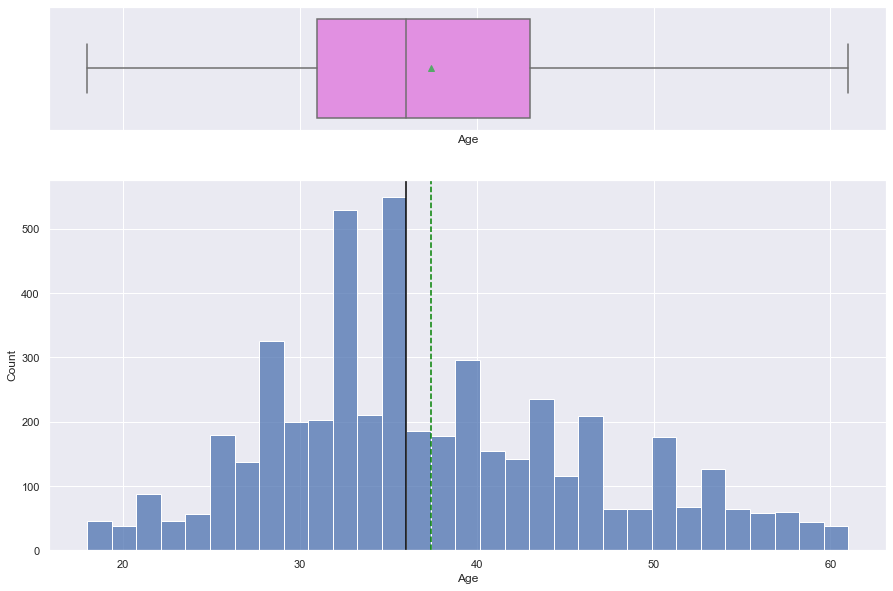

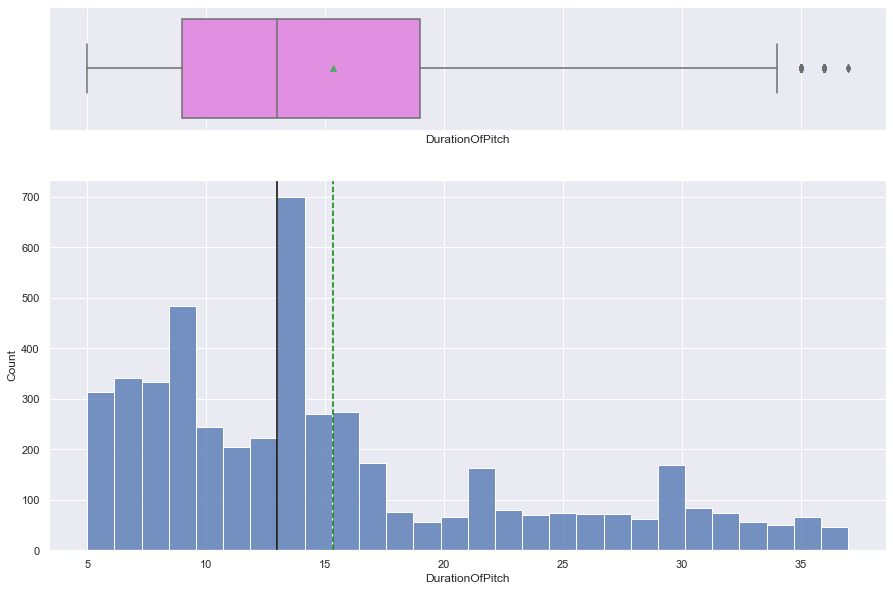

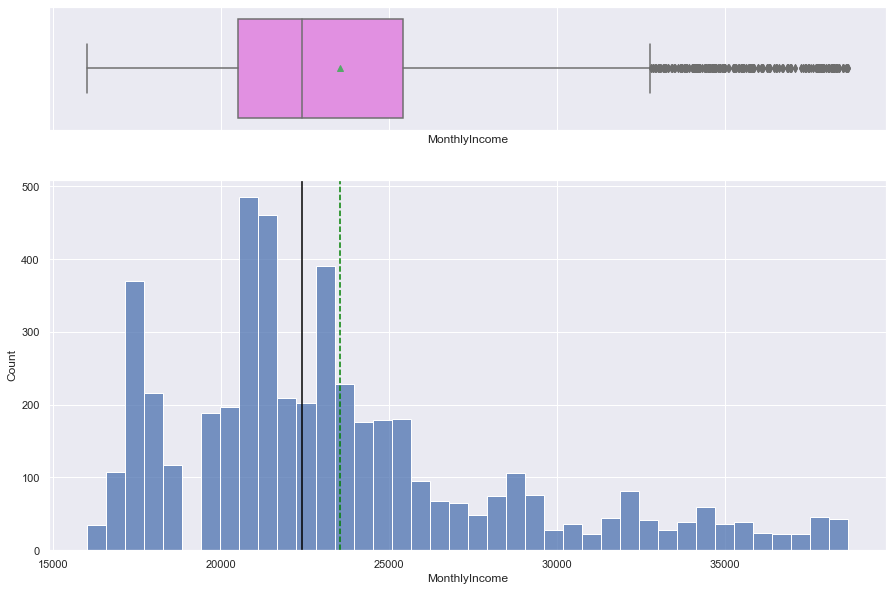

In [138]:
cols_to_plot = ['Age','DurationOfPitch','MonthlyIncome']
for col in cols_to_plot:
    histogram_boxplot(df[col])


All of the variables have a slight right skew. Let's see what happens if we apply a log transform on the distributions.

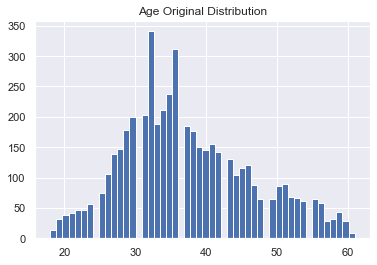

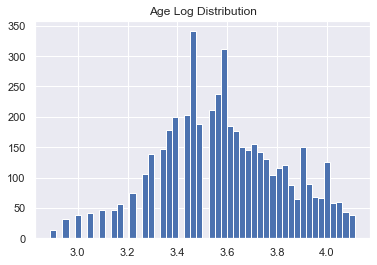

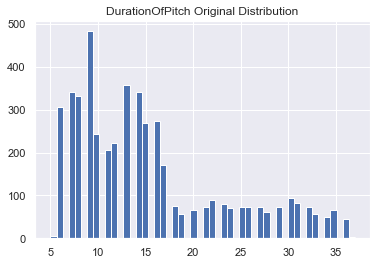

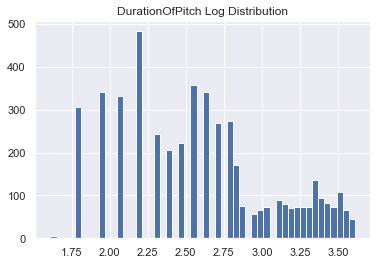

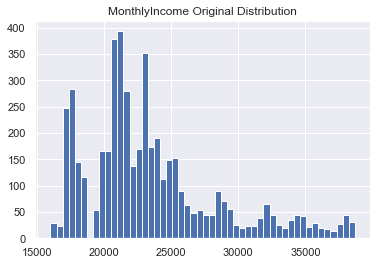

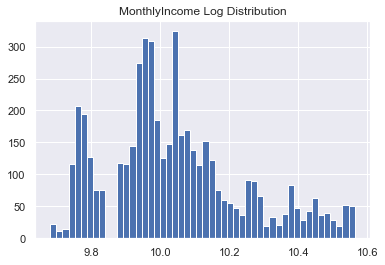

In [139]:
cols_to_log = ['Age','DurationOfPitch','MonthlyIncome']
for colname in cols_to_log:
    #sns.displot(df[colname], kind='kde')
    plt.hist(df[colname], bins=50) #plot before a log transform
    plt.title(f'{colname} Original Distribution')
    plt.show()
    #sns.displot(np.log(df[colname]), kind='kde')
    plt.hist(np.log(df[colname]), bins=50) #plot after a log transform
    plt.title(f'{colname} Log Distribution')
    plt.show()

* Age is already fairly normally distributed, so the log transformaton really just changes the weight of the distribution from the left to the right. We will apply a different type of scalar to this column. 
* For DurationOfPitch and MonthlyIncome, the distribution becomes more normally distributed and the scale is reduced to numbers more in line with the rest of our variables. So we will apply log transforms to these variables.

In [140]:
df['DurationOfPitch_Scaled'] = np.log(df['DurationOfPitch'])
df['MonthlyIncome_Scaled'] = np.log(df['MonthlyIncome'])

Let's look at a standard scalar for the Age Variable:

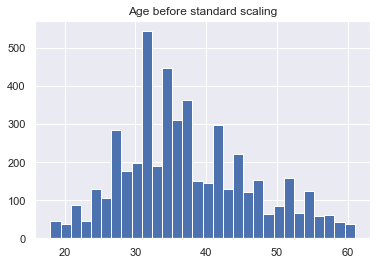

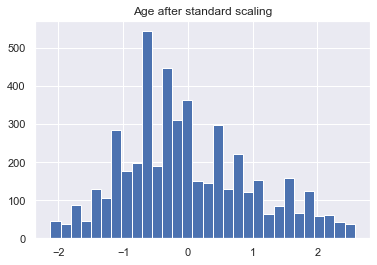

In [141]:
# replacing with scaled 
df['Age'].hist(bins=30)
plt.title('Age before standard scaling')
plt.show()

df['Age_Scaled'] = StandardScaler().fit_transform(
    df[['Age']]
)

df['Age_Scaled'].hist(bins=30)
plt.title('Age after standard scaling')
plt.show()

As expected, the distribution has not changed but the scale of the variable is now closer to the other variables.  

Now let's take another look at our distributions after scaling:

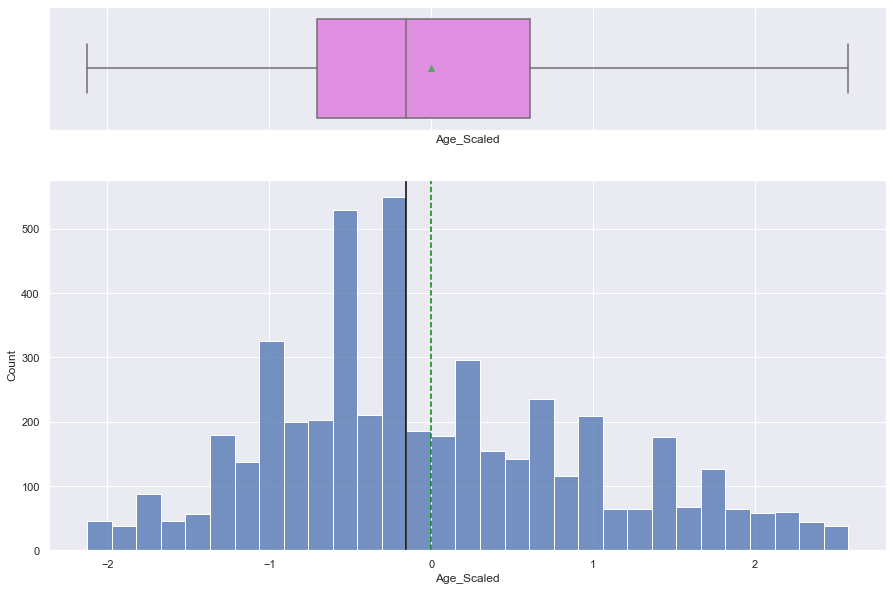

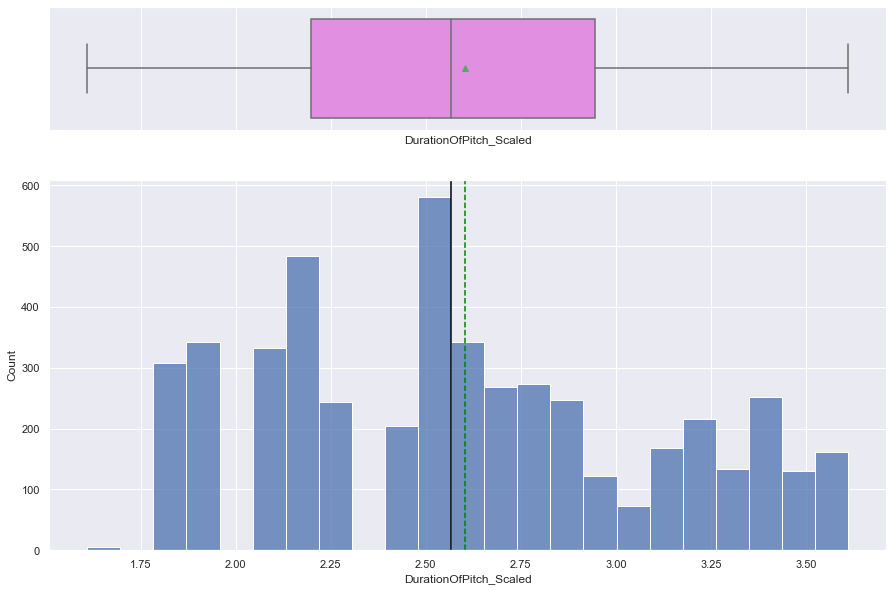

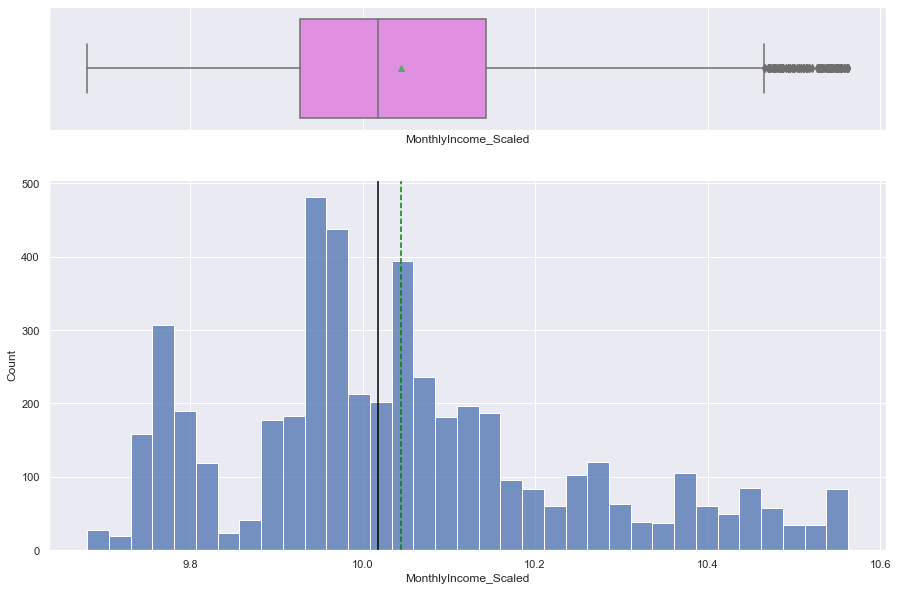

In [142]:
cols_to_plot = ['Age_Scaled','DurationOfPitch_Scaled','MonthlyIncome_Scaled']
for col in cols_to_plot:
    histogram_boxplot(df[col])


There are still some outliers in the MonthlyIncome_Scaled. However the data are much more normally distributed and the range on the scales are much more in line with the other variables.

In [143]:
df.describe().T

count          mean          std           min  \
ProdTaken                  4888.0  1.882160e-01     0.390925      0.000000   
Age                        4888.0  3.742983e+01     9.149822     18.000000   
TypeofContact              4888.0  7.096972e-01     0.453948      0.000000   
CityTier                   4888.0  1.654255e+00     0.916583      1.000000   
DurationOfPitch            4888.0  1.533879e+01     8.016212      5.000000   
Gender                     4888.0  5.965630e-01     0.490637      0.000000   
NumberOfPersonVisiting     4888.0  2.905074e+00     0.724891      1.000000   
NumberOfFollowups          4888.0  3.711129e+00     0.998271      1.000000   
ProductPitched             4888.0  2.056056e+00     1.108651      1.000000   
PreferredPropertyStar      4888.0  3.577946e+00     0.797005      3.000000   
NumberOfTrips              4888.0  3.239566e+00     1.767165      1.000000   
Passport                   4888.0  2.909165e-01     0.454232      0.000000   
PitchSatisfactionScore     4888.0  3.078151e+00     1.365792      1.000000   
OwnCar                     4888.0  6.202946e-01     0.485363      0.000000   
NumberOfChildrenVisiting   4888.0  1.188011e+00     0.853527      0.000000   
Designation                4888.0  2.056056e+00     1.108651      1.000000   
MonthlyIncome              4888.0  2.352390e+04  5035.874688  16009.000000   
MaritalStatus_Divorced     4888.0  1.943535e-01     0.395743      0.000000   
MaritalStatus_Married      4888.0  4.787234e-01     0.499598      0.000000   
MaritalStatus_Single       4888.0  1.873977e-01     0.390270      0.000000   
MaritalStatus_Unmarried    4888.0  1.395254e-01     0.346529      0.000000   
Occupation_Large Business  4888.0  8.878887e-02     0.284468      0.000000   
Occupation_Salaried        4888.0  4.844517e-01     0.499809      0.000000   
Occupation_Small Business  4888.0  4.267594e-01     0.494657      0.000000   
DurationOfPitch_Scaled     4888.0  2.603542e+00     0.499441      1.609438   
MonthlyIncome_Scaled       4888.0  1.004492e+01     0.200124      9.680906   
Age_Scaled                 4888.0 -7.290381e-17     1.000102     -2.123737   

                                    25%           50%           75%  \
ProdTaken                      0.000000      0.000000      0.000000   
Age                           31.000000     36.000000     43.000000   
TypeofContact                  0.000000      1.000000      1.000000   
CityTier                       1.000000      1.000000      3.000000   
DurationOfPitch                9.000000     13.000000     19.000000   
Gender                         0.000000      1.000000      1.000000   
NumberOfPersonVisiting         2.000000      3.000000      3.000000   
NumberOfFollowups              3.000000      4.000000      4.000000   
ProductPitched                 1.000000      2.000000      3.000000   
PreferredPropertyStar          3.000000      3.000000      4.000000   
NumberOfTrips                  2.000000      3.000000      4.000000   
Passport                       0.000000      0.000000      1.000000   
PitchSatisfactionScore         2.000000      3.000000      4.000000   
OwnCar                         0.000000      1.000000      1.000000   
NumberOfChildrenVisiting       1.000000      1.000000      2.000000   
Designation                    1.000000      2.000000      3.000000   
MonthlyIncome              20486.750000  22413.500000  25407.750000   
MaritalStatus_Divorced         0.000000      0.000000      0.000000   
MaritalStatus_Married          0.000000      0.000000      1.000000   
MaritalStatus_Single           0.000000      0.000000      0.000000   
MaritalStatus_Unmarried        0.000000      0.000000      0.000000   
Occupation_Large Business      0.000000      0.000000      0.000000   
Occupation_Salaried            0.000000      0.000000      1.000000   
Occupation_Small Business      0.000000      0.000000      1.000000   
DurationOfPitch_Scaled         2.197225      2.564949      2.944439 

We now have scaled versions of the variables with had ranges that differed greatly from the other variables. We will begin our testing using these scaled variants under the assumption that ML models work better with variables of similar scales that are normally distributed. We can always test the unscaled variables later in some of our more successful models.

All of our other variables have been encoded so that they are numerical.  

At this point we will make a copy of the data frame, drop the unnecessary columns and then split the data.  

**We will be dropping the "ProductPitched" Variable as it exactly correlates with the "Designation" Variable.**

# Split Data

In [144]:
df_conditioned = df.copy() #Copy the data frame

In [145]:
df.drop(['Age','DurationOfPitch','MonthlyIncome', 'ProductPitched'], axis=1, inplace = True) # Drop the unscaled columns and ProductPitched

In [146]:
y = df['ProdTaken']   # Split the data into dependent and independent variables
X = df.drop('ProdTaken', axis=1)

In [147]:
# Let's split the data into a train and test sets. 
# I will use the stratify parameter to maintain the ratio of classes in the dependant variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_train.head()

TypeofContact  CityTier  Gender  NumberOfPersonVisiting  \
3234              1         1       1                       3   
657               1         1       0                       3   
150               0         1       0                       2   
2745              1         3       0                       4   
2567              1         1       1                       3   

      NumberOfFollowups  PreferredPropertyStar  NumberOfTrips  Passport  \
3234                5.0                    3.0            6.0         0   
657                 4.0                    3.0            7.0         0   
150                 3.0                    4.0            2.0         0   
2745                5.0                    3.0            3.0         0   
2567                4.0                    3.0            3.0         0   

      PitchSatisfactionScore  OwnCar  NumberOfChildrenVisiting  Designation  \
3234                       3       0                       1.0            3   
657                        5       1                       0.0            1   
150                        2       1                       0.0            2   
2745                       2       1                       3.0            1   
2567                       5       1                       1.0            5   

      MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
3234                       0                      1                     0   
657                        0                      1                     0   
150                        0                      1                     0   
2745                       0                      0                     1   
2567                       0                      0                     1   

      MaritalStatus_Unmarried  Occupation_Large Business  Occupation_Salaried  \
3234                        0                          0                    1   
657                         0                          0                    0   
150                         0                          0                    0   
2745                        0                          0                    0   
2567                        0                          0                    1   

      Occupation_Small Business  DurationOfPitch_Scaled  MonthlyIncome_Scaled  \
3234                          0                2.484907             10.158013   
657                           1                2.564949              9.771783   
150                           1                3.465736              9.933289   
2745                          1                2.484907              9.897369   
2567                          0                2.564949             10.550983   

      Age_Scaled  
3234   -0.374890  
657    -0.921405  
150     0.280927  
2745   -2.014434  
2567    1.592562

#### Test Data Split

In [148]:
print("{0:0.2f}% data is in training set".format((len(X_train)/len(df.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(X_test)/len(df.index)) * 100))

69.99% data is in training set
30.01% data is in test set


In [149]:
print("Original ProdTaken 1 Values    : {0} ({1:0.2f}%)".format(len(df.loc[df['ProdTaken'] == 1]), (len(df.loc[df['ProdTaken'] == 1])/len(df.index)) * 100))
print("Original ProdTaken 0 Values   : {0} ({1:0.2f}%)".format(len(df.loc[df['ProdTaken'] == 0]), (len(df.loc[df['ProdTaken'] == 0])/len(df.index)) * 100))
print("")
print("Training ProdTaken 1 Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training ProdTaken 0 Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test ProdTaken 1 Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test ProdTaken 0 Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original ProdTaken 1 Values    : 920 (18.82%)
Original ProdTaken 0 Values   : 3968 (81.18%)

Training ProdTaken 1 Values    : 644 (18.82%)
Training ProdTaken 0 Values   : 2777 (81.18%)

Test ProdTaken 1 Values        : 276 (18.81%)
Test ProdTaken 0 Values       : 1191 (81.19%)



The data have been split with 70% of the data in the training set and 30% of the data in the test set. The balance of the classes in our target variable, found in our original data frame, has been maintained in the training and testing data.

# -----------------------------------------------------------------------------------------------------------

# Model Building - Prep Work

## Metric for Evaluation

* Our target variable is ProdTaken. We are working on the assumption that the types of customers who have bought a product in the past (ProdTaken class = 1), are the types of customers that will purchase a product in the future. 
* This is a generalization. We have seen, in our EDA, that different types of customers purchased different packages. As we have no data for the new package type, "Wellness Tourism Package". We will need to make use of our generalization.
* The objective is to, "Predict which customer is more likely to purchase the newly introduced travel package. This would indicate that we want our model to be accurate. I.e. Accuracy is our evaluation metric.
* However, given that only 18.8% of customers purchased a package we could create a model that predicts no-one will purchase a package and achieve 81.2% accuracy. Obviously this is not useful.
* In the Background and Context, it is stated, "The cost of marketing was quite high because customers were contacted at random". Obviously we want to avoid this. We don't want to waste money and time marketing to customers who will not buy a product (i.e. we want to minimize false positives, so we want high precision). We also don't want to miss the opportunity cost of missing a customer who might have bought a product (so we also want to minimize false negatives, i.e. we want high recall).
* The metric which balances both precision and recall is the **F1-Score**. *THIS* is the metric that we will attempt to maximize. In the case that two models have the same (or similar) F1-Scores, we will favor the model with the higher recall, as opportunity cost of missing a customer is likely higher than the cost of marketing.


Below we will write some code to get our classification metrics and create a confusion matrix.

In [150]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [151]:
def make_confusion_matrix(model,test_X,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(test_X)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# -------------------------------------------------------------------------------------------------------------

# Model Building - Bagging

In this section we will build a bagging classifier, random forest and decision tree. Given that all the models we will create in this project will have a decision tree as a base classifier, let's first create a decision tree model as a baseline.

## Initial Decision Tree

In [152]:
# initialize the DecisionTreeClassifier. We don't need any special hyperparameters just yet.
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1) 
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [153]:
scores = get_metrics_score(dTree,X_train,X_test,y_train,y_test,flag=True)

Accuracy on training set :  1.0
Accuracy on test set :  0.8861622358554874
Recall on training set :  1.0
Recall on test set :  0.677536231884058
Precision on training set :  1.0
Precision on test set :  0.7056603773584905
F1 on training set :  1.0
F1 on test set :  0.6913123844731978


As expected, an unpruned decision tree hopelessly overfits the training data and does not generalize well. Let's take a look at the feature importances of an unpruned tree and see if they change as we run different models.

                                Imp
DurationOfPitch_Scaled     0.130879
Age_Scaled                 0.125610
MonthlyIncome_Scaled       0.116239
Designation                0.095369
PitchSatisfactionScore     0.061695
NumberOfTrips              0.061523
Passport                   0.059067
NumberOfFollowups          0.058143
CityTier                   0.057756
TypeofContact              0.035604
MaritalStatus_Single       0.033848
PreferredPropertyStar      0.024710
NumberOfPersonVisiting     0.022359
Gender                     0.020581
Occupation_Small Business  0.018695
MaritalStatus_Divorced     0.016959
Occupation_Large Business  0.013162
MaritalStatus_Married      0.012813
MaritalStatus_Unmarried    0.011628
NumberOfChildrenVisiting   0.008973
OwnCar                     0.008143
Occupation_Salaried        0.006244


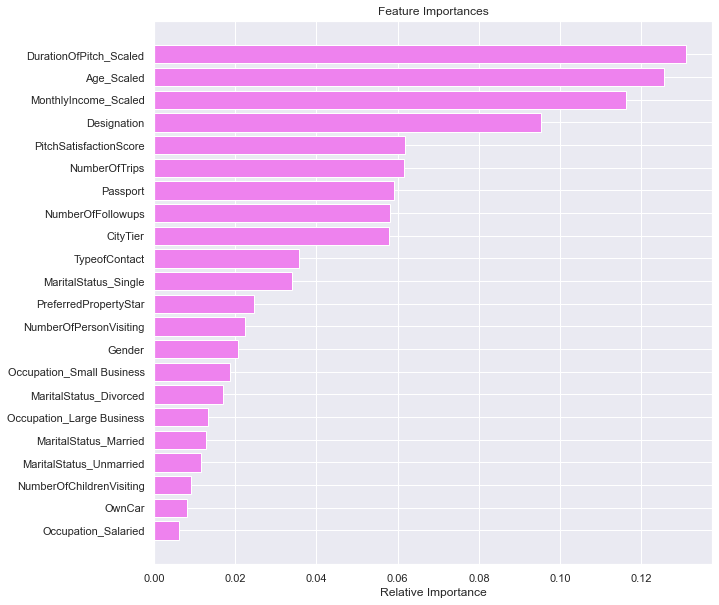

In [154]:
feature_names = list(X.columns) # Get a list of the column names to label the tree

print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In the feature importances we see some variables that we expected at the top of the list: Age, Number of trips, Designation, Passport, Number of Followups. We can also see some variables that we did not expect: Duration of Pitch, Monthly Income, Pitch Satisfaction Score.  

Let's look at the tree and see what's there:

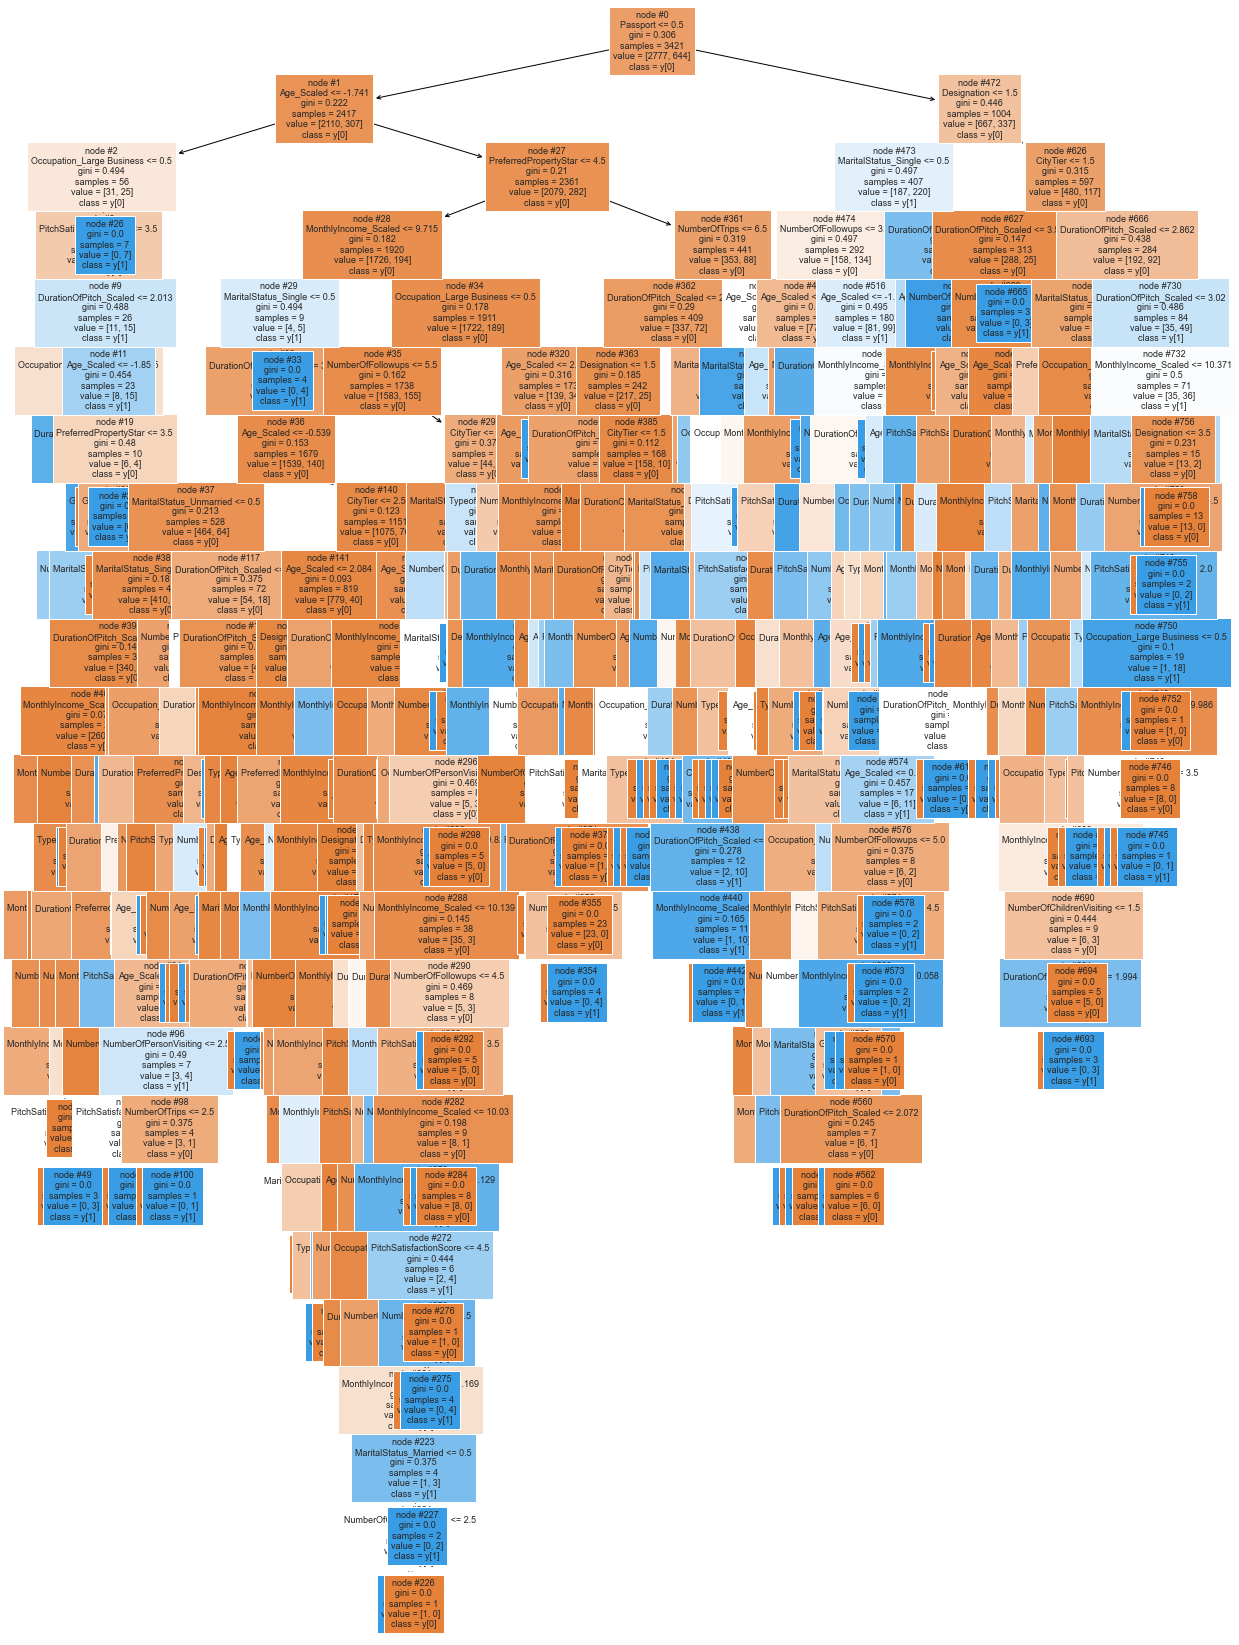

In [155]:
feature_names = list(X.columns) # Get a list of the column names to label the tree

plt.figure(figsize=(20,30))

out = tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

A completely unpruned tree is a depth = 37 mess! Let's attempt to prune the tree and see if we can get a better result with a much simpler model.

## Pre-Pruned Decision Tree

An un-pruned tree overfits. We will now try to limit the tree again using hyperparameters. We will use a cross-validated Grid-Search to look for the optimum hyperparameter set. We will use F1-Score as our metric to optimize.

In [156]:
# Choose the type of classifier. 
dTree_pre = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 10,15,20],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1],
              }

# Type of scoring used to compare parameter combinations, we are using f1-score here
f1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dTree_pre, parameters, scoring=f1_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dTree_pre = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dTree_pre.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=3,
                       min_impurity_decrease=0.001, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

Accuracy on training set :  0.8213972522654195
Accuracy on test set :  0.8411724608043627
Recall on training set :  0.3416149068322981
Recall on test set :  0.3695652173913043
Precision on training set :  0.5405405405405406
Precision on test set :  0.6335403726708074
F1 on training set :  0.4186489058039962
F1 on test set :  0.4668192219679634


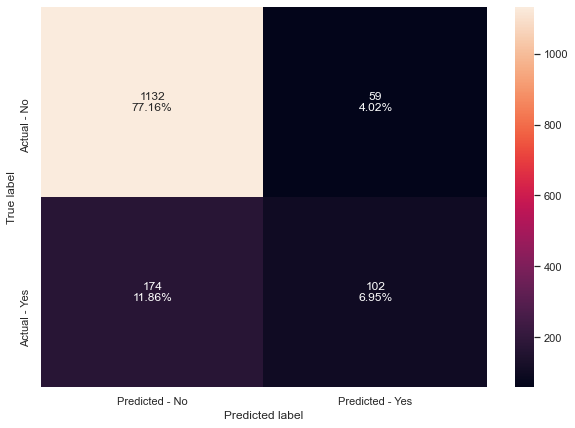

In [157]:
scores = get_metrics_score(dTree_pre,X_train,X_test,y_train,y_test,flag=True)
# creating confusion matrix
make_confusion_matrix(dTree_pre,X_test,y_test)

We can see that, when we pre-prune the tree, the optimum depth of the tree is only 2. The model generalizes much better now; we can see that the train and test metrics are very similar. However, the model is not performing very well. The accuracy is only 84% (our baseline is 81.2%) and the recall, precision and F1-scores are all quite low.  
Let's look at the feature importances of the decision tree when there the depth is much less.

                                Imp
Passport                   0.518003
Designation                0.481997
MaritalStatus_Divorced     0.000000
MonthlyIncome_Scaled       0.000000
DurationOfPitch_Scaled     0.000000
Occupation_Small Business  0.000000
Occupation_Salaried        0.000000
Occupation_Large Business  0.000000
MaritalStatus_Unmarried    0.000000
MaritalStatus_Single       0.000000
MaritalStatus_Married      0.000000
TypeofContact              0.000000
CityTier                   0.000000
NumberOfChildrenVisiting   0.000000
OwnCar                     0.000000
PitchSatisfactionScore     0.000000
NumberOfTrips              0.000000
PreferredPropertyStar      0.000000
NumberOfFollowups          0.000000
NumberOfPersonVisiting     0.000000
Gender                     0.000000
Age_Scaled                 0.000000


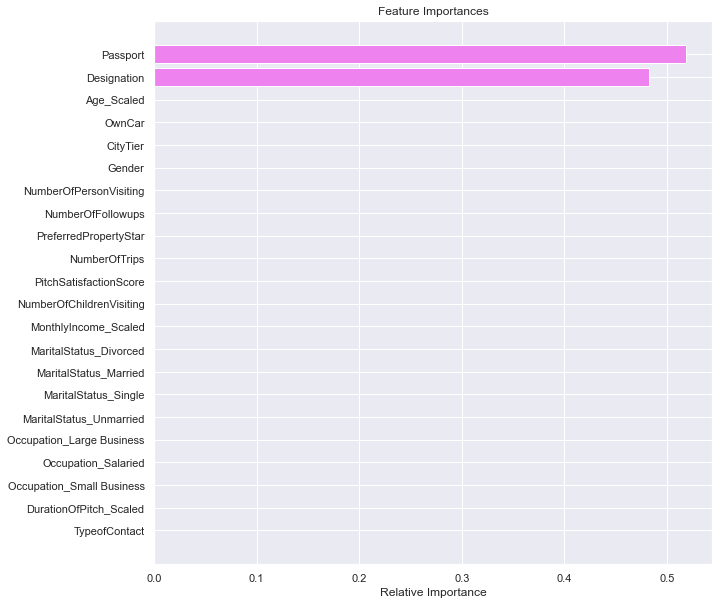

In [158]:
feature_names = list(X.columns) # Get a list of the column names to label the tree

print (pd.DataFrame(dTree_pre.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

importances = dTree_pre.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

We can see that Passport and Designation are the two variables that are used in our depth = 2 pre-pruned decision tree. These are variables that we identified as important in our EDA. Compare this to our unpruned tree when Passport was 7th on the list and Designation was 4th.

Finally, let's take a look at the pre-pruned tree.

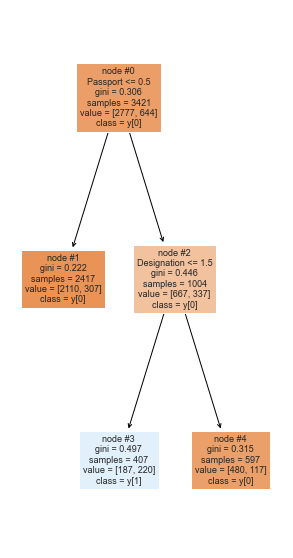

In [159]:
feature_names = list(X.columns) # Get a list of the column names to label the tree

plt.figure(figsize=(5,10))

out = tree.plot_tree(dTree_pre,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

This model is much less complex, but the metrics are quite poor.

## Post Pruned Decision Tree

We have looked at an unpruned and pre-pruned decision tree. We will now look at a post pruned decision tree by manipulating the ccp_alpha value.

In [160]:
# We initialize a decision tree classifier with no hyper parameters (other than random state) and call it clf
clf = DecisionTreeClassifier(random_state=1)  
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities # Create a data frame with the alphas and impurities

In [161]:
pd.DataFrame(path)

ccp_alphas  impurities
0      0.000000    0.000000
1      0.000186    0.000557
2      0.000194    0.001139
3      0.000194    0.001721
4      0.000219    0.002159
..          ...         ...
182    0.004026    0.260895
183    0.004692    0.265587
184    0.005186    0.270773
185    0.016797    0.287570
186    0.018052    0.305623

[187 rows x 2 columns]

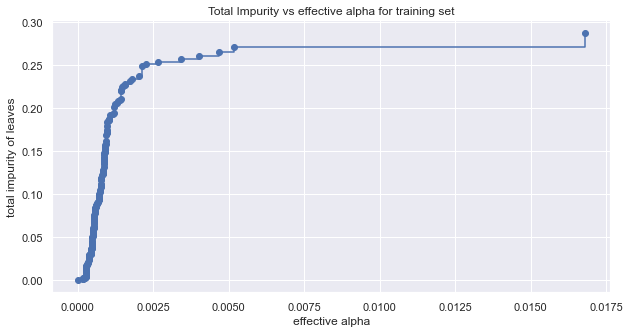

In [162]:
# We will now plot ccp_alpha vs. impurity.
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

When alpha = zero, we have a completely grown tree with no impurities on the leaf nodes. As we increase alpha, i.e. start pruning the tree, the impurity of the leaves starts to increase.  
We will train a decision tree for each value of alpha, with the exception of the last value of alpha, which is the alpha value that prunes the whole tree. The tree with clfs[-1] will have one node.

In [163]:
clfs = [] # create a list trees using all possible alpha values
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.018052238158108525


We now have decision trees for all possible alpha values. 
For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

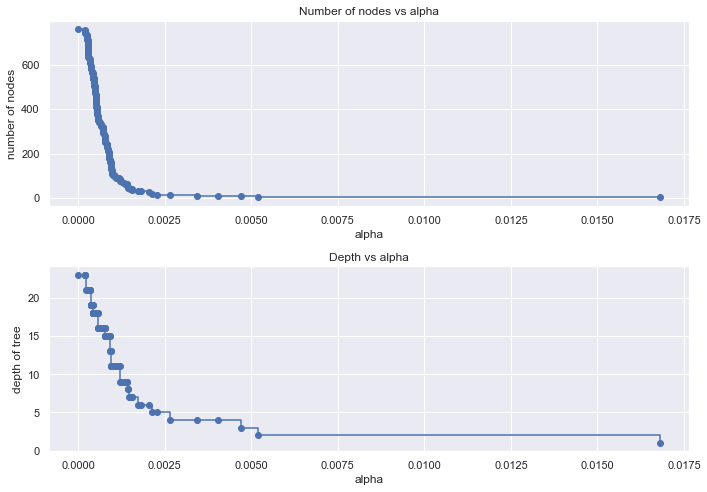

In [164]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

We can see here that, as ccp alpha increases, the total number of nodes and the depth of the tree decreases. There will exist an optimal value for alpha where the tree is simple enough that it generalizes well but complex enough that it still predicts well on new data sets (i.e. the test data). We will find that optimal point by plotting the accuracy and f1-score for the training and test data for all possible alpha values.

### Accuracy vs. Alpha For Training and Test Data

Here we plot accuracy score for the training and test data for all possible alpha values.

In [165]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

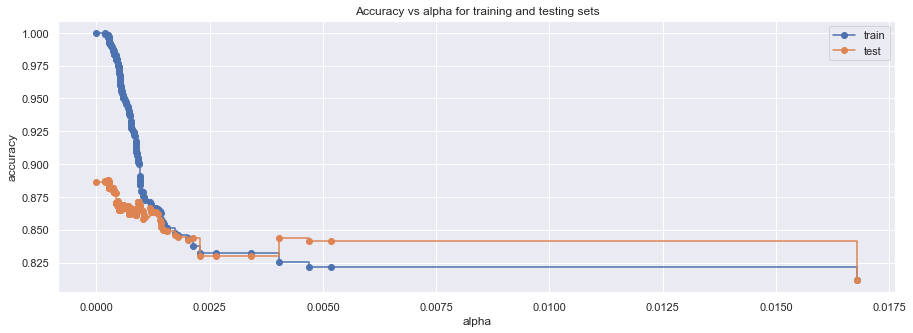

In [166]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

### F1-Score vs. Alpha For Training and Test Data

Here we plot F1-Score for all possible alpha values.

In [167]:
f1_train=[]
for clf in clfs:
    pred_train=clf.predict(X_train)
    values_train=metrics.f1_score(y_train,pred_train)
    f1_train.append(values_train)

In [168]:
f1_test=[]
for clf in clfs:
    pred_test=clf.predict(X_test)
    values_test=metrics.f1_score(y_test,pred_test)
    f1_test.append(values_test)

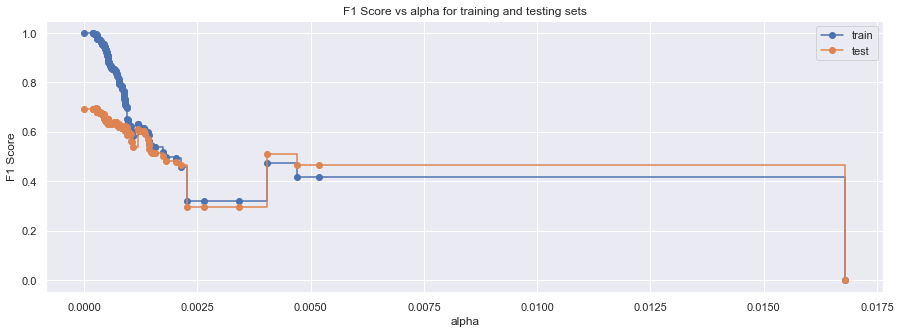

In [169]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("alpha")
ax.set_ylabel("F1 Score")
ax.set_title("F1 Score vs alpha for training and testing sets")
ax.plot(ccp_alphas, f1_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, f1_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

* For both accuracy and F1-Score, the highest test results are achieved at the lowest alpha, i.e. when the model is the most complex. However this is not what we want. We already know that the unpruned tree is too complex and overfits the training data.
* If we simply choose the argmax of the test accuracy/recall/F1-score, it will return the most complex tree, where alpha is zero, so we will need to manually choose the alpha.
* **Note that we will see this behaviour throughout this notebook. When we run Grid Search to optimize hyperparameters, it will often return parameter sets that create the most complex decision trees and overfit training data. For this reason we will often manually limit the base classifier decision tree in our ensemble methods.**
* In this case we are looking for the alpha value where the accuracy and F1-Score of the training and test data starts to overlap. At this point we can say that the model is generalizing well.
* We will chose the alpha value for this point: alpha = 0.001185. This occurs at index location 161 in our list of ccp_alphas. Let's imput this value and get our post pruned decision tree.

In [170]:
#Let's look at the tree parameters at index location 161
index_dTree_post = 161
dTree_post = clfs[index_dTree_post]
print(dTree_post)

DecisionTreeClassifier(ccp_alpha=0.0011851738001055767, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=1, splitter='best')


Accuracy on training set :  0.8710903244665302
Accuracy on test set :  0.8663940013633266
Recall on training set :  0.5885093167701864
Recall on test set :  0.5579710144927537
Precision on training set :  0.6828828828828829
Precision on test set :  0.6754385964912281
F1 on training set :  0.6321934945788158
F1 on test set :  0.6111111111111112


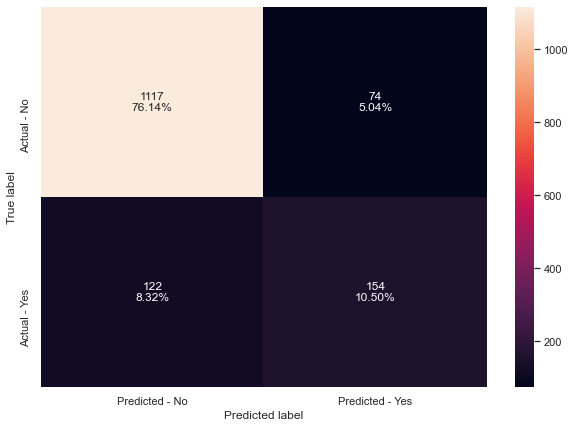

In [171]:
scores = get_metrics_score(dTree_post,X_train,X_test,y_train,y_test,flag=True)
# creating confusion matrix
make_confusion_matrix(dTree_post,X_test,y_test)

* The metrics for our training and testing data are very similar, indicating that our model is not overfitting the training data. 
* The metrics are much better than the pre-pruned tree but slightly worse than the unpruned tree. However, we know that the unpruned tree was overfit to the training data and was overly complex. 
* The post-pruned tree will act as a baseline to which we can compare our ensemble method models. The accuracy is above our baseline at 86.6% and the F1-Score is decent at 0.61. There is definite room for improvement.  

Let's take a look at the feature importances and a plot of the tree before we move on to our ensemble methods.

                                Imp
Designation                0.187498
Passport                   0.160591
Age_Scaled                 0.142178
DurationOfPitch_Scaled     0.135964
CityTier                   0.072306
MaritalStatus_Single       0.065715
NumberOfTrips              0.042824
NumberOfFollowups          0.028907
PreferredPropertyStar      0.024839
MaritalStatus_Divorced     0.024163
MaritalStatus_Married      0.023534
MonthlyIncome_Scaled       0.023528
PitchSatisfactionScore     0.023271
MaritalStatus_Unmarried    0.022503
Occupation_Large Business  0.022179
Occupation_Salaried        0.000000
Occupation_Small Business  0.000000
NumberOfPersonVisiting     0.000000
NumberOfChildrenVisiting   0.000000
OwnCar                     0.000000
Gender                     0.000000
TypeofContact              0.000000


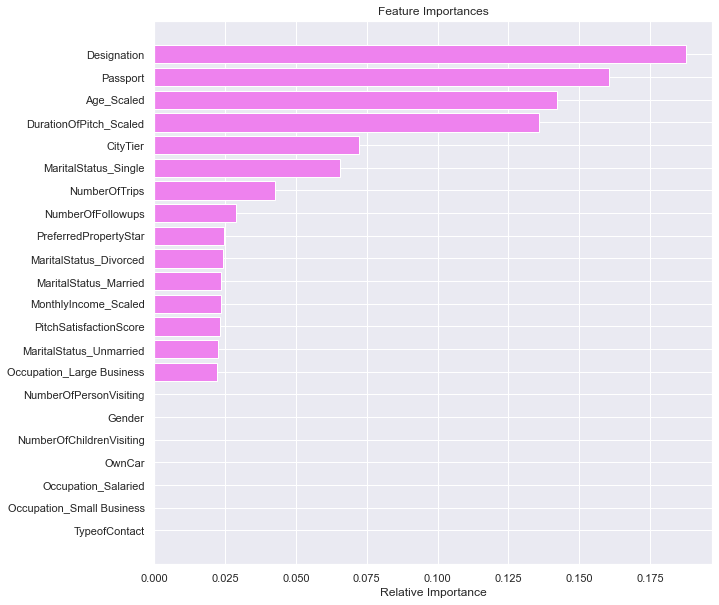

In [172]:
feature_names = list(X.columns) # Get a list of the column names to label the tree

print (pd.DataFrame(dTree_post.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

importances = dTree_post.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Passport and Designation are again our top two feature importances, although the order has changed from our pre-pruned model. Age and Duration of Pitch are also important features.

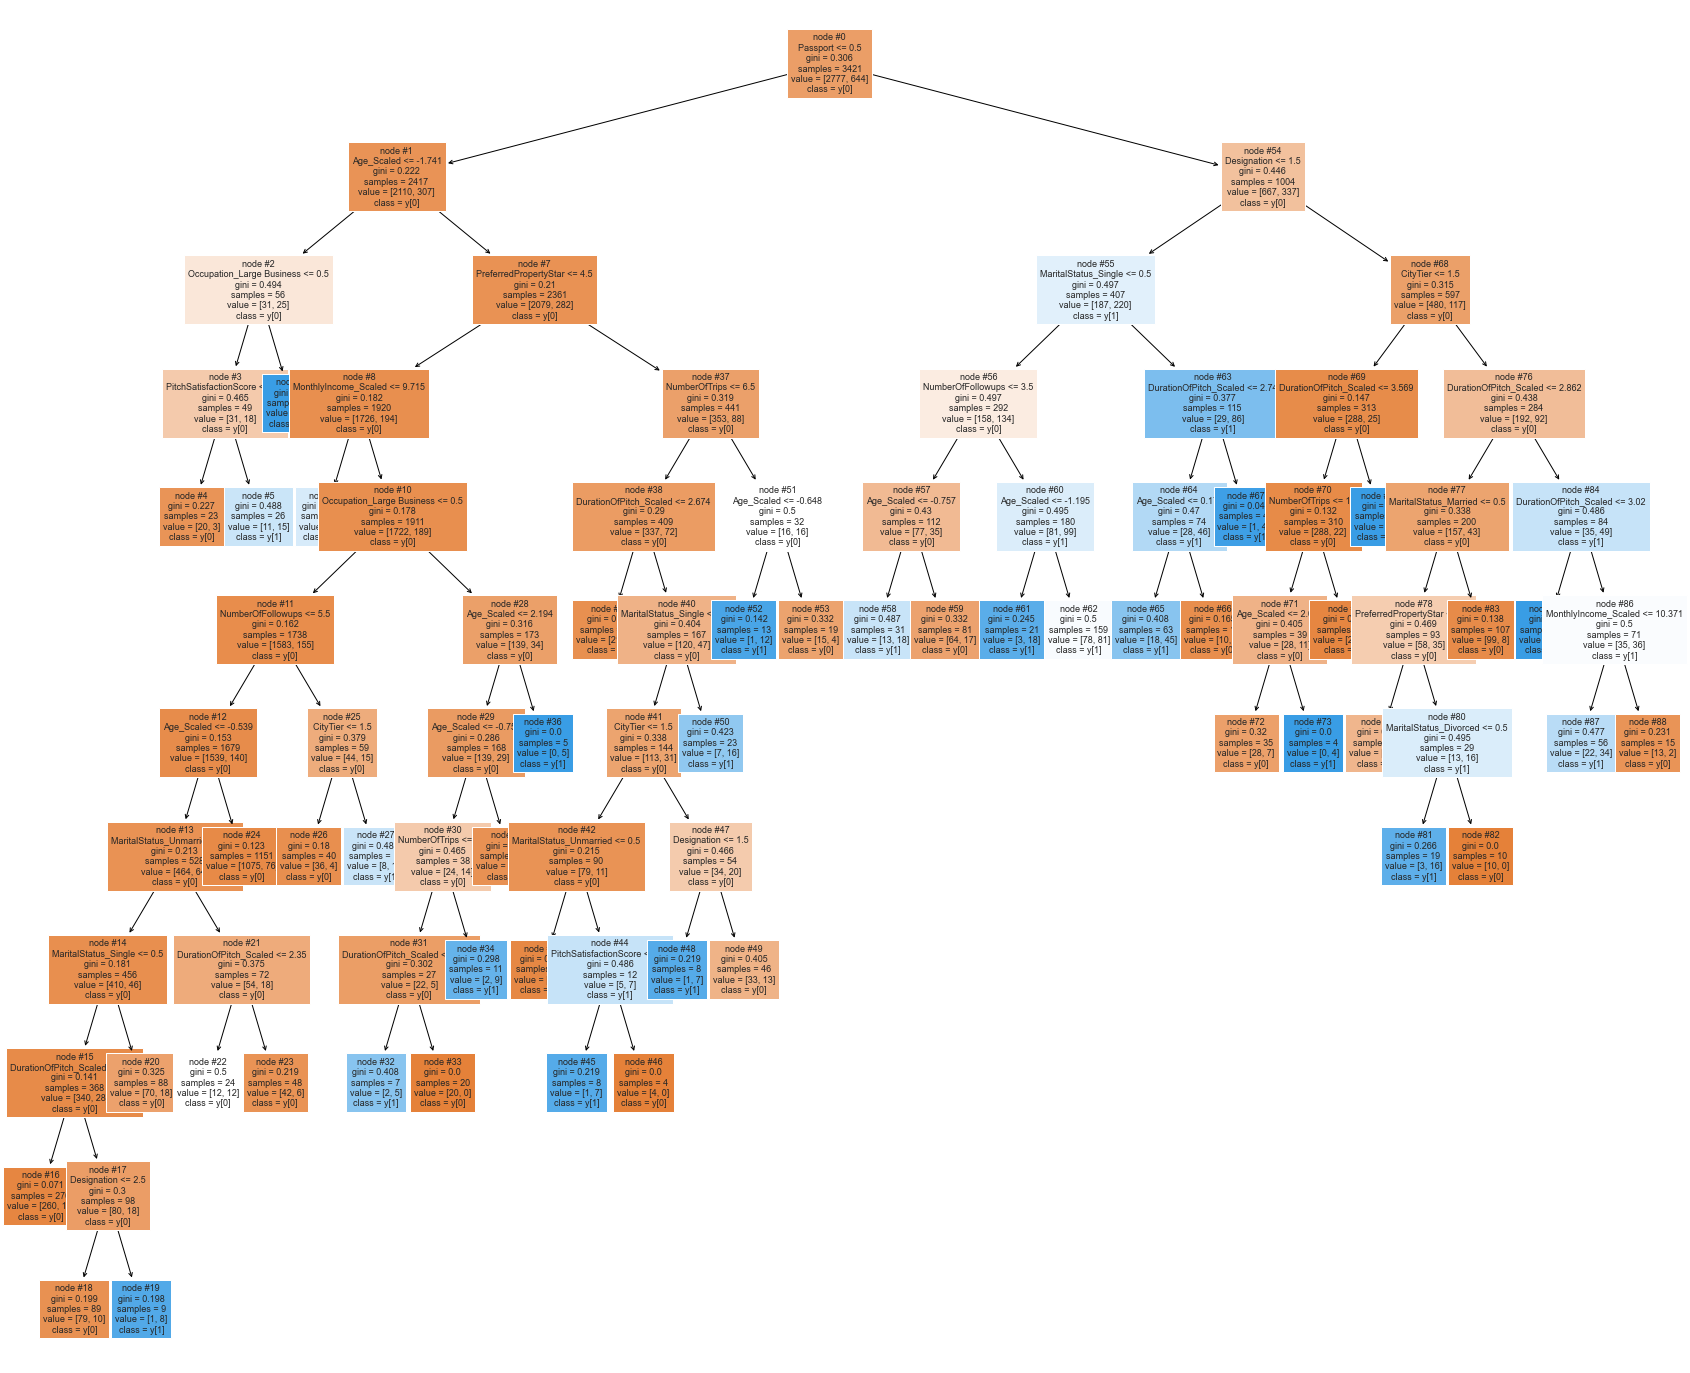

In [173]:
feature_names = list(X.columns) # Get a list of the column names to label the tree

plt.figure(figsize=(30,25))

out = tree.plot_tree(dTree_post,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
for o in out:
     arrow = o.arrow_patch
     if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()

The post pruned tree is much less complex than the unpruned tree but predicts with similar metrics on the test data, while not overfitting the training data.

### Decision Tree Models - Summary

* Our initial, unpruned tree overfit the training data.
* We attempted to pre-prune the decision tree using hyperparameters, optimised with a Grid Search. The resulting decision tree no longer overfit the training data. However the metrics were quite poor.
* We then attempted to reduce overfitting by post-pruning the decision tree. This resulted in a decision tree which does not overfit with improved metrics compared to the original and pre-pruned tree.

## Bagging Classifier
We will run the Bagging ensemble method to create a model. First with the default parameters and then we will attempt to improve the performance by tuning the hyper-parameters.

### Default Bagging Classifier

Accuracy on training set :  0.994153756211634
Accuracy on test set :  0.9086571233810498
Recall on training set :  0.9720496894409938
Recall on test set :  0.5942028985507246
Precision on training set :  0.9968152866242038
Precision on test set :  0.8817204301075269
F1 on training set :  0.9842767295597485
F1 on test set :  0.7099567099567099


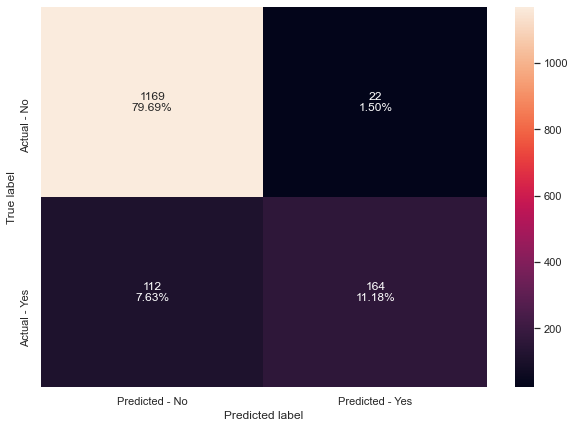

In [174]:
#Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_classifier,X_train,X_test,y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(bagging_classifier,X_test,y_test)

* The default Bagging classifier is overfitting the training data. Evidence for this is the large difference between the training and test data in the recall, precision and F1 metrics.
* Despite the overfitting, the Bagging Classifier has better accuracy, precision and F1 score on the test data than any of the decision tree models we attempted.  

Let's see if we can reduce the overfitting problem by reducing the max depth of the base classifier decision tree. (Here I set the max_depth to 2 and then increased the value using trial and error until the model started to overfit. The best values seems to be 5.)

### Bagging Classifier - Base Estimator max_depth = 5

Accuracy on training set :  0.8640748319204911
Accuracy on test set :  0.8609406952965235
Recall on training set :  0.36801242236024845
Recall on test set :  0.36231884057971014
Precision on training set :  0.8033898305084746
Precision on test set :  0.78125
F1 on training set :  0.5047923322683707
F1 on test set :  0.49504950495049505


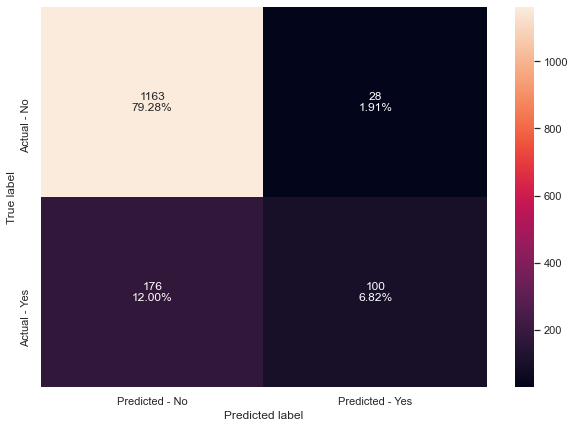

In [175]:
BaseEstimator = DecisionTreeClassifier(criterion='gini',random_state=1, max_depth = 5) # max_depth set to 5 to prevent overfitting
bagging_limit = BaggingClassifier(base_estimator=BaseEstimator,random_state=1)
bagging_limit.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_limit,X_train,X_test,y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(bagging_limit,X_test,y_test)

* If we limit the depth of the base estimator, the Bagging Classifier no longer overfits the training data. The accuracy score is decent at 86%, but the other metrics are poor.  

Let's see if we can improve the other metrics by weighting the classes of the target variable.

### Bagging Classifier - Base Estimator max_depth = 5, Class Weights

Accuracy on training set :  0.8389359836305174
Accuracy on test set :  0.8411724608043627
Recall on training set :  0.6785714285714286
Recall on test set :  0.6413043478260869
Precision on training set :  0.559539052496799
Precision on test set :  0.5691318327974276
F1 on training set :  0.6133333333333333
F1 on test set :  0.6030664395229983


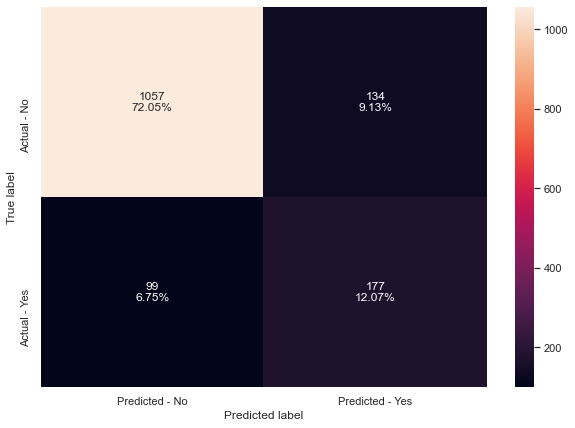

In [176]:
# The base estimator will have a limited depth and class weights assigned.
BaseEstimator = DecisionTreeClassifier(criterion='gini',random_state=1, max_depth = 5, class_weight={0:0.19,1:0.81}) 
bagging_weighted = BaggingClassifier(base_estimator=BaseEstimator,random_state=1)
bagging_weighted.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(bagging_weighted,X_train,X_test,y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(bagging_weighted,X_test,y_test)

* By limiting the depth of the base estimator we avoid the overfitting issue. 
* By adjusting the class weights, we see a small dip in our accuracy score but a large increase in our recall and F1 scores.  

We now perform a Grid Search, using our updated base estimator, and see if we can further improve the results by tuning the hyperparameters.

### Bagging Classifier - Edited Base Estimator, Tuned Hyperparameters

In [177]:
# Choose the type of classifier. 
BaseEstimator = DecisionTreeClassifier(criterion='gini',random_state=1, max_depth = 5, class_weight={0:0.19,1:0.81}) 
bagging_tuned = BaggingClassifier(base_estimator=BaseEstimator,random_state=1)


# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1.0], 
              'max_features': [0.7,0.8,0.9,1.0], # By limiting features we blur the line between bagging and random forest. However I have seen this in ALL examples provided
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_tuned.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='depreca

Accuracy on training set :  0.8570593393744519
Accuracy on test set :  0.8500340831629175
Recall on training set :  0.7018633540372671
Recall on test set :  0.6521739130434783
Precision on training set :  0.6034712950600801
Precision on test set :  0.5921052631578947
F1 on training set :  0.6489590811198851
F1 on test set :  0.6206896551724137


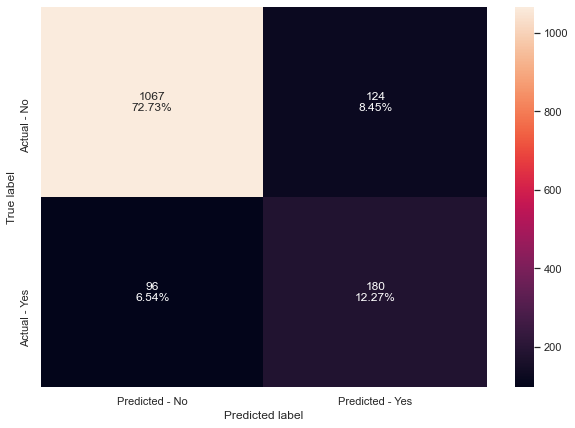

In [178]:
#Calculating different metrics
get_metrics_score(bagging_tuned,X_train,X_test,y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(bagging_tuned,X_test,y_test)

* The Bagging Classifier with hypertuned parameters is working better than our previous Bagging Classifiers.
* In this case the number of features chosen (max_features) was 0.7. By randomly selecting the feature we are moving into Random Forest teritory. However, I saw this hyperparameter in all of the example Grid Searched provided in the course material and decided to run it here. In this case it does produce a better result, so we will go with it.

### Bagging Classifier - Edited Base Estimator, Tuned Hyperparameters, Feature Selection

Now that we have some decent results from our Bagging Classifier. Let's see if we can further improve upon them by removing features from the data that do not appear to be adding much value. We will remove the features which had the lowest feature importances in the decision tree models:
* TypeOfContact, Occupation, OwnCar, NumberOfChildrenVisiting, NumberOfPersonVisiting, Gender and MaritalStatus_Unmarried (this last one is redundant when our tree depth is greater than 2 anyway).

In [179]:
X_train_edit = X_train.drop(['TypeofContact', 'Occupation_Small Business', 'Occupation_Large Business', 'Occupation_Salaried',
                'OwnCar', 'NumberOfChildrenVisiting', 'Gender', 'MaritalStatus_Unmarried'], axis=1)
X_test_edit = X_test.drop(['TypeofContact', 'Occupation_Small Business', 'Occupation_Large Business', 'Occupation_Salaried',
                'OwnCar', 'NumberOfChildrenVisiting', 'Gender', 'MaritalStatus_Unmarried'], axis=1)

In [180]:
# Choose the type of classifier. 
BaseEstimator = DecisionTreeClassifier(criterion='gini',random_state=1, max_depth = 5, class_weight={0:0.19,1:0.81}) 
bagging_tuned_editdf = BaggingClassifier(base_estimator=BaseEstimator,random_state=1)


# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1.0], 
              'max_features': [0.7,0.8,0.9,1.0], # By limiting features we blur the line between bagging and random forest. However I have seen this in ALL examples provided
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_tuned_editdf, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train_edit, y_train)

# Set the clf to the best combination of parameters
bagging_tuned_editdf = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_tuned_editdf.fit(X_train_edit, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight={0: 0.19,
                                                                      1: 0.81},
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='depreca

Accuracy on training set :  0.8456591639871383
Accuracy on test set :  0.8350374914792092
Recall on training set :  0.7127329192546584
Recall on test set :  0.6992753623188406
Precision on training set :  0.5723192019950125
Precision on test set :  0.5482954545454546
F1 on training set :  0.6348547717842323
F1 on test set :  0.6146496815286624


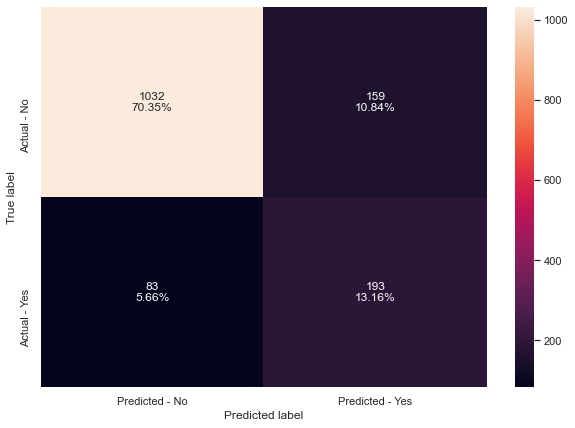

In [181]:
#Calculating different metrics
get_metrics_score(bagging_tuned_editdf,X_train_edit,X_test_edit,y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(bagging_tuned_editdf,X_test_edit,y_test)

* There is a slight drop in most of our metrics as a result of removing features.
* The exception is a 0.047 increases in the recall score on the test data.

### Bagging Classifiers - Summary

* Our initial Bagging Classifier with default parameters overfit the training data
* We were able to reduce the overfitting by assigning a max_depth of 5 to the base_estimator decision tree.
* We were able to further improve our model by assigning class weights to the base_estimator
* We further improved the model by tuning the hyper parameters.
* Finally we attempted to improve the model by removing features, there was a slight boost to the recall score with a slight drop in all other metrics.

# Random Forest Classifiers

Random Forest ensemble methods are simillar to bagging, only the features are also bootstrapped.

### Default Random Forest

In [182]:
#Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(rf_estimator, X_train, X_test,y_train,y_test,flag=True)

print()

Accuracy on training set :  1.0
Accuracy on test set :  0.907293796864349
Recall on training set :  1.0
Recall on test set :  0.5507246376811594
Precision on training set :  1.0
Precision on test set :  0.926829268292683
F1 on training set :  1.0
F1 on test set :  0.6909090909090908



* Default Random Forest Classifier overfits the training data.
* Default Bagging Classifier also overfit the training data but had better recall and F1-score than default Random Forest.

Obviously there is some work to do here! Given that Random Forest boostraps features, let's first try to drop the underperforming features. We will use our X_train_edit data frame. Remember that this data frame has dropped the following columns:  
 - TypeOfContact, Occupation, OwnCar, NumberOfChildrenVisiting, NumberOfPersonVisiting, Gender and MaritalStatus_Unmarried (this last one is redundant when our tree depth is greater than 2 anyway).
 
### Random Forest with 1st Round of Feature Selection

In [183]:
#Fitting the model
rf_editdf = RandomForestClassifier(random_state=1)
rf_editdf.fit(X_train_edit,y_train)

#Calculating different metrics
get_metrics_score(rf_editdf, X_train_edit, X_test_edit,y_train,y_test,flag=True)

print()

Accuracy on training set :  1.0
Accuracy on test set :  0.9025221540558964
Recall on training set :  1.0
Recall on test set :  0.5398550724637681
Precision on training set :  1.0
Precision on test set :  0.9030303030303031
F1 on training set :  1.0
F1 on test set :  0.6757369614512472



* The Random Forest Classifier is still overfitting, but all metrics have improved on the testing set.

### Random Forest - 1 Round Feature Selection, Limited Depth On Base Classifier

In [184]:
#Fitting the model
rf_limit = RandomForestClassifier(random_state=1, max_depth = 5)
rf_limit.fit(X_train_edit,y_train)

#Calculating different metrics
get_metrics_score(rf_limit, X_train_edit, X_test_edit,y_train,y_test,flag=True)

print()

Accuracy on training set :  0.8398129201987723
Accuracy on test set :  0.8282208588957055
Recall on training set :  0.16614906832298137
Recall on test set :  0.11956521739130435
Precision on training set :  0.9067796610169492
Precision on test set :  0.7857142857142857
F1 on training set :  0.2808398950131234
F1 on test set :  0.20754716981132076



* Limiting the max_depth removed the overfitting issue. I tried a number of max_depth values, the classifier starts to overfit the training data when the max_depth gets above 5. For this reason, I've set the max depth to 5.
* **Note that if I attempt to enter max_depth into a Grid Search, the model is always returned with the maximum depth. The F1-score DOES get better when we increase the tree depth, however the model is also overfitting the training data. For this reason I have to select the max_depth manually.**
* The accuracy and precision are decent but the recall and F1-score are terrible. This tells us that we need to apply our class weights again.

### Random Forest - 1 Round Feature Selection, Limited Depth On Base Classifier, Class Weights Added

Accuracy on training set :  0.8310435545162234
Accuracy on test set :  0.825494205862304
Recall on training set :  0.6956521739130435
Recall on test set :  0.6811594202898551
Precision on training set :  0.5397590361445783
Precision on test set :  0.5280898876404494
F1 on training set :  0.6078697421981004
F1 on test set :  0.5949367088607594


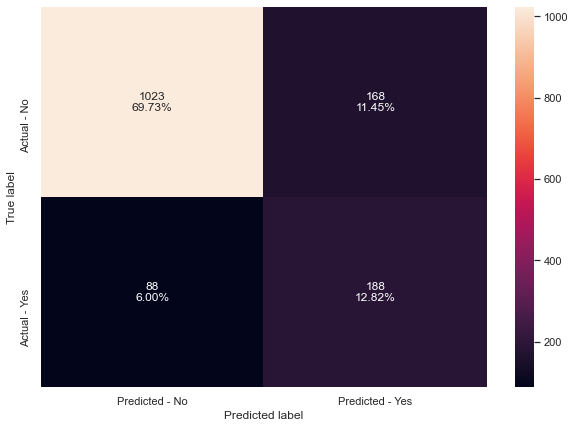

In [185]:
#Fitting the model
rf_weighted = RandomForestClassifier(random_state=1, max_depth = 5, class_weight={0:0.19,1:0.81})
rf_weighted.fit(X_train_edit,y_train)

#Calculating different metrics
get_metrics_score(rf_weighted, X_train_edit, X_test_edit,y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(rf_weighted,X_test_edit,y_test)

* By limiting the depth we removed overfitting, by adjusting class weights, we improved the metrics.
* This model has the best recall score (on test data) that we have seen so far, the F1-score is also on par with our best models so far.

Let's see if we can further refine the model using a Grid Search to tune the hyperparameters.

### Random Forest - 1 Round Feature Selection, Limited Depth On Base Classifier, Class Weights, Tuned Hyperparameters

In [186]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(random_state=1, max_depth = 5, class_weight={0:0.19,1:0.81})

parameters = {  
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(50,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_edit, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train_edit, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.19, 1: 0.81}, criterion='gini',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

Accuracy on training set :  0.8310435545162234
Accuracy on test set :  0.825494205862304
Recall on training set :  0.6956521739130435
Recall on test set :  0.6811594202898551
Precision on training set :  0.5397590361445783
Precision on test set :  0.5280898876404494
F1 on training set :  0.6078697421981004
F1 on test set :  0.5949367088607594


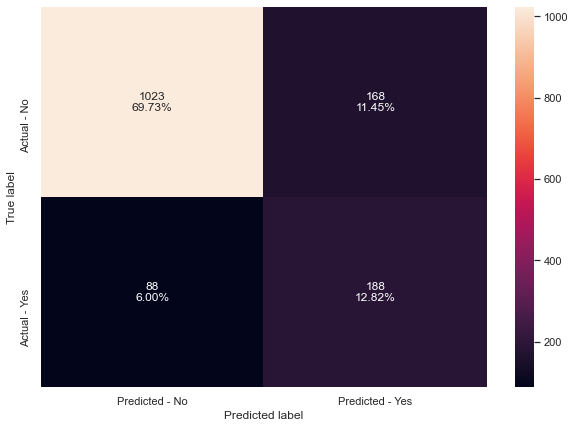

In [187]:
#Calculating different metrics
get_metrics_score(rf_tuned, X_train_edit, X_test_edit, y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(rf_tuned,X_test_edit,y_test)

* Even with the number of estimators at 100, tuning the hyperparameters has provided no increase in our metrics.

Now that we have our random forest classifier as good as it's going to get, let's take a look at the feature importances.

### Feature Importances of Best Random Forest Classifier (So far...)

                             Imp
Passport                0.227817
Designation             0.144328
Age_Scaled              0.111866
MonthlyIncome_Scaled    0.096915
CityTier                0.074351
MaritalStatus_Single    0.073955
DurationOfPitch_Scaled  0.061853
NumberOfFollowups       0.048608
MaritalStatus_Married   0.036546
PreferredPropertyStar   0.035718
NumberOfTrips           0.030298
MaritalStatus_Divorced  0.026047
PitchSatisfactionScore  0.024583
NumberOfPersonVisiting  0.007114


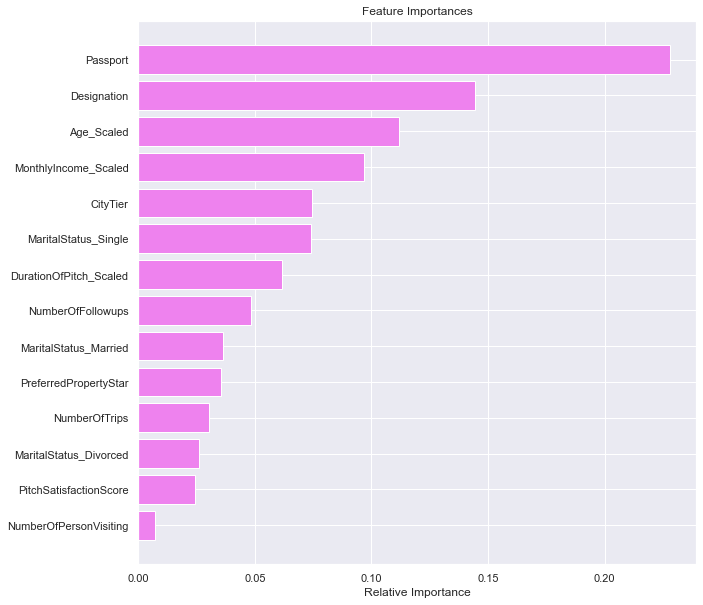

In [188]:
feature_names = list(X_train_edit.columns) # Get a list of the column names to label the tree

print (pd.DataFrame(rf_tuned.feature_importances_, columns = ["Imp"], index = X_train_edit.columns).sort_values(by = 'Imp', ascending = False))

importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Passport, Designation and Age remain the top three features.
* NumberOfPersonVisiting appears to be under-performing as a feature. Let's see if we can drop this feature and improve our results.

### Random Forest - 2 Rounds Feature Selection, Limited Depth On Base Classifier, Class Weights, Tuned Hyperparameters

In [189]:
X_train_edit2 = X_train_edit.drop('NumberOfPersonVisiting', axis=1)
X_test_edit2 = X_test_edit.drop('NumberOfPersonVisiting', axis=1)

In [190]:
# Choose the type of classifier. 
rf_tuned_editdf2 = RandomForestClassifier(random_state=1, max_depth = 5, class_weight={0:0.19,1:0.81})

parameters = {  
                'max_features': ['sqrt','log2',None],
                'min_samples_leaf': np.arange(1,15,5),
                'min_samples_split': np.arange(2, 20, 5),
                'n_estimators': np.arange(50,110,10)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned_editdf2, parameters, scoring=scorer, cv=5,n_jobs=-1)
grid_obj = grid_obj.fit(X_train_edit2, y_train)

# Set the clf to the best combination of parameters
rf_tuned_editdf2 = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned_editdf2.fit(X_train_edit2, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.19, 1: 0.81}, criterion='gini',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=12, min_weight_fraction_leaf=0.0,
                       n_estimators=90, n_jobs=None, oob_score=False,
                       random_state=1, verbose=0, warm_start=False)

Accuracy on training set :  0.8319204910844782
Accuracy on test set :  0.8316291751874574
Recall on training set :  0.6909937888198758
Recall on test set :  0.6884057971014492
Precision on training set :  0.5420219244823387
Precision on test set :  0.5413105413105413
F1 on training set :  0.6075085324232081
F1 on test set :  0.606060606060606


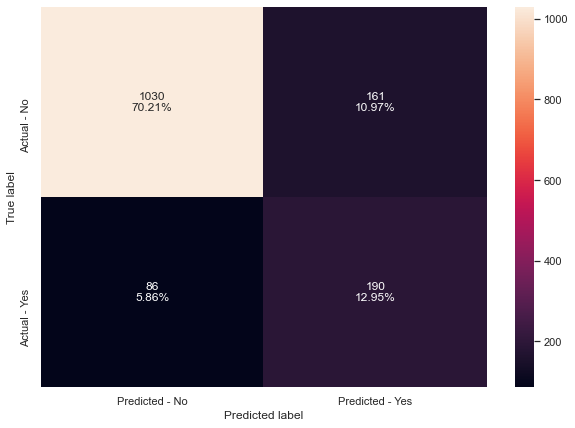

In [191]:
#Calculating different metrics
get_metrics_score(rf_tuned_editdf2, X_train_edit2, X_test_edit2, y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(rf_tuned_editdf2,X_test_edit2,y_test)

* By removing the NumberOfPersonVisiting feature we have slightly improved our recall and F1-score on our test data.

### Random Forest Classifiers - Summary

* Our initial random forest classifier with default parameters overfit the training data.
* By removing features with low importance we improved the metrics of the model but still suffered from the overfitting problem
* Limiting the depth of the decision trees in the forest to 5 fixed the overfitting problem. The max_depth = 5 was chosen by trial and error.
* With the limited depth the overfitting was fixed but the metrics were poor. Adding the class_weight parameter to the decision trees provided a radical improvement to the metrics.
* With our base classifier set, we then attempted to improve the metrics using Grid Search to tune hyperparameters, with mild success. 
* We looked at the feature importances of our tuned random forest classifier. The "NumberOfPersonVisiting" feature was of much lower importance than the other features. By removing this feature, we were able to further improve the recall and F1-score of the classifier.

# Summary Of All Bagging-Classifiers

* The task for this section was: "Build bagging classifier, random forest, and decision tree."  
* We built a decision tree model first as this is the simplest model type and our bagging classifier and random forest classifer used a decision trees as their base estimators. We built bagging classifiers second and random forest classifiers last as a random forest is a bagging classifier with an added twist: the features are also bootstrapped.  

* So far we have built 14 different models. Let's compare all the models in this section before we move onto the boosting section of the project.




In [192]:
# defining list of models
# models that use the default X_training set with all variables
models = [dTree, dTree_pre, dTree_post, bagging_classifier, bagging_limit, bagging_weighted, bagging_tuned, rf_estimator]

# models that use the edited X_training set
models2 = [bagging_tuned_editdf, rf_editdf, rf_limit, rf_weighted, rf_tuned]

# models that use the further edited X_training set with NumberOfPersonVisiting removed
models3 = [rf_tuned_editdf2]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model, X_train, X_test, y_train, y_test, flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])
    
# Now loop through the models that used the edited X_training

for model in models2:
    
    j = get_metrics_score(model, X_train_edit, X_test_edit, y_train, y_test, flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])
    
    
# Finally loop through the models that used the further edited X_training

for model in models3:
    
    j = get_metrics_score(model, X_train_edit2, X_test_edit2, y_train, y_test, flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [193]:
comparison_frame = pd.DataFrame({'Model':['dTree', 'dTree_pre', 'dTree_post', 'bagging_classifier', 'bagging_limit', 'bagging_weighted',
                                          'bagging_tuned', 'rf_estimator', 'bagging_tuned_editdf', 'rf_editdf', 'rf_limit',
                                          'rf_weighted', 'rf_tuned', 'rf_tuned_editdf2'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame.sort_values(by='Test_F1-Score',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
3     bagging_classifier        0.994154       0.908657      0.972050   
0                  dTree        1.000000       0.886162      1.000000   
7           rf_estimator        1.000000       0.907294      1.000000   
9              rf_editdf        1.000000       0.902522      1.000000   
6          bagging_tuned        0.857059       0.850034      0.701863   
8   bagging_tuned_editdf        0.845659       0.835037      0.712733   
2             dTree_post        0.871090       0.866394      0.588509   
13      rf_tuned_editdf2        0.831920       0.831629      0.690994   
5       bagging_weighted        0.838936       0.841172      0.678571   
11           rf_weighted        0.831044       0.825494      0.695652   
12              rf_tuned        0.831044       0.825494      0.695652   
4          bagging_limit        0.864075       0.860941      0.368012   
1              dTree_pre        0.821397       0.841172      0.341615   
10              rf_limit        0.839813       0.828221      0.166149   

    Test_Recall  Train_Precision  Test_Precision  Train_F1-Score  \
3      0.594203         0.996815        0.881720        0.984277   
0      0.677536         1.000000        0.705660        1.000000   
7      0.550725         1.000000        0.926829        1.000000   
9      0.539855         1.000000        0.903030        1.000000   
6      0.652174         0.603471        0.592105        0.648959   
8      0.699275         0.572319        0.548295        0.634855   
2      0.557971         0.682883        0.675439        0.632193   
13     0.688406         0.542022        0.541311        0.607509   
5      0.641304         0.559539        0.569132        0.613333   
11     0.681159         0.539759        0.528090        0.607870   
12     0.681159         0.539759        0.528090        0.607870   
4      0.362319         0.803390        0.781250        0.504792   
1      0.369565         0.540541        0.633540        0.418649   
10     0.119565         0.906780        0.785714        0.280840   

    Test_F1-Score  
3        0.709957  
0        0.691312  
7        0.690909  
9        0.675737  
6        0.620690  
8        0.614650  
2        0.611111  
13       0.606061  
5        0.603066  
11       0.594937  
12       0.594937  
4        0.495050  
1        0.466819  
10       0.207547

* The table above shows all of the models built so far, arranged in decending order of F1-Score (on test data).
* The first 4 rows of the table are models that are overfit to the training data. The test data F1-Score is good but, because the model is not generalizing well, the test data recall scores are generally low (with the exception of the full decision tree). If possible, we want high F1 and recall scores.

The table is a little hard to read, let's remove the top 4 rows of the table above, which contain the overfit models, and look at the table again.

In [194]:
comparison_frame.drop(index=[3,0,7,9],axis=0).sort_values(by='Test_F1-Score',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
6          bagging_tuned        0.857059       0.850034      0.701863   
8   bagging_tuned_editdf        0.845659       0.835037      0.712733   
2             dTree_post        0.871090       0.866394      0.588509   
13      rf_tuned_editdf2        0.831920       0.831629      0.690994   
5       bagging_weighted        0.838936       0.841172      0.678571   
11           rf_weighted        0.831044       0.825494      0.695652   
12              rf_tuned        0.831044       0.825494      0.695652   
4          bagging_limit        0.864075       0.860941      0.368012   
1              dTree_pre        0.821397       0.841172      0.341615   
10              rf_limit        0.839813       0.828221      0.166149   

    Test_Recall  Train_Precision  Test_Precision  Train_F1-Score  \
6      0.652174         0.603471        0.592105        0.648959   
8      0.699275         0.572319        0.548295        0.634855   
2      0.557971         0.682883        0.675439        0.632193   
13     0.688406         0.542022        0.541311        0.607509   
5      0.641304         0.559539        0.569132        0.613333   
11     0.681159         0.539759        0.528090        0.607870   
12     0.681159         0.539759        0.528090        0.607870   
4      0.362319         0.803390        0.781250        0.504792   
1      0.369565         0.540541        0.633540        0.418649   
10     0.119565         0.906780        0.785714        0.280840   

    Test_F1-Score  
6        0.620690  
8        0.614650  
2        0.611111  
13       0.606061  
5        0.603066  
11       0.594937  
12       0.594937  
4        0.495050  
1        0.466819  
10       0.207547

* We can see that our "bagging_tuned" model had the highest F1-Score. As a reminder, this was the bagging classifier with the base estimator with max_depth = 5 and class_weight={0:0.19,1:0.81} and tuned hyperparameters.
* However, our best overall model was our "bagging_tuned_editdf" model. This model was the same as the "bagging_tuned" model, only the features we deemed as less important were dropped from the data set before the model was fit.
###  The reason "bagging_tuned_editdf" is our best overall bagging classifier is because:
 - The Test F1-Score is only slightly lower (0.006) than our top F1-Score ("bagging_tuned" model).
 - The Test Recall Score is the best of all models so far at 69.93% (0.047 better than "bagging_tuned" and 0.011 better than 2nd highest recall)  
  
    
* Our best performing random forest classifier was our "rf_tuned_editdf2" model. This was the last model that we made, which had all of our improvements: max_depth = 5, class weights, tuned hyper parameters and 2 rounds of feature selection. It does appear that the single, post-pruned decision tree ("dTree_post") has out performed this random forest classifier. However, if we look at both recall and F1-score, "rf_tuned_editdf2" is the better model.
* Our top bagging classifier and top random forest classifer were both achieved after dropping underperforming features from the data frame.

# -------------------------------------------------------------------------------------------------------------

# Model Building - Boosting
In this section we will use the boosting ensemble technique. We will build classifiers using Adaboost, gradient boost, XGBoost and a stacking classifier. We will look at each technique in turn, running the default model on our full X_training data frame and then attempt to improve each model.

# AdaBoost - Models

### Default AdaBoost Model

Accuracy on training set :  0.8450745396083017
Accuracy on test set :  0.8466257668711656
Recall on training set :  0.30434782608695654
Recall on test set :  0.3188405797101449
Precision on training set :  0.7050359712230215
Precision on test set :  0.704
F1 on training set :  0.42516268980477223
F1 on test set :  0.4389027431421446


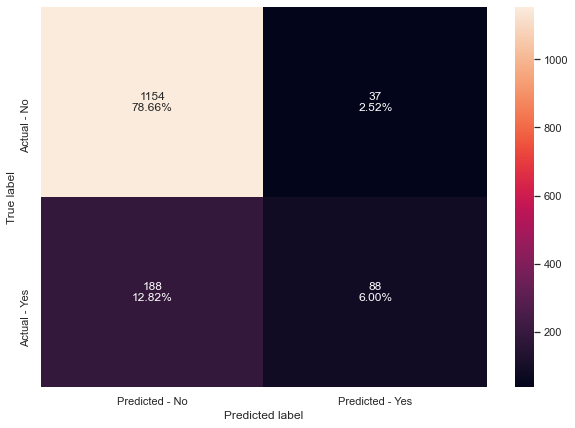

In [195]:
#Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier, X_train, X_test, y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(ab_classifier,X_test, y_test)

* The default AdaBoost parameters are generalizing well, i.e. we are not overfitting the training data. This makes sense, as the default base classifier for AdaBoost is a decision tree with max_depth=1.
* The recall and F1-Score is poor. We saw this with our Bagging and Random Forest classifiers. The solution was to add class weights to the base estimator. Let's attempt that here. We will add class weights but keep the max_depth=1 on the base classifier.

### AdaBoost - Class Weights

Accuracy on training set :  0.7453960830166618
Accuracy on test set :  0.7389229720518065
Recall on training set :  0.7251552795031055
Recall on test set :  0.7681159420289855
Precision on training set :  0.40223944875107664
Precision on test set :  0.3992467043314501
F1 on training set :  0.5174515235457063
F1 on test set :  0.5254027261462206


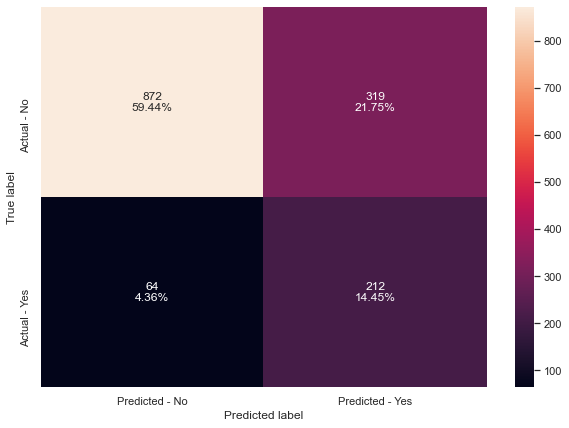

In [196]:
#Fitting the model
BaseEstimator = DecisionTreeClassifier(max_depth=1, class_weight={0:0.19,1:0.81}, random_state=1)
ab_classifier_wt = AdaBoostClassifier(base_estimator=BaseEstimator, random_state=1)
ab_classifier_wt.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(ab_classifier_wt, X_train, X_test, y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(ab_classifier_wt,X_test, y_test)

* By adding class weights to the default classifier we have seen a drop in accuracy and precision (as the algorithm is now misclassifying more class=0) but a large increase in our recall (as the algorithm is now correctly classifying class=1 due to the increased weight on this class).
* We have decreased false negatives from 12.8% down to 4.4%

Let's now see if we can improve the performace AdaBoost by changing the max_depth.

### AdaBoost - Test Increased Depth on Base Classifier

In [197]:
#Fitting the model
BaseEstimator = DecisionTreeClassifier(max_depth=2, class_weight={0:0.19,1:0.81}, random_state=1)
ab_classifier_test = AdaBoostClassifier(base_estimator=BaseEstimator, random_state=1)
ab_classifier_test.fit(X_train,y_train)

#Calculating different metrics
print("AdaBoost Metrics when base classifier has max_depth=2")
get_metrics_score(ab_classifier_test, X_train, X_test, y_train,y_test,flag=True)

print("")
print("")
#Fitting the model
BaseEstimator = DecisionTreeClassifier(max_depth=3, class_weight={0:0.19,1:0.81}, random_state=1)
ab_classifier_test = AdaBoostClassifier(base_estimator=BaseEstimator, random_state=1)
ab_classifier_test.fit(X_train,y_train)

#Calculating different metrics
print("AdaBoost Metrics when base classifier has max_depth=3")
get_metrics_score(ab_classifier_test, X_train, X_test, y_train,y_test,flag=True)

print()

AdaBoost Metrics when base classifier has max_depth=2
Accuracy on training set :  0.8295819935691319
Accuracy on test set :  0.7777777777777778
Recall on training set :  0.812111801242236
Recall on test set :  0.7282608695652174
Precision on training set :  0.5309644670050762
Precision on test set :  0.4446902654867257
F1 on training set :  0.6421117249846531
F1 on test set :  0.5521978021978022


AdaBoost Metrics when base classifier has max_depth=3
Accuracy on training set :  0.9307220111078632
Accuracy on test set :  0.841854124062713
Recall on training set :  0.9611801242236024
Recall on test set :  0.717391304347826
Precision on training set :  0.7448856799037304
Precision on test set :  0.5625
F1 on training set :  0.8393220338983051
F1 on test set :  0.6305732484076433



* When we attempt to increase the depth of the base classifier to 2 or 3, the algorithm quickly starts to overfit the training data.
* We can attempt to reduce the amount of overfitting by either reducing the number of estimators or decreasing the learning rate. Let's run a Grid Search to see if we can optimize the parameters

### AdaBoost - Grid Search for Optimum F1-Score

In [198]:
# Choose the type of classifier. 
abc_tuned_f1 = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, class_weight={0:0.19,1:0.81}, random_state=1),
                      DecisionTreeClassifier(max_depth=2, class_weight={0:0.19,1:0.81}, random_state=1),
                      DecisionTreeClassifier(max_depth=3, class_weight={0:0.19,1:0.81}, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned_f1, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned_f1 = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned_f1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight={0: 0.19,
                                                                       1: 0.81},
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                    

* Here the Grid Search has selected a learning rate of 1 AND number of estimators = 100. We expect this model will overfit the training data.

Accuracy on training set :  0.9786612101724642
Accuracy on test set :  0.8677573278800272
Recall on training set :  0.9922360248447205
Recall on test set :  0.7463768115942029
Precision on training set :  0.9038189533239038
Precision on test set :  0.6242424242424243
F1 on training set :  0.9459659511472984
F1 on test set :  0.6798679867986799


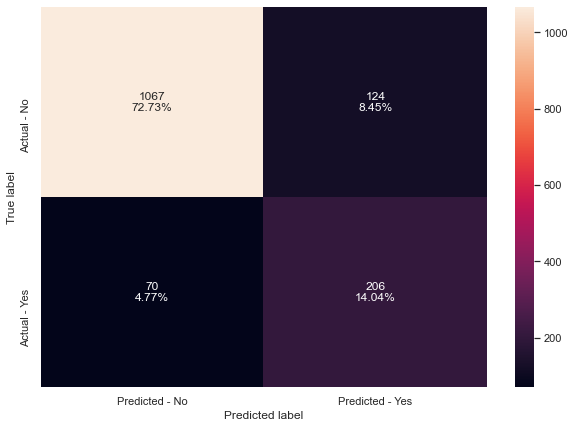

In [199]:
#Calculating different metrics
get_metrics_score(abc_tuned_f1, X_train, X_test, y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(abc_tuned_f1,X_test, y_test)

* As we have seen before in this project, the best metrics on the test data come from the most complex models. However, these models are overfit to the training data.
* Let's see, if we attempt to optimise the Recall Score, if we can get a better model.

### AdaBoost - Grid Search for Optimum Recall Score

In [200]:
# Choose the type of classifier. 
abc_tuned_recall = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1, class_weight={0:0.19,1:0.81}, random_state=1),
                      DecisionTreeClassifier(max_depth=2, class_weight={0:0.19,1:0.81}, random_state=1),
                      DecisionTreeClassifier(max_depth=3, class_weight={0:0.19,1:0.81}, random_state=1)],
    "n_estimators": np.arange(10,110,10),
    "learning_rate":np.arange(0.1,2,0.1)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned_recall, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned_recall = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned_recall.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight={0: 0.19,
                                                                       1: 0.81},
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                    

* The Grid Search has chosen max_depth=1, learning_rate=1.9 (which is high), n_estimators=20 (which is lower and should balance the learning rate)
* With these parameters, we don't expect the model to overfit the training data.

Accuracy on training set :  0.6235019000292312
Accuracy on test set :  0.6284935241990457
Recall on training set :  0.7841614906832298
Recall on test set :  0.782608695652174
Precision on training set :  0.3053204353083434
Precision on test set :  0.30813124108416545
F1 on training set :  0.43951261966927757
F1 on test set :  0.4421699078812692


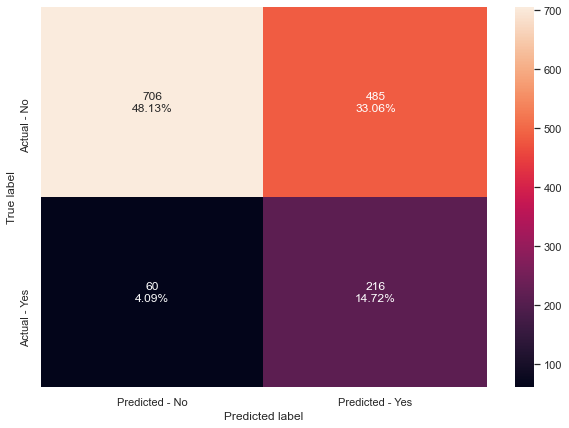

In [201]:
#Calculating different metrics
get_metrics_score(abc_tuned_recall, X_train, X_test, y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(abc_tuned_recall, X_test, y_test)

* With the Grid Search set to optimise the recall score, the model is no longer overfitting the training data.
* The Test Recall score IS very good at 0.783. However, the F1-Score is quite low. If we were to use this model:
    - the number of false negatives are low, so marketing would not miss many customers who are likely to purchase a product.
    - the number of false positives are high, so marketing would waste time and effort marketing to customers who are predicted to purchase, but unlikely to purchase.
    
Let's take what we have learnt from our Grid Searches and try to make an optimum model. We will set the max_depth=2, halfway between the 1 (recall optimised) and 3 (F1 optimised). We will set the number of estimators high, at 100, but slow down the learning rate to avoid overfitting.

### AdaBoost - Manual Tuned Hyperparameters

Accuracy on training set :  0.817012569424145
Accuracy on test set :  0.8029993183367417
Recall on training set :  0.7639751552795031
Recall on test set :  0.7608695652173914
Precision on training set :  0.5093167701863354
Precision on test set :  0.48498845265588914
F1 on training set :  0.6111801242236025
F1 on test set :  0.5923836389280677


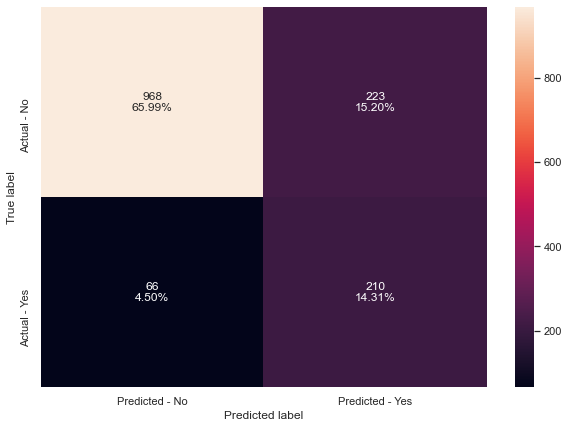

In [202]:
#Fitting the model
BaseEstimator = DecisionTreeClassifier(max_depth=2, class_weight={0:0.19,1:0.81}, random_state=1)
abc_manual = AdaBoostClassifier(base_estimator=BaseEstimator, random_state=1, n_estimators=100, learning_rate=0.175)
abc_manual.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(abc_manual, X_train, X_test, y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(abc_manual, X_test, y_test)

* Here the test recall is only slightly worse than when we ran the grid search optimising recall: Down from 0.78 to 0.76.
* The recall score is better than when we optimised on the F1-score: Up from 0.75 to 0.76.
* The F1 score is worse than when we optimised on F1, However, we are no longer overfitting the training data.
* This is the best AdaBoost model we have so far.

### AdaBoost - Manual Tuned Hyperparameters with Feature Selection

As we saw a significant improvement in our bagging classifiers with feature selection, let's try that now. We do not expect to see any difference given that AdaBoost makes many small decision trees and does not bootstrap features. So weak predicting features are simply not selected by AdaBoost.

Accuracy on training set :  0.8105817012569424
Accuracy on test set :  0.7934560327198364
Recall on training set :  0.7748447204968945
Recall on test set :  0.7717391304347826
Precision on training set :  0.49800399201596807
Precision on test set :  0.47019867549668876
F1 on training set :  0.6063183475091131
F1 on test set :  0.5843621399176955


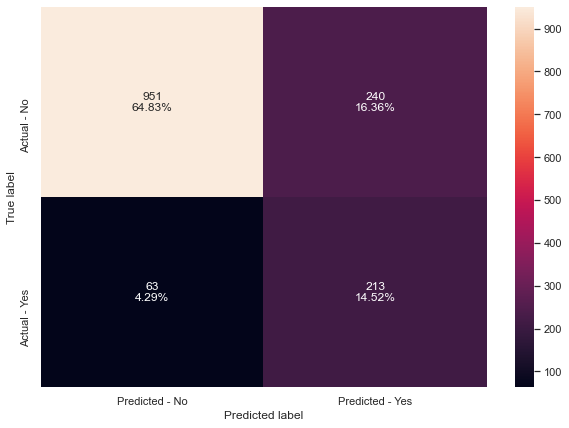

In [203]:
#Fitting the model
BaseEstimator = DecisionTreeClassifier(max_depth=2, class_weight={0:0.19,1:0.81}, random_state=1)
abc_editdf = AdaBoostClassifier(base_estimator=BaseEstimator, random_state=1, n_estimators=100, learning_rate=0.175)
abc_editdf.fit(X_train_edit,y_train)

#Calculating different metrics
get_metrics_score(abc_editdf, X_train_edit, X_test_edit, y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(abc_editdf, X_test_edit, y_test)

* There is a slight difference in the metrics as a result of removing features from the input data frame.
* Recall goes up 0.11 and F1 goes down 0.08. A very slight improvement on the model without feature selection.

### Feature Importances

Let's look at the feature importances of the manually tuned model (abc_manual), and the manually tuned model with feature selection (abc_editdf)

#### Feature Importances of manually tuned model

                                Imp
MonthlyIncome_Scaled       0.159448
Age_Scaled                 0.144630
DurationOfPitch_Scaled     0.104036
NumberOfFollowups          0.083094
Designation                0.077531
PitchSatisfactionScore     0.065574
Passport                   0.059337
NumberOfTrips              0.057253
CityTier                   0.049211
MaritalStatus_Unmarried    0.035791
PreferredPropertyStar      0.035066
MaritalStatus_Single       0.032556
TypeofContact              0.029629
Gender                     0.027841
Occupation_Large Business  0.011552
MaritalStatus_Married      0.008388
NumberOfPersonVisiting     0.008253
OwnCar                     0.006564
Occupation_Salaried        0.004247
MaritalStatus_Divorced     0.000000
NumberOfChildrenVisiting   0.000000
Occupation_Small Business  0.000000


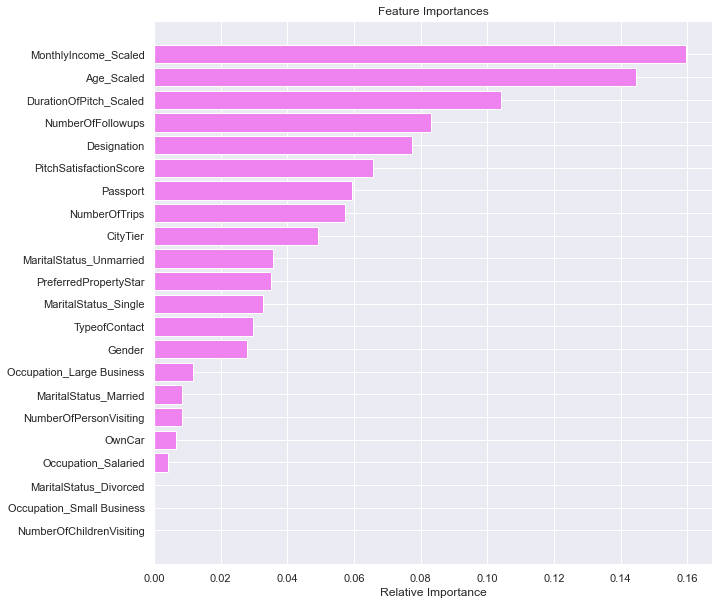

In [204]:
feature_names = list(X_train.columns) # Get a list of the column names to label the tree

print (pd.DataFrame(abc_manual.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

importances = abc_manual.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* In our decision tree and random forest models we consistently saw Passport and Designation as the top two features. In our boosting model, we see the continuous variables (MonthlyIncome, Age, DurationOfPitch) at the top of the list. 
* NumberOfFollowups and PitchSatisfactionScore, some semi-continuous variables are also near the top of the list.
* Passport and Designation still rank high on the list.

#### Feature Importance of Manually Tuned Model with Feature Selection

                             Imp
MonthlyIncome_Scaled    0.209547
Age_Scaled              0.163246
DurationOfPitch_Scaled  0.091778
NumberOfFollowups       0.080913
Passport                0.073251
Designation             0.068300
PitchSatisfactionScore  0.065060
CityTier                0.057886
NumberOfTrips           0.056721
PreferredPropertyStar   0.037573
MaritalStatus_Divorced  0.031905
MaritalStatus_Married   0.028126
MaritalStatus_Single    0.024521
NumberOfPersonVisiting  0.011173


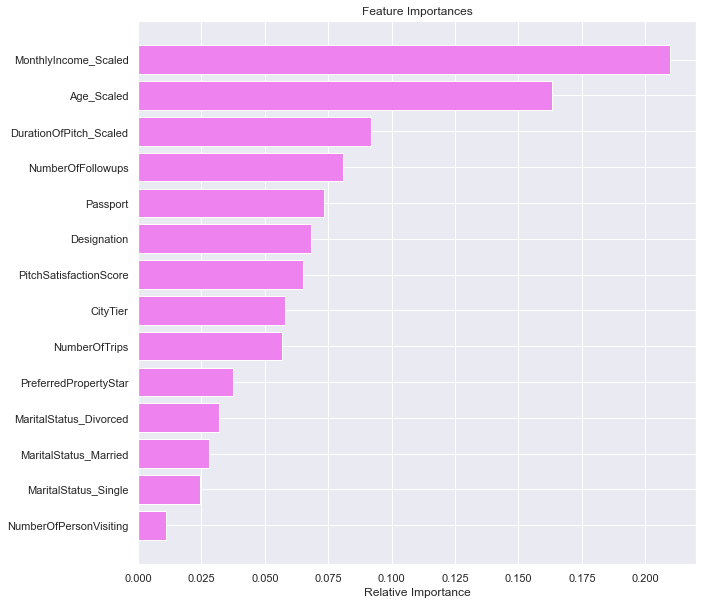

In [205]:
feature_names = list(X_train_edit.columns) # Get a list of the column names to label the tree

print (pd.DataFrame(abc_editdf.feature_importances_, columns = ["Imp"], index = X_train_edit.columns).sort_values(by = 'Imp', ascending = False))

importances = abc_editdf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Again we see MonthlyIncome, Age and DurationOfPitch at the top of the list.
* With this in mind, let's run a final test with AdaBoost and input our non-scaled MonthlyIncome, Age and DurationOfPitch variables.

### Test AdaBoost - Manually Tuned Model with Unscaled Data

In [206]:
# take a copy of our df after we conditioned everything but before we dropped variables
df = df_conditioned.copy()

# this time drop the scaled versions of the variables and Product Pitched as it is exactly the same as Designation
df.drop(['Age_Scaled','DurationOfPitch_Scaled','MonthlyIncome_Scaled', 'ProductPitched'], axis=1, inplace = True)

In [207]:
y_unscaled = df['ProdTaken']   # Split the data into dependent and independent variables
X_unscaled = df.drop('ProdTaken', axis=1)

In [208]:
# Let's split the data into a train and test sets. 
# I will use the stratify parameter to maintain the ratio of classes in the dependant variable
X_train_unscaled, X_test_unscaled, y_train_unscaled, y_test_unscaled = train_test_split(X_unscaled, y_unscaled, test_size=0.3, random_state=1, stratify=y_unscaled)
X_train_unscaled.head()

Age  TypeofContact  CityTier  DurationOfPitch  Gender  \
3234  34.0              1         1             12.0       1   
657   29.0              1         1             13.0       0   
150   40.0              0         1             32.0       0   
2745  19.0              1         3             12.0       0   
2567  52.0              1         1             13.0       1   

      NumberOfPersonVisiting  NumberOfFollowups  PreferredPropertyStar  \
3234                       3                5.0                    3.0   
657                        3                4.0                    3.0   
150                        2                3.0                    4.0   
2745                       4                5.0                    3.0   
2567                       3                4.0                    3.0   

      NumberOfTrips  Passport  PitchSatisfactionScore  OwnCar  \
3234            6.0         0                       3       0   
657             7.0         0                       5       1   
150             2.0         0                       2       1   
2745            3.0         0                       2       1   
2567            3.0         0                       5       1   

      NumberOfChildrenVisiting  Designation  MonthlyIncome  \
3234                       1.0            3        25797.0   
657                        0.0            1        17532.0   
150                        0.0            2        20605.0   
2745                       3.0            1        19878.0   
2567                       1.0            5        38215.0   

      MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single  \
3234                       0                      1                     0   
657                        0                      1                     0   
150                        0                      1                     0   
2745                       0                      0                     1   
2567                       0                      0                     1   

      MaritalStatus_Unmarried  Occupation_Large Business  Occupation_Salaried  \
3234                        0                          0                    1   
657                         0                          0                    0   
150                         0                          0                    0   
2745                        0                          0                    0   
2567                        0                          0                    1   

      Occupation_Small Business  
3234                          0  
657                           1  
150                           1  
2745                          1  
2567                          0

Accuracy on training set :  0.817012569424145
Accuracy on test set :  0.8029993183367417
Recall on training set :  0.7639751552795031
Recall on test set :  0.7608695652173914
Precision on training set :  0.5093167701863354
Precision on test set :  0.48498845265588914
F1 on training set :  0.6111801242236025
F1 on test set :  0.5923836389280677


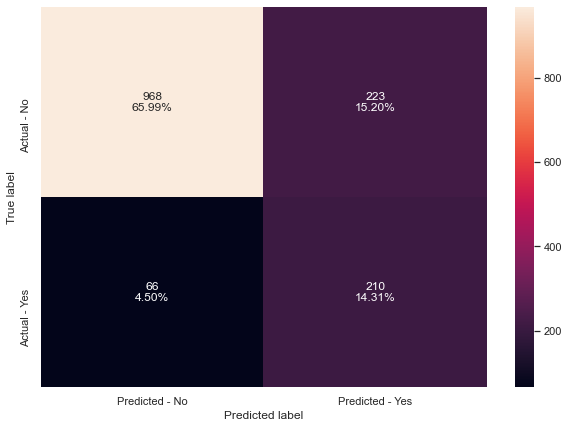

In [209]:
#Fitting the model
BaseEstimator = DecisionTreeClassifier(max_depth=2, class_weight={0:0.19,1:0.81}, random_state=1)
abc_manual_unscaled = AdaBoostClassifier(base_estimator=BaseEstimator, random_state=1, n_estimators=100, learning_rate=0.175)
abc_manual_unscaled.fit(X_train_unscaled,y_train_unscaled)

#Calculating different metrics
get_metrics_score(abc_manual_unscaled, X_train_unscaled, X_test_unscaled, y_train_unscaled,y_test_unscaled,flag=True)

#Creating confusion matrix
make_confusion_matrix(abc_manual_unscaled, X_test_unscaled, y_test_unscaled)

* These results are **EXACTLY** the same as when we fed the model our scaled variables. Given the amount of work that went into scaling the variables, this is depressing!
* Behind the scenes, I looked at the feature importances, they are the same, only swap the names MonthlyIncome_Scaled for MonthlyIncome, etc.
* We will continue using the scaled variables, given that we saw no change in metrics here but as a general rule we expect scaled varaibles to make an improvement.

### AdaBoost Classifiers - Summary

* Our initial AdaBoost generalized well and had a high accuracy, however the recall and F1-Score was low.
* We added class weights to the base classifier which greatly improved the recall and F1 score.
* We attempted to optimize hyperparameters on the F1-score. This lead to a model that overfit the training data but did have a high F1 score.
* We then attempted to optimize hyperparameters on recall. The resulting model did not overfit the training data, the recall was high (0.78) but the F1 score was low (0.44). Using this model would likely lead to over spending in marketing due to the number of false positives.
* We then attempted to strike a balance between recall and F1 score by taking what we had leart from the Grid Search results and manually tune a model. This lead to a model with a recall of 0.76 and F1 0.59. A slight drop in recall from our recall optimised model, with a large gain in F1-Score.
* Finally we attempted to further refine the model by removing some of the lower importance features from the data set. This lead to a recall of 0.77 and F1 of 0.58. Very little change from the same model with all features but perhaps slightly better if cost of marketing is less than cost of missed opportuning (and it usually is).  
  
  
* We looked at the feature importances of the model and found our scaled continuous variables (MonthlyIncome_Scaled, Age_Scaled, DurationOfPitch_Scaled) at the top of the list. We then attempted to run our manually tuned model parameters using the unscaled data and found no change in the model performance.
 

# Gradient Boost - Models

### Default Gradient Boost

Accuracy on training set :  0.887459807073955
Accuracy on test set :  0.8677573278800272
Recall on training set :  0.45962732919254656
Recall on test set :  0.39855072463768115
Precision on training set :  0.8888888888888888
Precision on test set :  0.7971014492753623
F1 on training set :  0.6059365404298873
F1 on test set :  0.5314009661835749


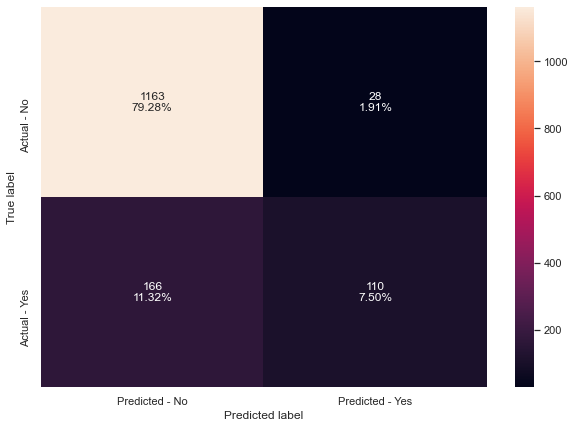

In [210]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(gb_classifier, X_train, X_test, y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(gb_classifier, X_test, y_test)

* The default Gradient Boost does appears to be generalizing well without further parameterization (unlike our bagging classifiers).
* Accuracy and F1-score are decent but the recall is very low. Gradient Boost does not have the class_weight parameter that we have used with previous models to increase our metrics.
* We can specify an initial model to give the initial estimate in the Gradient Boost algorithm. Let's experiment with that.

#### Input best AdaBoost algorithm as initial guess
Let's try to put our best AdaBoost algorithm. It used the feature selected data so we will use that here:

In [211]:
# Best AdaBoosting
BaseEstimator = DecisionTreeClassifier(max_depth=2, class_weight={0:0.19,1:0.81}, random_state=1)
abc_init = AdaBoostClassifier(base_estimator=BaseEstimator, random_state=1, n_estimators=100, learning_rate=0.175)

#Fitting the model

gb_classifier_test = GradientBoostingClassifier(random_state=1, init=abc_init)
gb_classifier_test.fit(X_train_edit,y_train)

#Calculating different metrics
print("Best adaboost as init")
get_metrics_score(gb_classifier_test, X_train_edit, X_test_edit, y_train,y_test,flag=True)

print()

Best adaboost as init
Accuracy on training set :  0.8862905583162818
Accuracy on test set :  0.8657123381049762
Recall on training set :  0.4549689440993789
Recall on test set :  0.37681159420289856
Precision on training set :  0.8851963746223565
Precision on test set :  0.8062015503875969
F1 on training set :  0.601025641025641
F1 on test set :  0.5135802469135802



* Despite the fact that we have input feature selected data AND changed the initial classification. There has been no change to the metrics.

#### Input default Decision Tree with Class Weight as initial guess
We can't weight the classes in the Gradient Boost, so let's try to weight the classes of our initial estimator. We will use the feature selected data to remain consistant with the other tests.

In [212]:
# Classweigheted dTree as init
gb_classifier_test = GradientBoostingClassifier(random_state=1, init=DecisionTreeClassifier(class_weight={0:0.19,1:0.81}, random_state=1))
gb_classifier_test.fit(X_train_edit,y_train)

#Calculating different metrics
print("Class weighted dTree as init")
get_metrics_score(gb_classifier_test, X_train_edit, X_test_edit, y_train,y_test,flag=True)

print()

Class weighted dTree as init
Accuracy on training set :  1.0
Accuracy on test set :  0.8752556237218814
Recall on training set :  1.0
Recall on test set :  0.6847826086956522
Precision on training set :  1.0
Precision on test set :  0.6631578947368421
F1 on training set :  1.0
F1 on test set :  0.6737967914438502



* The inital decicion tree is overfitting and the resulting gradient boost overfits.

#### Input best Bagging Classifier as initial guess


In [213]:
# best bagging classifier 
BaseEstimator = DecisionTreeClassifier(max_depth=5, class_weight={0:0.19,1:0.81},
                                       random_state=1, min_samples_leaf=1, min_samples_split=2)
bagging_init = BaggingClassifier(base_estimator=BaseEstimator, max_features=0.7, max_samples=0.9, n_estimators=50)

# Now fit the gradient boost using the bagging_init
gb_classifier_test = GradientBoostingClassifier(random_state=1, init=bagging_init)
gb_classifier_test.fit(X_train_edit,y_train)

#Calculating different metrics
print("best bagger on edied training")
get_metrics_score(gb_classifier_test, X_train_edit, X_test_edit, y_train,y_test,flag=True)

print ()

best bagger on edied training
Accuracy on training set :  0.8950599239988307
Accuracy on test set :  0.8677573278800272
Recall on training set :  0.5031055900621118
Recall on test set :  0.391304347826087
Precision on training set :  0.8925619834710744
Precision on test set :  0.8059701492537313
F1 on training set :  0.6434955312810327
F1 on test set :  0.526829268292683



* The results are slightly different to our default Gradient boosting results. But not much better. Recall and F1 are still poor.
* It is clear that our initial guess (as long as it isn't overfitting the training) does not make much difference to the final results. Let's move on to other parameters.

### Tuned Gradient Boost Model - Grid Search Using All Features

We will attempt Grid Searches using both the data with all features present and the feature selected data. We will just use the default for the initial guess, as it appears to make little difference.

In [214]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=0.7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Accuracy on training set :  0.9210757088570594
Accuracy on test set :  0.8766189502385822
Recall on training set :  0.6211180124223602
Recall on test set :  0.4673913043478261
Precision on training set :  0.9389671361502347
Precision on test set :  0.7914110429447853
F1 on training set :  0.747663551401869
F1 on test set :  0.5876993166287017


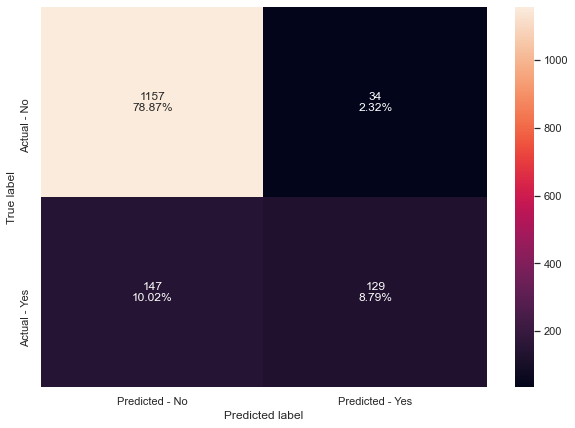

In [215]:
 #Calculating different metrics
get_metrics_score(gbc_tuned, X_train, X_test, y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned, X_test, y_test)

* The recall has increased from default parameters (0.40 to 0.47)
* The F1-Score has increased from default parameters (0.53 to 0.59)
* However, it does appear that the model is overfitting the training data, we can see that the training metrics are much higher than the test metrics.
* The Grid Search chose the maximum number of estimators that we allowed (250) and did not change the learning rate from the default 0.1, this is the likely cause of the overfitting.
* The Grid Search did attempt to limit features and subsample the data. So the next thing we will test is feature selection.

### Tuned Gradient Boost Model - Grid Search Using Selected Features

We will now run a Grid Search with the same parameters, only the input data has had weak features removed.

In [216]:
# Choose the type of classifier. 
gbc_tuned_editdf = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train_edit, y_train)

# Set the clf to the best combination of parameters
gbc_tuned_editdf = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned_editdf.fit(X_train_edit, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=0.8, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.9, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Accuracy on training set :  0.9178602747734581
Accuracy on test set :  0.874573960463531
Recall on training set :  0.6040372670807453
Recall on test set :  0.4528985507246377
Precision on training set :  0.9373493975903614
Precision on test set :  0.7911392405063291
F1 on training set :  0.7346553352219075
F1 on test set :  0.5760368663594471


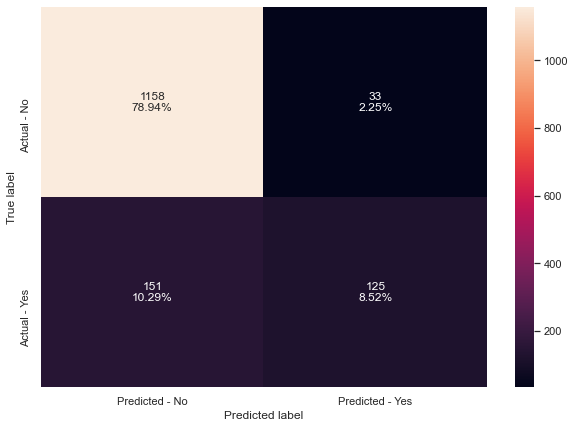

In [217]:
 #Calculating different metrics
get_metrics_score(gbc_tuned_editdf, X_train_edit, X_test_edit, y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned_editdf, X_test_edit, y_test)

* There is a slight dip in the recall (0.45 down from 0.47) and the F1 Score (0.58 down from 0.59) when we limit the features. It is likely better to give all features to the algorithm and let the algorithm test which features are the most important, it increases run time but leads to a better result - at least in this instance.

### Tuned Gradient Boost Model - Grid Search Using All Features, Optimise Recall
We have seen, in previous models, that optimising the Grid Search on recall score will often lead to a better model. Let's see if that is true here.

In [218]:
# Choose the type of classifier. 
gbc_tuned_recall = GradientBoostingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,150,200,250],
    "subsample":[0.8,0.9,1],
    "max_features":[0.7,0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned_recall, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned_recall = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned_recall.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=0.8, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Accuracy on training set :  0.9210757088570594
Accuracy on test set :  0.8793456032719836
Recall on training set :  0.6257763975155279
Recall on test set :  0.48188405797101447
Precision on training set :  0.9328703703703703
Precision on test set :  0.7964071856287425
F1 on training set :  0.7490706319702601
F1 on test set :  0.600451467268623


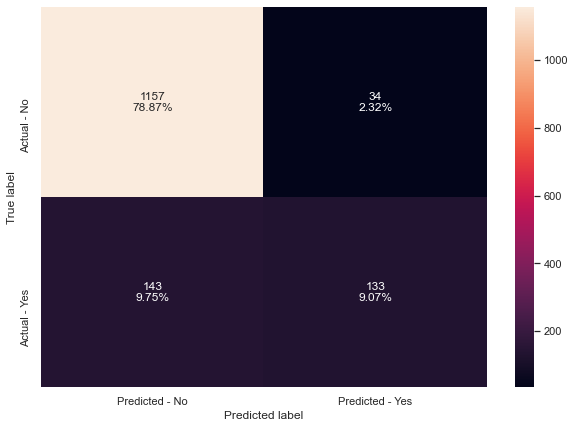

In [219]:
 #Calculating different metrics
get_metrics_score(gbc_tuned_recall, X_train, X_test, y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(gbc_tuned_recall, X_test, y_test)

* This is our best gradient boosting model so far. Recall is 0.48 (2nd best is 0.47 in our model tuned on F1). The F1 Score is 0.6 (2nd best is 0.59 in our model tuned on F1).
* Despite the fact that the Grid Search was optimising Recall, we achieved a better F1 score than when optimising F1!
* The model is still overfitting training data, we can see that the training scores are much better than the test scores.

**Note** I tried to manually reduce the number of estimators, I also tried keeping 250 estimators but dropping the learning rate. All attempts lead to much worse metrics.

### Gradient Boost Classifiers - Summary

* Our initial Gradient Boost model generalized well but the metrics were poor.
* We attempted different models as our initial estimate but found they made little difference.
* We then ran Grid Searches optimising F1 using the full feature set and a select feature set. The full feature set performed better.
* Finally we attempted a grid search optimizing recall. This produced the best gradinet boost model. However, the recall was still low (0.48) AND the model overfit the training data.
* Attempts to reduce the number of estimators or drop the learning rate to reduce overfitting resulted in worse results on the test data.

**Ultimately, the fact that we can not specify class weights in the Gradient Boost Algorithm is likely the reason this classifier performed badly. We can produce models with high accuracy, but due to the unbalanced classes, we can achieve high accuracy with a high number of false negatives.**

# XGBoost - Models

### Default XGBoost Model

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9318336741649625
Recall on training set :  0.9984472049689441
Recall on test set :  0.7028985507246377
Precision on training set :  1.0
Precision on test set :  0.9150943396226415
F1 on training set :  0.9992229992229993
F1 on test set :  0.7950819672131149


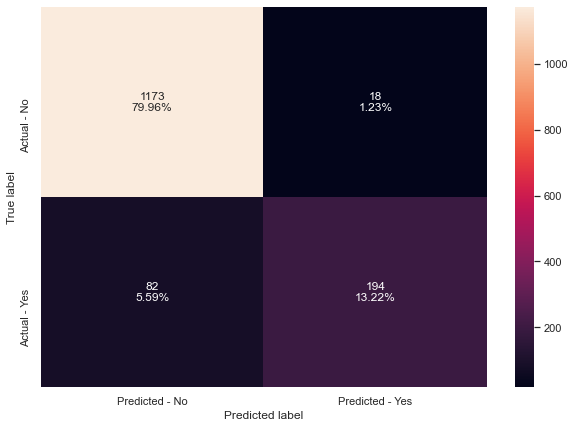

In [220]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgb_classifier, X_train, X_test, y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(xgb_classifier,X_test,y_test)

* The default XGBoost parameters are again overfitting the training data.
* However, we are seeing the highest F1 score so far (even from other overfit models), which is encouraging.

### XGBoost - Grid Search F1

Let's see if a cross-validated grid search will help reduce the overfitting issue that we have. We will optimise the F1 score.

In [221]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=12,
              num_parallel_tree=1, objective='binary:logistic', random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

* The Grid Search set:
 - colsample_bylevel and colsample_bytree to 1, the default and highest values available.
 - learning rate was also set to the maximum possible in the search, 0.2.
 - subsample was set to one again the maximum possible, 1.
 - n_estimators was set to highest option of 50.
* So all the parameters which might help to reduce overfit, if they were reduced, were set to their maximum available values. The Grid Search is doing NOTHING to help with out overfitting issue.
* Scale pos weigh was set to 5, which helps to explain the increase in recall (see below)
 

Accuracy on training set :  0.9739842151417714
Accuracy on test set :  0.9004771642808452
Recall on training set :  0.9953416149068323
Recall on test set :  0.7862318840579711
Precision on training set :  0.8817056396148556
Precision on test set :  0.7138157894736842
F1 on training set :  0.9350838803792852
F1 on test set :  0.7482758620689655


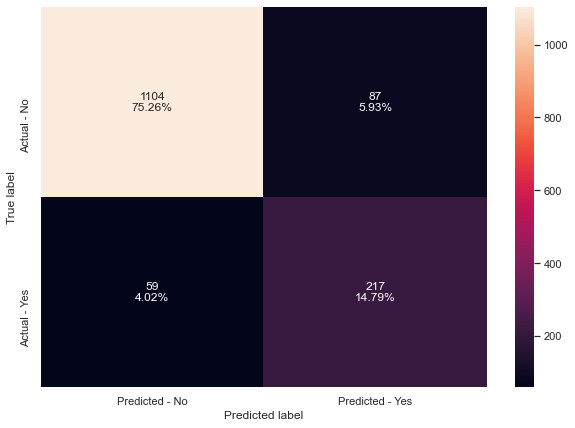

In [222]:
#Calculating different metrics
get_metrics_score(xgb_tuned, X_train, X_test, y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(xgb_tuned,X_test,y_test)

* The model is still overfitting after the grid search.
* The test recall is up (0.79 from 0.70), test F1 is down (0.75 from 0.80). This is likely due to the increased model weight. So we have effectively swapped false negatives (in the default model) for false positives (in the grid search model).

### Attempts to Reduce Overfitting in XGBoost
Both the default and "tuned" versions of our XGBoost models are overfitting the training data. So what can we do? Here are some parameters that might help:
* eta - default=0.3 range[0,1] - lower values "shrink feature weights to make the boosting process more conservative"
* gamma - default=0 range[0,inf] - larger values make the algorithm "more conservative"
* max_depth - default=6 - this is simply the max_depth of the DecisionTreeRegressors. Lower values will reduce overfitting
* subsample - default=1 range[0,1] - "subsample of training instances. Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting"

**Everything in quotes above is directly from the XGBoost documentation**

#### Method:
* We will make numerous models, adjusting the parameters above to attempt to reduce overfitting. 
* We will plot the Recall score for each model for both the training and test data.
* We hope to observe parameter values where the training and test recall scores converge.

### Optimal scale_pos_weight value
We saw in our Grid Search that changing the scale_pos_weight value increased our recall score. The documentation says that a good value to start with is sum(negative instance)/sum(positive instance). That would put the value at 4.25. The default is 1. Let's explore around these values.

In [223]:
values = np.arange(1,5,0.1)

clfs = [] # create a list XGBoost classifiers using all values in range
for value in values:
    clf = XGBClassifier(random_state=1, eval_metric='logloss', scale_pos_weight=value)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
f1_train=[]
for clf in clfs:
    pred_train=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train)
    f1_train.append(values_train)

f1_test=[]
for clf in clfs:
    pred_test=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test)
    f1_test.append(values_test)

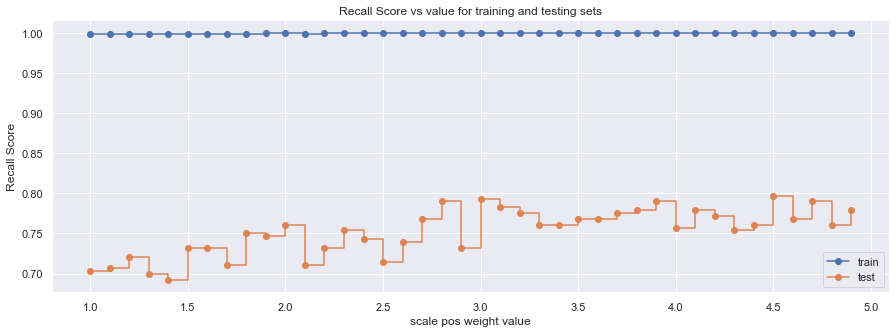

In [224]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("scale pos weight value")
ax.set_ylabel("Recall Score")
ax.set_title("Recall Score vs value for training and testing sets")
ax.plot(values, f1_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(values, f1_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

* The optimal scale_pos_weight value is 3.
* It appears that the maximum test recall possible (currently) is ~0.8, the lowest scale_pos_weight value that achieves maximum recall is 3. We will use this value for all further tests.
* Note that for all values of scale_pos_weight, the default XGBoost overfits the training data.

### Optimal eta value
We will see if there is an optimum eta value to reduce overfitting of the training data while still achieving a high recall in the test value.

In [225]:
values = np.arange(0,0.3,0.005)

clfs = [] # create a list XGBoost classifiers using all values in range
for value in values:
    clf = XGBClassifier(random_state=1, eval_metric='logloss', scale_pos_weight=3, eta=value)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
f1_train=[]
for clf in clfs:
    pred_train=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train)
    f1_train.append(values_train)

f1_test=[]
for clf in clfs:
    pred_test=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test)
    f1_test.append(values_test)

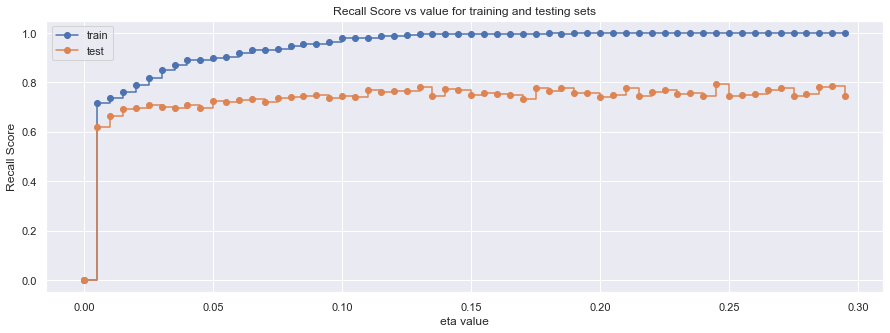

In [226]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("eta value")
ax.set_ylabel("Recall Score")
ax.set_title("Recall Score vs value for training and testing sets")
ax.plot(values, f1_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(values, f1_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

* As we reduce the eta value the amount of overfitting to the training data reduces.
* We would hope that, as we reduce overfitting, the model becomes more generalized and the recall score on the test data would increase. I.e. we expect the training and test recall scores to converge. However that is NOT what we observe here. There is no convergence.
* The two curves appear to be closest when eta is about 0.02. After this the curves further diverge. Test recall slowly creeps up to it's maximum value of ~0.8 at eta=0.24 while training recall ascends more quickly to 1.

### Optimal gamma value
We will see if there is a gamma value to reduce overfitting of the training data while still achieving a high recall in the test value.

In [227]:
values = np.arange(0,40,1)

clfs = [] # create a list XGBoost classifiers using all values in range
for value in values:
    clf = XGBClassifier(random_state=1, eval_metric='logloss', scale_pos_weight=3, gamma=value)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
f1_train=[]
for clf in clfs:
    pred_train=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train)
    f1_train.append(values_train)

f1_test=[]
for clf in clfs:
    pred_test=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test)
    f1_test.append(values_test)

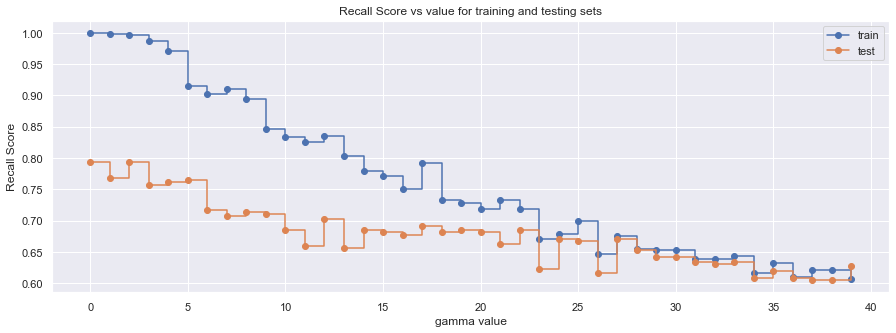

In [228]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("gamma value")
ax.set_ylabel("Recall Score")
ax.set_title("Recall Score vs value for training and testing sets")
ax.plot(values, f1_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(values, f1_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

* Increasing gamma makes the algorithm more conservative.
* Here we can see that the test and training recall scores will converge if we increase the gamma high enough. The optimum value appears to be 24.
* Unfortunately the highest test recall score is achieved when the gamma is lowest (and training data are overfit). We saw this in the eta score and we see it here. A Grid Seach will return the highest test recall score. However it appears that this will always occur at the maximum level of model complexity and with the maximum amount of overfit to the training data.

### Optimal subsample value
We will see if there is a subsample value to reduce overfitting of the training data while still achieving a high recall in the test value.

In [229]:
values = np.arange(0,1,0.05)

clfs = [] # create a list XGBoost classifiers using all values in range
for value in values:
    clf = XGBClassifier(random_state=1, eval_metric='logloss', scale_pos_weight=3, subsample=value)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
f1_train=[]
for clf in clfs:
    pred_train=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train)
    f1_train.append(values_train)

f1_test=[]
for clf in clfs:
    pred_test=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test)
    f1_test.append(values_test)

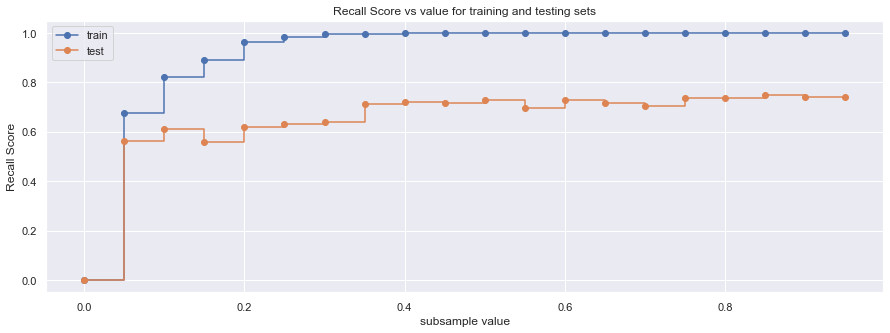

In [230]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("subsample value")
ax.set_ylabel("Recall Score")
ax.set_title("Recall Score vs value for training and testing sets")
ax.plot(values, f1_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(values, f1_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

* Subsample of training data: "Setting it to 0.5 means that XGBoost would randomly sample half of the training data prior to growing trees. and this will prevent overfitting"
* Again we see that the curve do not converge (except at zero). The best test recall score is achieved only when the training data are overfit.

### Optimal max_depth value
We will see if there is a max_depth value to reduce overfitting of the training data while still achieving a high recall in the test value.

In [231]:
values = np.arange(0,6,1)

clfs = [] # create a list XGBoost classifiers using all values in range
for value in values:
    clf = XGBClassifier(random_state=1, eval_metric='logloss', scale_pos_weight=3, max_depth=value)
    clf.fit(X_train, y_train)
    clfs.append(clf)
    
f1_train=[]
for clf in clfs:
    pred_train=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train)
    f1_train.append(values_train)

f1_test=[]
for clf in clfs:
    pred_test=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test)
    f1_test.append(values_test)

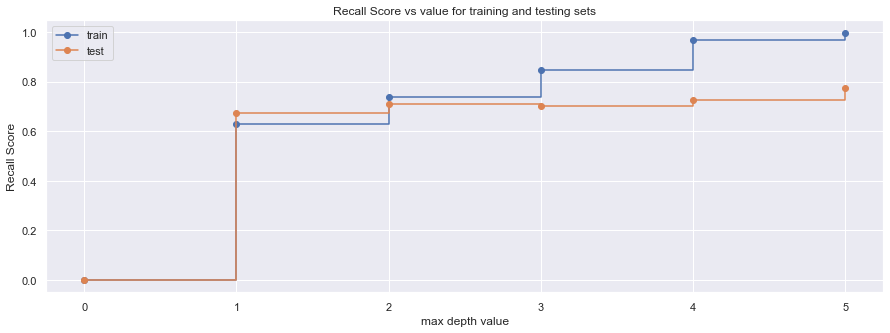

In [232]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_xlabel("max depth value")
ax.set_ylabel("Recall Score")
ax.set_title("Recall Score vs value for training and testing sets")
ax.plot(values, f1_train, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(values, f1_test, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

* Reducing the max_depth of the decision tree regressors obviously reduces complexity and reduces overfitting.
* Again the highest test recall score is achieved with the most complex (and overfit) model.
* This parameter looks the most promising: there is a convergence of the test and training recall scores when the depth of tree = 2. Furthermore, the test data recall score is fairly flat across the max_depth values. I.e. There is not a large drop in test recall between max_depth=5 and max_depth=2 but there is a steep drop in the training values.

## Comments on Optimum Parameter Tests
**Note: I ran the same test above on the F1-score with similar results. The highest F1 values are achieved only when the training data are completely overfit. I have not put the results here a) to save time and b) because it adds no value to this already long report.**
* Repeatedly we have seen that the highest test metrics occur when the model is the most complex and the training data are overfit.
* This is the reason that our attempts to tune the hyperparameters using a Grid Search have always lead to models which overfit the training data. It seems to be a characteristic of this data set: more complex models are a better fit to test data.
* The expected behavoir is that complex models, fit on the training data, do not generalize well to other data sets and result in low test data metrics. We do not see that here.

#### So what do we do about it?
* So far I have been running with the assumption that we continue to reduce the model complexity until we see a convergence of metrics in the training and test data.
* However, at this stage, as a beginner student of machine learning, I don't know what the right answer is. Perhaps the model that gives the best test metrics is the best model?
* If that is the case, the default output of all of these ensemble techniques is the best output. That would have saved me A LOT of work! And you alot of reading!
* I will continue to work on the assumption that we want the model output with similar metrics for both the training and test set, even if that means the test metrics will be lower.

## XGBoost - Manual Parameter Tune
We saw that reducing the max_depth parameter did cause a convergence in training and test recall. We also saw that the gamma parameter also showed promise in reducing overfitting. Let's test these parameters now.

#### Test max_depth=2

In [233]:
#Fitting the model
xgbc_maxdepth = XGBClassifier(random_state=1, eval_metric='logloss', scale_pos_weight=3, max_depth=2)
xgbc_maxdepth.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgbc_maxdepth, X_train, X_test, y_train,y_test,flag=True)

print()

Accuracy on training set :  0.8646594562993277
Accuracy on test set :  0.8459441036128152
Recall on training set :  0.7360248447204969
Recall on test set :  0.7101449275362319
Precision on training set :  0.6179921773142112
Precision on test set :  0.5730994152046783
F1 on training set :  0.6718639262934089
F1 on test set :  0.6343042071197412



* Using a max_depth = 2 we get a model that is not overfit to the training data and returns reasonable metrics from the test data. The metrics are not as high as the overfit model, but perhaps that is not possible with this data set.

#### Test gamma=24

In [234]:
#Fitting the model
xgbc_gamma = XGBClassifier(random_state=1, eval_metric='logloss', scale_pos_weight=3, gamma=24)
xgbc_gamma.fit(X_train,y_train)

#Calculating different metrics
get_metrics_score(xgbc_gamma, X_train, X_test, y_train,y_test,flag=True)

print()

Accuracy on training set :  0.850336159017831
Accuracy on test set :  0.858214042263122
Recall on training set :  0.6785714285714286
Recall on test set :  0.6702898550724637
Precision on training set :  0.5889487870619946
Precision on test set :  0.6125827814569537
F1 on training set :  0.6305916305916306
F1 on test set :  0.6401384083044983



* Increasing gamma to 24 also produces a model that is not overfit to the training data. The recall is slighly lower than our max_depth=2 model above, but the F1-Score is higher
* Overall, of the two tests above, the max_depth model is the better of the two. We saw from our tests that the recall did not drop as sharply on the test data when we reduced max_depth.

## XGBoost Feature Selection
In previous models, we have seen some cases where removing some features from the data (feature selection) led to better results. Let's attempt that now

### XGBoost Model - With Class Weights
The XGBoost model with scale_pos_weight=3 is our best XGBoost model so far. Let's get the feature importances of this model.

                                Imp
Passport                   0.145543
Designation                0.090229
MaritalStatus_Single       0.072827
CityTier                   0.062506
MaritalStatus_Unmarried    0.054413
Occupation_Large Business  0.048052
MaritalStatus_Married      0.047801
Age_Scaled                 0.041676
NumberOfFollowups          0.040661
MaritalStatus_Divorced     0.038592
PreferredPropertyStar      0.037667
NumberOfTrips              0.035843
DurationOfPitch_Scaled     0.034510
PitchSatisfactionScore     0.033842
TypeofContact              0.031877
Occupation_Salaried        0.030552
Gender                     0.030514
MonthlyIncome_Scaled       0.028866
Occupation_Small Business  0.027181
OwnCar                     0.025314
NumberOfPersonVisiting     0.021657
NumberOfChildrenVisiting   0.019874


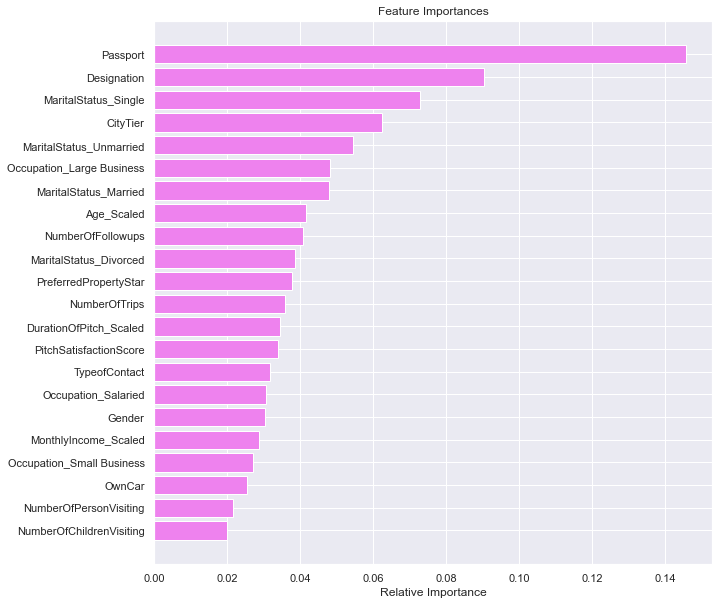

In [235]:
xgbc_weighted = XGBClassifier(random_state=1, eval_metric='logloss', scale_pos_weight=3)
xgbc_weighted.fit(X_train,y_train)

feature_names = list(X_train.columns) # Get a list of the column names to label the tree

print (pd.DataFrame(xgbc_weighted.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

importances = xgbc_weighted.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Unlike other models that we have seen in the past, XGBoost uses ALL the features.
* We can see that Passport and Designation have regained their top spots. Passport is by far the most important feature for XGBoost.
* It is interesting to see Monthly Income so low on the list. This was an important feature in random forest and the most important feature in AdaBoost.

We will attempt to remove some of the lowest features and see if we can improve the model. We will remove:  
**NumberOfChildrenVisiting, NumberOfPersonVisiting, OwnCar**  
from the data and see if that improves the metrics

In [236]:
# Drop the weakest 3 features from the data
X_train_edit3 = X_train.drop(['NumberOfChildrenVisiting','NumberOfPersonVisiting','OwnCar'], axis=1)
X_test_edit3 = X_test.drop(['NumberOfChildrenVisiting','NumberOfPersonVisiting','OwnCar'], axis=1)

### XGBoost - Class Weighted

We will run the metrics for this model again so that we can compare it to the same model, only with an edited feature list as input.

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9379686434901159
Recall on training set :  1.0
Recall on test set :  0.7934782608695652
Precision on training set :  0.9984496124031008
Precision on test set :  0.8656126482213439
F1 on training set :  0.9992242048099302
F1 on test set :  0.827977315689981


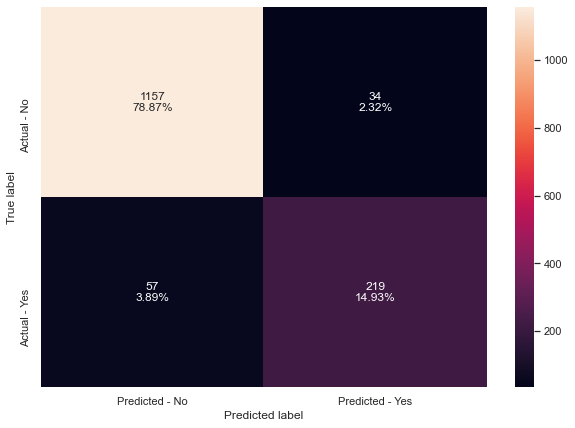

In [237]:
#Calculating different metrics
get_metrics_score(xgbc_weighted, X_train, X_test, y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(xgbc_weighted,X_test,y_test)

* This model is obviously overfit but does have the best test metrics of any model so far. We can compare this to the model below where we have removed the weakest three features.

### XGBoost - Class Weighted, Feature Selection

Accuracy on training set :  0.9997076878105817
Accuracy on test set :  0.9256987048398091
Recall on training set :  0.9984472049689441
Recall on test set :  0.7789855072463768
Precision on training set :  1.0
Precision on test set :  0.8174904942965779
F1 on training set :  0.9992229992229993
F1 on test set :  0.7977736549165122


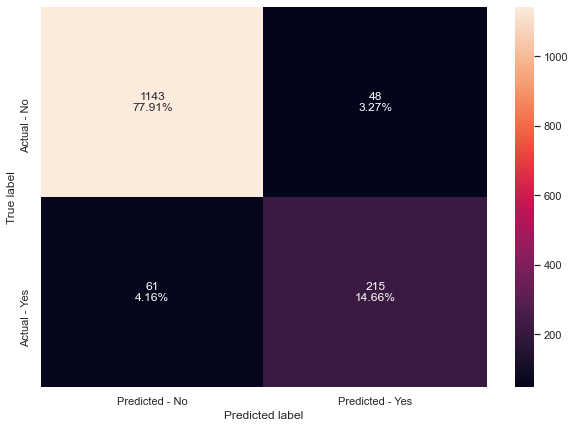

In [238]:
#Fitting the model
xgbc_feature_select = XGBClassifier(random_state=1, eval_metric='logloss', scale_pos_weight=3)
xgbc_feature_select.fit(X_train_edit3,y_train)

#Calculating different metrics
get_metrics_score(xgbc_feature_select, X_train_edit3, X_test_edit3, y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(xgbc_feature_select,X_test_edit3,y_test)

* When we remove some features, the test metrics drop slightly and the model is still overfit to the training data.
* Let's see if the feature selected model is better than the default, when we reduce the tree depth to avoid the overfitting issue.

### XGBoost - Class Weighted, Feature Selection, max_depth Limited

Accuracy on training set :  0.8629055831628178
Accuracy on test set :  0.8466257668711656
Recall on training set :  0.7220496894409938
Recall on test set :  0.6956521739130435
Precision on training set :  0.6158940397350994
Precision on test set :  0.5765765765765766
F1 on training set :  0.6647605432451751
F1 on test set :  0.6305418719211823


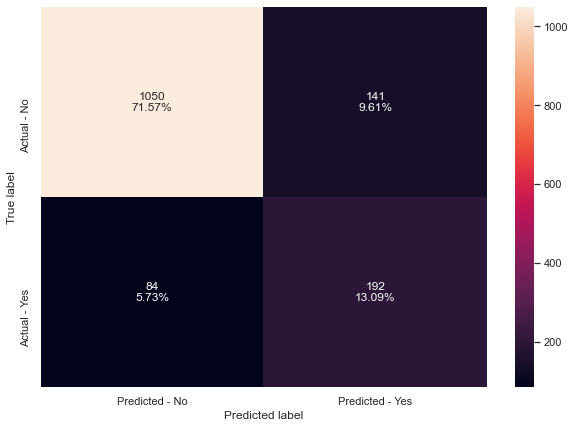

In [239]:
#Fitting the model
xgbc_feature_select_lmt = XGBClassifier(random_state=1, eval_metric='logloss', scale_pos_weight=3, max_depth=2)
xgbc_feature_select_lmt.fit(X_train_edit3,y_train)

#Calculating different metrics
get_metrics_score(xgbc_feature_select_lmt, X_train_edit3, X_test_edit3, y_train,y_test,flag=True)

#Creating confusion matrix
make_confusion_matrix(xgbc_feature_select_lmt,X_test_edit3,y_test)

* This model does not perform better than the same model with access to all features.
* Our conclusion is that removing features from the data set does not result in a better XGBoost Model

### XGBoost Classifiers - Summary

* Our initial XGBoost model was overfit to the training data. However the test data metrics were some of the best that we have seen.
* We ran a Grid Search to look for optimum hyperparameters and to attempt to reduce the overfitting problem. However, the parameters returned did nothing to mitigate overfitting. However the scale_pos_weight parameter was found to be useful.
* We then attempted to manually tune the model to remove overfitting by running many models, changing one parameter at a time and plotting the recall score for both training and test data.
 - We first found the optimun scale_pos_weight value.
 - We then experimented with a number of parameters that, in the XGBoost documentation, are said to reduce overfitting.
 - We found that max_depth was the most promissing of these parameters as we did not suffer a large drop in test recall as overfit was reduced.
* Finally we attempted to improve the model using feature selection:
 - We found the feature importances for our best XGBoost model
 - We removed the weakest 3 features and compared the results to our best model, they were worse.
 - We then attempted to see if, as we reduce overfitting (using max_depth) does the feature selected model perform better than the full feature model. The feature selected model fared worse.

# Stacking Classifier
Finally, let's stack some of our best models together and see if we can get a better result.
We will stack our AdaBoost, Gradient Boost, Decision Tree and XGBoost models together. We will use the best versions of all of these models.

### 4 Model Stack, XGBoost Last

In [240]:
estimators = [('AdaBoost',abc_manual), ('Gradient Boosting',gbc_tuned_recall), ('Decision Tree',dTree_post)]

final_estimator = xgbc_maxdepth

stack4_xgb_last= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stack4_xgb_last.fit(X_train,y_train)

StackingClassifier(cv=None,
                   estimators=[('AdaBoost',
                                AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                         class_weight={0: 0.19,
                                                                                                       1: 0.81},
                                                                                         criterion='gini',
                                                                                         max_depth=2,
                                                                                         max_features=None,
                                                                                         max_leaf_nodes=None,
                                                                                         min_impurit

In [241]:
#Calculating different metrics
get_metrics_score(stack4_xgb_last, X_train, X_test, y_train,y_test,flag=True)
print()

Accuracy on training set :  0.9216603332358959
Accuracy on test set :  0.8704839809134287
Recall on training set :  0.8322981366459627
Recall on test set :  0.6992753623188406
Precision on training set :  0.7701149425287356
Precision on test set :  0.6433333333333333
F1 on training set :  0.8
F1 on test set :  0.6701388888888888



* The output model is slightly overfit, but compared to what we have seen, it's not too bad.
* The recall and F1 scores are decent.
* As our gradient boosted model was not a strong performer, due to a lack of class weighting in that algorithm, let's drop that model and see if we get better results.

### 3 Model Stack, XGBoost Last

In [242]:
estimators = [('AdaBoost',abc_manual),('Decision Tree',dTree_post)]

final_estimator = xgbc_maxdepth

stack3_xgb_last= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stack3_xgb_last.fit(X_train,y_train)

StackingClassifier(cv=None,
                   estimators=[('AdaBoost',
                                AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                         class_weight={0: 0.19,
                                                                                                       1: 0.81},
                                                                                         criterion='gini',
                                                                                         max_depth=2,
                                                                                         max_features=None,
                                                                                         max_leaf_nodes=None,
                                                                                         min_impurit

In [243]:
#Calculating different metrics
get_metrics_score(stack3_xgb_last, X_train, X_test, y_train,y_test,flag=True)
print()

Accuracy on training set :  0.8529669687225957
Accuracy on test set :  0.8452624403544649
Recall on training set :  0.75
Recall on test set :  0.7065217391304348
Precision on training set :  0.5854545454545454
Precision on test set :  0.5718475073313783
F1 on training set :  0.6575901974132062
F1 on test set :  0.6320907617504051



* Removing the gradient boosting model from the stack made no difference to the output.

### 4 Model Stack, AdaBoost Last

In [244]:
estimators = [('XGBoost',xgbc_maxdepth), ('Gradient Boosting',gbc_tuned_recall), ('Decision Tree',dTree_post)]

final_estimator = abc_manual

stack4_abc_last= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stack4_abc_last.fit(X_train,y_train)

StackingClassifier(cv=None,
                   estimators=[('XGBoost',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1,
                                              eval_metric='logloss', gamma=0,
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints='',
                                              learning_rate=0.300000012,
                                              max_delta_step=0, max_depth=2,
                                              min_child_weight=1, missing=nan,
                                              monotone_constraints...
                                                                                            criterion='gini',
        

In [245]:
#Calculating different metrics
get_metrics_score(stack4_abc_last, X_train, X_test, y_train,y_test,flag=True)
print()

Accuracy on training set :  0.8930137386729027
Accuracy on test set :  0.830947511929107
Recall on training set :  0.8975155279503105
Recall on test set :  0.7391304347826086
Precision on training set :  0.6583143507972665
Precision on test set :  0.5368421052631579
F1 on training set :  0.759526938239159
F1 on test set :  0.6219512195121951



* Placing the AdaBoost as the final model increases the amount that the output model is overfit.
* There is a slight decrease in F1 and a slight increase in recall. 

### 5 Model Stack, Use Overfit Models, Final Estimator is Non-Overfit XGBoost
Finally, let's throw our highest metric, overfit models into a stack, we will use our XGBoost model which was not overfit as a final model.

In [246]:
estimators = [('AdaBoost',abc_manual),('Gradient Boosting',gbc_tuned),('XGBoost',xgb_tuned),('dTree',dTree_post)]

final_estimator = xgbc_maxdepth

stack5_xgbmax_last= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stack5_xgbmax_last.fit(X_train,y_train)

StackingClassifier(cv=None,
                   estimators=[('AdaBoost',
                                AdaBoostClassifier(algorithm='SAMME.R',
                                                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                         class_weight={0: 0.19,
                                                                                                       1: 0.81},
                                                                                         criterion='gini',
                                                                                         max_depth=2,
                                                                                         max_features=None,
                                                                                         max_leaf_nodes=None,
                                                                                         min_impurit

In [247]:
#Calculating different metrics
get_metrics_score(stack5_xgbmax_last, X_train, X_test, y_train,y_test,flag=True)
print()

Accuracy on training set :  0.9660917860274774
Accuracy on test set :  0.8902522154055896
Recall on training set :  0.9968944099378882
Recall on test set :  0.822463768115942
Precision on training set :  0.8492063492063492
Precision on test set :  0.6696165191740413
F1 on training set :  0.9171428571428571
F1 on test set :  0.7382113821138211



* Test metrics have improved considerably... however the model is overfit to the training data.

### Stacking - Summary

* We attempted to stack our best (non-overfitting) models together and see if we could get a better result.
* The resulting model is not too overfit - certainly better than what we have seen - and the metrics of the output model were decent.
* We attempted to remove a model from the stack, it made no difference.
* We attempted to make AdaBoost the final model rather than XGBoost, the result was a more overfit model
* We attempted to put overfit models into a stack with only the final estimator a model which did not overfit. The test data metrics were very good... but the model was overfit to the training data.

# Summary Of All Boosting-Classifiers

* The task for this section was: "Build Adaboost, gradient boost, xgboost, and stacking classifier."  
* We built built the models, and attempted to improve the model performance of each one in the order given above..

* Discounting some tests that we ran, we built 20 Boosting Classifiers. Let's compare all of them. 

In [248]:
# defining list of models
# models that use the default X_training set with all variables
models = [ab_classifier, ab_classifier_wt, abc_tuned_f1, abc_tuned_recall, abc_manual, gb_classifier,
          gbc_tuned, gbc_tuned_recall, xgb_classifier, xgb_tuned, xgbc_maxdepth, xgbc_weighted, stack4_xgb_last,
          stack3_xgb_last, stack4_abc_last, stack5_xgbmax_last]

# models that use the edited X_training set
models2 = [abc_editdf, gbc_tuned_editdf]

# models that use the X_train with weakest three features removed
models3 = [xgbc_feature_select, xgbc_feature_select_lmt]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train = [] 
f1_test = []

# looping through all the models to get the metrics score - Accuracy, Recall and Precision
for model in models:
    
    j = get_metrics_score(model, X_train, X_test, y_train, y_test, flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])
    
# Now loop through the models that used the edited X_training

for model in models2:
    
    j = get_metrics_score(model, X_train_edit, X_test_edit, y_train, y_test, flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])
    
    
# Finally loop through the models that used the further edited X_training

for model in models3:
    
    j = get_metrics_score(model, X_train_edit3, X_test_edit3, y_train, y_test, flag=False)
    acc_train.append(j[0])
    acc_test.append(j[1])
    recall_train.append(j[2])
    recall_test.append(j[3])
    precision_train.append(j[4])
    precision_test.append(j[5])
    f1_train.append(j[6])
    f1_test.append(j[7])

In [249]:
comparison_frame2 = pd.DataFrame({'Model':['ab_classifier','ab_classifier_wt','abc_tuned_f1','abc_tuned_recall','abc_manual',
                                           'gb_classifier','gbc_tuned','gbc_tuned_recall','xgb_classifier','xgb_tuned',
                                           'xgbc_maxdepth','xgbc_weighted','stack4_xgb_last','stack3_xgb_last','stack4_abc_last',
                                           'stack5_xgbmax_last', 'abc_editdf', 'gbc_tuned_editdf', 'xgbc_feature_select',
                                           'xgbc_feature_select_lmt'], 
                                          'Train_Accuracy': acc_train,'Test_Accuracy': acc_test,
                                          'Train_Recall':recall_train,'Test_Recall':recall_test,
                                          'Train_Precision':precision_train,'Test_Precision':precision_test,
                                           'Train_F1-Score':f1_train, 'Test_F1-Score':f1_test}) 

#Sorting models in decreasing order of test recall
comparison_frame2.sort_values(by='Test_F1-Score',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
11            xgbc_weighted        0.999708       0.937969      1.000000   
18      xgbc_feature_select        0.999708       0.925699      0.998447   
8            xgb_classifier        0.999708       0.931834      0.998447   
9                 xgb_tuned        0.973984       0.900477      0.995342   
15       stack5_xgbmax_last        0.966092       0.890252      0.996894   
2              abc_tuned_f1        0.978661       0.867757      0.992236   
12          stack4_xgb_last        0.921660       0.870484      0.832298   
10            xgbc_maxdepth        0.864659       0.845944      0.736025   
13          stack3_xgb_last        0.852967       0.845262      0.750000   
19  xgbc_feature_select_lmt        0.862906       0.846626      0.722050   
14          stack4_abc_last        0.893014       0.830948      0.897516   
7          gbc_tuned_recall        0.921076       0.879346      0.625776   
4                abc_manual        0.817013       0.802999      0.763975   
6                 gbc_tuned        0.921076       0.876619      0.621118   
16               abc_editdf        0.810582       0.793456      0.774845   
17         gbc_tuned_editdf        0.917860       0.874574      0.604037   
5             gb_classifier        0.887460       0.867757      0.459627   
1          ab_classifier_wt        0.745396       0.738923      0.725155   
3          abc_tuned_recall        0.623502       0.628494      0.784161   
0             ab_classifier        0.845075       0.846626      0.304348   

    Test_Recall  Train_Precision  Test_Precision  Train_F1-Score  \
11     0.793478         0.998450        0.865613        0.999224   
18     0.778986         1.000000        0.817490        0.999223   
8      0.702899         1.000000        0.915094        0.999223   
9      0.786232         0.881706        0.713816        0.935084   
15     0.822464         0.849206        0.669617        0.917143   
2      0.746377         0.903819        0.624242        0.945966   
12     0.699275         0.770115        0.643333        0.800000   
10     0.710145         0.617992        0.573099        0.671864   
13     0.706522         0.585455        0.571848        0.657590   
19     0.695652         0.615894        0.576577        0.664761   
14     0.739130         0.658314        0.536842        0.759527   
7      0.481884         0.932870        0.796407        0.749071   
4      0.760870         0.509317        0.484988        0.611180   
6      0.467391         0.938967        0.791411        0.747664   
16     0.771739         0.498004        0.470199        0.606318   
17     0.452899         0.937349        0.791139        0.734655   
5      0.398551         0.888889        0.797101        0.605937   
1      0.768116         0.402239        0.399247        0.517452   
3      0.782609         0.305320        0.308131        0.439513   
0      0.318841         0.705036        0.704000        0.425163   

    Test_F1-Score  
11       0.827977  
18       0.797774  
8        0.795082  
9        0.748276  
15       0.738211  
2        0.679868  
12       0.670139  
10       0.634304  
13       0.632091  
19       0.630542  
14       0.621951  
7        0.600451  
4        0.592384  
6        0.587699  
16       0.584362  
17       0.576037  
5        0.531401  
1        0.525403  
3        0.442170  
0        0.438903

* The table above shows all models built in the boosting section of the project. The list is arranged in order of test F1 Score.
* If we are simply looking for the model with the best test metrics, then the "xgbc_weighted" (XGBoost with scale_pos_weigh=3) is the best model. It has the highest test F1-Score (0.83) and the second highest test recall score (0.79). however this model is overfit to the training data as the training metrics are quite a bit higher than the test metrics.
* However, if we are after a model that does not overfit the training data, the best model is the "xgbc_maxdepth" (XGBoost, scale weight=3, max_depth=2). For this model the train and test metrics are very similar. The test recall is 0.71 and test F1-Score is 0.63
* Another noteworthy model is the "abc_editdf" model (AdaBoost with classweight and an edit input data frame). This model achieved he highest recall of the non-overfit models at 0.77, with an F1-Score of 0.58.

# -------------------------------------------------------------------------------------------------------------

# Comparison of All Models
We will now compare all the models from the Bagging and Boosting sections of the project and find the best performing model.

In [250]:
all_models_df = pd.concat([comparison_frame, comparison_frame2], axis=0, sort=False)
all_models_df.sort_values(by='Test_F1-Score',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
11            xgbc_weighted        0.999708       0.937969      1.000000   
18      xgbc_feature_select        0.999708       0.925699      0.998447   
8            xgb_classifier        0.999708       0.931834      0.998447   
9                 xgb_tuned        0.973984       0.900477      0.995342   
15       stack5_xgbmax_last        0.966092       0.890252      0.996894   
3        bagging_classifier        0.994154       0.908657      0.972050   
0                     dTree        1.000000       0.886162      1.000000   
7              rf_estimator        1.000000       0.907294      1.000000   
2              abc_tuned_f1        0.978661       0.867757      0.992236   
9                 rf_editdf        1.000000       0.902522      1.000000   
12          stack4_xgb_last        0.921660       0.870484      0.832298   
10            xgbc_maxdepth        0.864659       0.845944      0.736025   
13          stack3_xgb_last        0.852967       0.845262      0.750000   
19  xgbc_feature_select_lmt        0.862906       0.846626      0.722050   
14          stack4_abc_last        0.893014       0.830948      0.897516   
6             bagging_tuned        0.857059       0.850034      0.701863   
8      bagging_tuned_editdf        0.845659       0.835037      0.712733   
2                dTree_post        0.871090       0.866394      0.588509   
13         rf_tuned_editdf2        0.831920       0.831629      0.690994   
5          bagging_weighted        0.838936       0.841172      0.678571   
7          gbc_tuned_recall        0.921076       0.879346      0.625776   
11              rf_weighted        0.831044       0.825494      0.695652   
12                 rf_tuned        0.831044       0.825494      0.695652   
4                abc_manual        0.817013       0.802999      0.763975   
6                 gbc_tuned        0.921076       0.876619      0.621118   
16               abc_editdf        0.810582       0.793456      0.774845   
17         gbc_tuned_editdf        0.917860       0.874574      0.604037   
5             gb_classifier        0.887460       0.867757      0.459627   
1          ab_classifier_wt        0.745396       0.738923      0.725155   
4             bagging_limit        0.864075       0.860941      0.368012   
1                 dTree_pre        0.821397       0.841172      0.341615   
3          abc_tuned_recall        0.623502       0.628494      0.784161   
0             ab_classifier        0.845075       0.846626      0.304348   
10                 rf_limit        0.839813       0.828221      0.166149   

    Test_Recall  Train_Precision  Test_Precision  Train_F1-Score  \
11     0.793478         0.998450        0.865613        0.999224   
18     0.778986         1.000000        0.817490        0.999223   
8      0.702899         1.000000        0.915094        0.999223   
9      0.786232         0.881706        0.713816        0.935084   
15     0.822464         0.849206        0.669617        0.917143   
3      0.594203         0.996815        0.881720        0.984277   
0      0.677536         1.000000        0.705660        1.000000   
7      0.550725         1.000000        0.926829        1.000000   
2      0.746377         0.903819        0.624242        0.945966   
9      0.539855         1.000000        0.903030        1.000000   
12     0.699275         0.770115        0.643333        0.800000   
10     0.710145         0.617992        0.573099        0.671864   
13     0.706522         0.585455        0.571848        0.657590   
19     0.695652         0.615894        0.576577        0.664761   
14     0.739130         0.658314        0.536842        0.759527   
6      0.652174         0.603471        0.592105        0.648959   
8      0.699275         0.572319        0.548295        0.634855   
2      0.557971         0.682883        0.675439        0.632193   
13     0.688406         0.542022        0.541311        0.607509   
5

* The table above shows all models ranked top-to-bottom by the test F1-Score
* We saw repeatedly in this project that the most complex models, which overfit the training data, ALSO happened to be the best predictors of test data. **If we are simply looking for the model with the best test data metrics, and not at all worried that this model overfits the training data: The xgbc_weighted (XGBoost with scale_pos_weight=3) is the best model.**

* I have been working under the assumption that the best model is the model with the best test metrics that DOES NOT overfit the training data. Let's look for that model now by manipulating the table above.

In [251]:
# We will be adding some columns to the table that will help us make sense of the results.
all_models_df['Train F1_Recall_Sum'] = all_models_df['Train_Recall'] + all_models_df['Train_F1-Score']
all_models_df['Test F1_Recall_Sum'] = all_models_df['Test_Recall'] + all_models_df['Test_F1-Score']
all_models_df['Overfit_Flag'] = all_models_df['Train F1_Recall_Sum'] - all_models_df['Test F1_Recall_Sum']
all_models_df.sort_values(by='Test_F1-Score',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
11            xgbc_weighted        0.999708       0.937969      1.000000   
18      xgbc_feature_select        0.999708       0.925699      0.998447   
8            xgb_classifier        0.999708       0.931834      0.998447   
9                 xgb_tuned        0.973984       0.900477      0.995342   
15       stack5_xgbmax_last        0.966092       0.890252      0.996894   
3        bagging_classifier        0.994154       0.908657      0.972050   
0                     dTree        1.000000       0.886162      1.000000   
7              rf_estimator        1.000000       0.907294      1.000000   
2              abc_tuned_f1        0.978661       0.867757      0.992236   
9                 rf_editdf        1.000000       0.902522      1.000000   
12          stack4_xgb_last        0.921660       0.870484      0.832298   
10            xgbc_maxdepth        0.864659       0.845944      0.736025   
13          stack3_xgb_last        0.852967       0.845262      0.750000   
19  xgbc_feature_select_lmt        0.862906       0.846626      0.722050   
14          stack4_abc_last        0.893014       0.830948      0.897516   
6             bagging_tuned        0.857059       0.850034      0.701863   
8      bagging_tuned_editdf        0.845659       0.835037      0.712733   
2                dTree_post        0.871090       0.866394      0.588509   
13         rf_tuned_editdf2        0.831920       0.831629      0.690994   
5          bagging_weighted        0.838936       0.841172      0.678571   
7          gbc_tuned_recall        0.921076       0.879346      0.625776   
11              rf_weighted        0.831044       0.825494      0.695652   
12                 rf_tuned        0.831044       0.825494      0.695652   
4                abc_manual        0.817013       0.802999      0.763975   
6                 gbc_tuned        0.921076       0.876619      0.621118   
16               abc_editdf        0.810582       0.793456      0.774845   
17         gbc_tuned_editdf        0.917860       0.874574      0.604037   
5             gb_classifier        0.887460       0.867757      0.459627   
1          ab_classifier_wt        0.745396       0.738923      0.725155   
4             bagging_limit        0.864075       0.860941      0.368012   
1                 dTree_pre        0.821397       0.841172      0.341615   
3          abc_tuned_recall        0.623502       0.628494      0.784161   
0             ab_classifier        0.845075       0.846626      0.304348   
10                 rf_limit        0.839813       0.828221      0.166149   

    Test_Recall  Train_Precision  Test_Precision  Train_F1-Score  \
11     0.793478         0.998450        0.865613        0.999224   
18     0.778986         1.000000        0.817490        0.999223   
8      0.702899         1.000000        0.915094        0.999223   
9      0.786232         0.881706        0.713816        0.935084   
15     0.822464         0.849206        0.669617        0.917143   
3      0.594203         0.996815        0.881720        0.984277   
0      0.677536         1.000000        0.705660        1.000000   
7      0.550725         1.000000        0.926829        1.000000   
2      0.746377         0.903819        0.624242        0.945966   
9      0.539855         1.000000        0.903030        1.000000   
12     0.699275         0.770115        0.643333        0.800000   
10     0.710145         0.617992        0.573099        0.671864   
13     0.706522         0.585455        0.571848        0.657590   
19     0.695652         0.615894        0.576577        0.664761   
14     0.739130         0.658314        0.536842        0.759527   
6      0.652174         0.603471        0.592105        0.648959   
8      0.699275         0.572319        0.548295        0.634855   
2      0.557971         0.682883        0.675439        0.632193   
13     0.688406         0.542022        0.541311        0.607509   
5

* As we are interested in both the F1-Score and the Recall, we simply summed the two columns. Rows that have the highest sum of F1-Score and Recall are better models.
* We also added an "Overfit_Flag" column. In this column we have the difference between the training data F1_Recall_Sum and the testing data F1_Recall_Sum. When there is a large difference between the training data metrics and the testing data metrics, we can identify a model as overfit. We can now filter the data using this column to only show models that are not overfit.

In [252]:
all_models_df[all_models_df['Overfit_Flag']<0.1].sort_values(by='Test F1_Recall_Sum',ascending=False)

Model  Train_Accuracy  Test_Accuracy  Train_Recall  \
16               abc_editdf        0.810582       0.793456      0.774845   
4                abc_manual        0.817013       0.802999      0.763975   
10            xgbc_maxdepth        0.864659       0.845944      0.736025   
13          stack3_xgb_last        0.852967       0.845262      0.750000   
19  xgbc_feature_select_lmt        0.862906       0.846626      0.722050   
8      bagging_tuned_editdf        0.845659       0.835037      0.712733   
13         rf_tuned_editdf2        0.831920       0.831629      0.690994   
1          ab_classifier_wt        0.745396       0.738923      0.725155   
12                 rf_tuned        0.831044       0.825494      0.695652   
11              rf_weighted        0.831044       0.825494      0.695652   
6             bagging_tuned        0.857059       0.850034      0.701863   
5          bagging_weighted        0.838936       0.841172      0.678571   
3          abc_tuned_recall        0.623502       0.628494      0.784161   
2                dTree_post        0.871090       0.866394      0.588509   
4             bagging_limit        0.864075       0.860941      0.368012   
1                 dTree_pre        0.821397       0.841172      0.341615   
0             ab_classifier        0.845075       0.846626      0.304348   

    Test_Recall  Train_Precision  Test_Precision  Train_F1-Score  \
16     0.771739         0.498004        0.470199        0.606318   
4      0.760870         0.509317        0.484988        0.611180   
10     0.710145         0.617992        0.573099        0.671864   
13     0.706522         0.585455        0.571848        0.657590   
19     0.695652         0.615894        0.576577        0.664761   
8      0.699275         0.572319        0.548295        0.634855   
13     0.688406         0.542022        0.541311        0.607509   
1      0.768116         0.402239        0.399247        0.517452   
12     0.681159         0.539759        0.528090        0.607870   
11     0.681159         0.539759        0.528090        0.607870   
6      0.652174         0.603471        0.592105        0.648959   
5      0.641304         0.559539        0.569132        0.613333   
3      0.782609         0.305320        0.308131        0.439513   
2      0.557971         0.682883        0.675439        0.632193   
4      0.362319         0.803390        0.781250        0.504792   
1      0.369565         0.540541        0.633540        0.418649   
0      0.318841         0.705036        0.704000        0.425163   

    Test_F1-Score  Train F1_Recall_Sum  Test F1_Recall_Sum  Overfit_Flag  
16       0.584362             1.381163            1.356101      0.025062  
4        0.592384             1.375155            1.353253      0.021902  
10       0.634304             1.407889            1.344449      0.063440  
13       0.632091             1.407590            1.338613      0.068978  
19       0.630542             1.386810            1.326194      0.060616  
8        0.614650             1.347588            1.313925      0.033663  
13       0.606061             1.298502            1.294466      0.004036  
1        0.525403             1.242607            1.293519     -0.050912  
12       0.594937             1.303522            1.276096      0.027426  
11       0.594937             1.303522            1.276096      0.027426  
6        0.620690             1.350822            1.272864      0.077959  
5        0.603066             1.291905            1.244371      0.047534  
3        0.442170             1.223674            1.224779     -0.001104  
2        0.611111             1.220703            1.169082      0.051621  
4        0.495050             0.872805            0.857368      0.015436  
1        0.466819             0.760264            0.836384     -0.076121  
0        0.438903             0.729511            0.757743     -0.028233

* The table above shows all our models (that are not overfit) and ranks them from top-to-bottom based on the Test F1_Recall_Sum.

## The Best Model is:

 - **"abc_editdf"** (AdaBoost with decision tree base estimator with max_depth=2, class_weight={0:0.19,1:0.81} and a feature selected input data frame). 
 - This model scored the highest for test recall (0.77), only slightly lower than our best overfit model. This model also had a high F1-Score (0.58). 
 - Given that the cost of marketing to people unlikely to buy a product (false positive) is likely lower than the opportunity cost of missing customers who would buy a product (false negative), we prefer models with a high recall, given similar F1-Scores.
 
## 2nd Place Goes to:

 - **xgbc_maxdepth** (XGBoost model with scale_pos_weight=3 and max_depth=2).
 - This model had the highest F1-Score (0.63). 
 - In the Background and Context it was mentioned, "...the marketing cost was quite high because customers were contacted at random...". We know that the marketing cost was high, so it was important to balance both precision AND recall. This model does the best job in that regard. 
 - If "Visit with us" finds that their marketing cost gets too high, they could switch from using the abc_editdf model to the xgbc_maxdepth model.

## Best Model: Confusion Matrix and Feature Importances

### Confusion Matrix

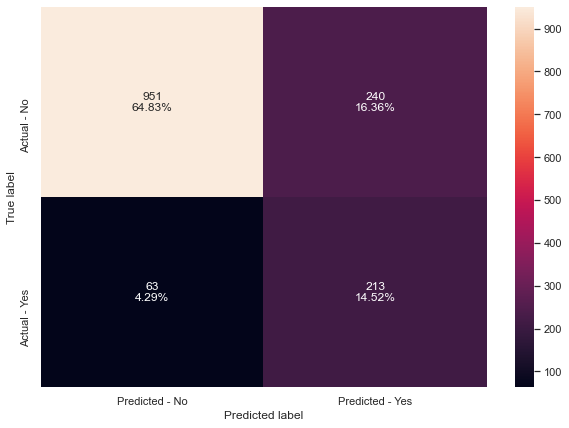

In [253]:
#Creating confusion matrix
make_confusion_matrix(abc_editdf, X_test_edit, y_test)

* Above is the confusion matrix for our best model. 
* We can see that the number of false negatives (customers who did buy a product but were identified as non-buyers) is very low. Only 63 of the 1467 customers in the test data set were misclassified.
* At the same time the number false positives (customers identified as worth marketing to, who did not buy a product) is also reasonble (16.36%)
* There is almost an equal number of true postives as false positives. This means that for every 2 customers who are identified as worth marketing to, 1 of the customers is a buyer. I'm not in marketing myself, but this seems like a good rate!

### Feature Importances

                             Imp
MonthlyIncome_Scaled    0.209547
Age_Scaled              0.163246
DurationOfPitch_Scaled  0.091778
NumberOfFollowups       0.080913
Passport                0.073251
Designation             0.068300
PitchSatisfactionScore  0.065060
CityTier                0.057886
NumberOfTrips           0.056721
PreferredPropertyStar   0.037573
MaritalStatus_Divorced  0.031905
MaritalStatus_Married   0.028126
MaritalStatus_Single    0.024521
NumberOfPersonVisiting  0.011173


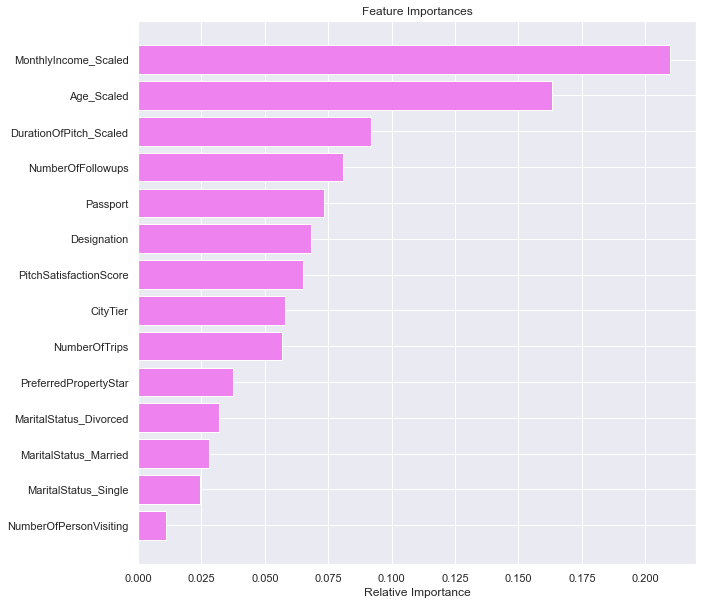

In [254]:
feature_names = list(X_train_edit.columns) # Get a list of the column names to label the tree

print (pd.DataFrame(abc_editdf.feature_importances_, columns = ["Imp"], index = X_train_edit.columns).sort_values(by = 'Imp', ascending = False))

importances = abc_editdf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

* Above are the feature importances for our best model, we will talk more about these in the section below.

# -------------------------------------------------------------------------------------------------------------

# Actionable Insights & Recommendations

We have built a model that takes customer data and predicts if they will buy a travel package or not. "Visit with Us" can input customer data and get a prediction: is this customer worth marketing to? 1 = Yes, 0 = No.

From our, EDA, our model building process and our model feature importances we can make the following pertinent observations.

**Of all the customers 18.8% purchased a product, we are looking for features (or feature classes) were the percentage of customers who purchased a product are much higher, or much lower, than this.**

Key variables in deciding if a customer will purchase a product:
#### Age

* Observation: For each age we plotted the percentage of customers who purchased a product. For customers 21 and under the ProdTaken rate was above 55%. The ProdTaken trend then dropped sharply to the age of 40 and then flattened out at about 15%. We also see age very highly rated as a feature importance in our best model.
 - Key Takeaway: As a general rule, younger customers are more likely to buy a product.

#### Monthly Income and Designation

* Obsevation: We will talk about Monthly Income and Designation together as they are related (people with higher designations, have higher monthly income). Monthly income has the highest feature importance in our best model. Our EDA shows that customers with a lower monthly income are more likely to buy a product. The product that was sold the most, was the basic package to customers designated "Executive".  
 - Key Takeaway: The marketing team can be more generalized in marketing cheaper travel packages (I'm assuming the Basic Package is the cheapest) to younger customers with lower incomes. When it comes to the higher priced packages, the marketing team will need to be more selective.

#### Duration of Pitch, Number of Followups and Pitch Satisfaction Score

* Observation: All of these variables have to do with marketing and we can make direct recommendations to the marketing team based on our observations of these variables. In our EDA we did a deep dive into the optimum pitch duration. In general, longer pitches worked better - up to 30 minutes. Pitches longer than this reduced the chance a customer would purchase a product. The optimal pitch length was about 18-21 minutes, this optimized PitchSatisfactionScore and the chances a customer would purchase a package. In our EDA We saw that more followups lead to more sales.
 - Key Takeaway: Create a sales pitch between 18-30 minutes long, tying to hit the shorter side of that range to maximize PitchSatisfactionScore and customer conversion. Follow up on customers more attention to customers leads to more sales.

#### Passport

* Observation: Only 12% of Customers without a passport purchased a product, whereas 35% of customers with a passport did.
 - Key Takeway: Look for customers with a passport  


If we are looking for a general customer, it would be a young person, working as an executive, with a passport. Customers that fall into this type are the most likely to purchase a package.

For the higher priced packages, we saw that older customers with higher designations were more likely to buy. For these types of customer we need to be more specific and follow the guidelines in the "EDA Customer Profiles for Different Product Types" section.

We have seen that the efforts of the marketing team really do make a difference. We want customers to be satisfied with the pitch and we need the sales guys to follow up our customers as the number of followups increase the number of sales.